# Mini Project 

## About

## Contributors
- Le Qi - 
- Abigail -
- Shu Fang -

## Problem Definition
- Explore the correlation between certain mushrooms features and its edibility
- Find out which variable is best to predict whether the mushroom is edible or not
- Which model would be the best for predicting the edibility of the mushroom?
- Are we then able to accurately predict whether a mushroom is edible based of its features?

## Models Used
1. Binary Classification
2. 

## Conclusion

## What did we learn from this project?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
%matplotlib inline

### Import the Dataset
The dataset is in CSV format; hence we use the `read_csv` function with `delimiter` parameter from Pandas. Immediately after importing, we take a quick look at the data using the `head` function.

In [2]:
mushroom = pd.read_csv('mushroom.csv', delimiter= ';')
mushroom.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  

[5 rows x 21 columns]

In [3]:
# Check the vital statistics of the dataset
print("Data type : ", type(mushroom))
print("Data dims : ", mushroom.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (61069, 21)


In [4]:
# Check the data types of the variables in the dataset
print(mushroom.dtypes)

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


# Cleaning the Dataset



### Properly naming the variables in each column


In [5]:
# Create a copy of the Dataset
mushroom_clean = mushroom.copy()

# Convert all the columns with datatype equal to 'object' to category
# .loc[:,mushroom_clean_dtypes == 'object'] => to locate the variables of object data types
# select_dtypes(['object']) => to select the object data types
# apply => pass a function and apply it to every selected value
# (lambda x: x.astype('category')) => assigning the astype function to x using lambda
# astype => change a pandas object to a specified dtype, in this case it is categorical
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(mushroom_clean.dtypes)



# Renaming the data for each category columns
mushroom_clean['class'] = mushroom_clean['class'].cat.rename_categories({'p':'Poisonous', 'e':'Edible'})
mushroom_clean['cap-shape'] = mushroom_clean['cap-shape'].cat.rename_categories({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'Flat', 's':'Sunken', 'p':'Spherical', 'o':'Others'})
mushroom_clean['cap-surface'] = mushroom_clean['cap-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'd':'Dry'})
mushroom_clean['cap-color'] = mushroom_clean['cap-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['does-bruise-or-bleed'] = mushroom_clean['does-bruise-or-bleed'].cat.rename_categories({'t':'Bruises or Bleeds', 'f':'Neither'})
mushroom_clean['gill-attachment'] = mushroom_clean['gill-attachment'].cat.rename_categories({'a':'Adnate', 'x':'Adnexed', 'd':'Decurrent', 'e':'Free', 's':'Sinuate', 'p':'Pores', 'f':'None'})
mushroom_clean['gill-spacing'] = mushroom_clean['gill-spacing'].cat.rename_categories({'c':'Close', 'd':'Distant', 'f':'None'})
mushroom_clean['gill-color'] = mushroom_clean['gill-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['stem-root'] = mushroom_clean['stem-root'].cat.rename_categories({'b':'Bulbous', 's':'Swollen', 'c':'Club', 'u':'Cup', 'e':'Equal', 'z':'Rhizomorphs', 'r':'Root', 'f':'None'})
mushroom_clean['stem-surface'] = mushroom_clean['stem-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'f':'None'})
mushroom_clean['stem-color'] = mushroom_clean['stem-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['veil-type'] = mushroom_clean['veil-type'].cat.rename_categories({'p':'Partial', 'u':'Universal'})
mushroom_clean['veil-color'] = mushroom_clean['veil-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['has-ring'] = mushroom_clean['has-ring'].cat.rename_categories({'t':'Yes', 'f':'No'})
mushroom_clean['ring-type'] = mushroom_clean['ring-type'].cat.rename_categories({'c':'Cobwebby', 'e':'Evanescent', 'r':'Flaring', 'g':'Grooved', 'l':'Large', 'p':'Pendant', 's':'Sheathing', 'z':'Zone', 'y':'Scaly', 'm':'Movable', 'f':'None'})
mushroom_clean['spore-print-color'] = mushroom_clean['spore-print-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['habitat'] = mushroom_clean['habitat'].cat.rename_categories({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths', 'h':'Heaths', 'u':'Urban', 'w':'Waste', 'd':'Woods'})
mushroom_clean['season'] = mushroom_clean['season'].cat.rename_categories({'s':'Spring', 'u':'Summer', 'a':'Autumn', 'w':'Winter'})

#Rename the 3 numerical columns to include the units of measurements
mushroom_clean.rename(columns = {'cap-diameter':'cap-diameter(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-height':'stem-height(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-width':'stem-width(mm)'}, inplace = True)

mushroom_clean

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object


class  cap-diameter(cm) cap-shape cap-surface cap-color  \
0      Poisonous             15.26    Convex     Grooves    Orange   
1      Poisonous             16.60    Convex     Grooves    Orange   
2      Poisonous             14.07    Convex     Grooves    Orange   
3      Poisonous             14.17      Flat       Shiny       Red   
4      Poisonous             14.64    Convex       Shiny    Orange   
...          ...               ...       ...         ...       ...   
61064  Poisonous              1.18    Sunken      Smooth    Yellow   
61065  Poisonous              1.27      Flat      Smooth    Yellow   
61066  Poisonous              1.27    Sunken      Smooth    Yellow   
61067  Poisonous              1.24      Flat      Smooth    Yellow   
61068  Poisonous              1.17    Sunken      Smooth    Yellow   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                  Neither            Free          NaN      White   
1                  Neither            Free          NaN      White   
2                  Neither            Free          NaN      White   
3                  Neither            Free          NaN      White   
4                  Neither            Free          NaN      White   
...                    ...             ...          ...        ...   
61064              Neither            None         None       None   
61065              Neither            None         None       None   
61066              Neither            None         None       None   
61067              Neither            None         None       None   
61068              Neither            None         None       None   

       stem-height(cm)  ...  stem-root stem-surface stem-color  veil-type  \
0                16.95  ...    Swollen        Scaly      White  Universal   
1                17.99  ...    Swollen        Scaly      White  Universal   
2                17.80  ...    Swollen        Scaly      White  Universal   
3                15.77  ...    Swollen        Scaly      White  Universal   
4                16.53  ...    Swollen        Scaly      White  Universal   
...                ...  ...        ...          ...        ...        ...   
61064             3.93  ...        NaN          NaN     Yellow        NaN   
61065             3.18  ...        NaN          NaN     Yellow        NaN   
61066             3.86  ...        NaN          NaN     Yellow        NaN   
61067             3.56  ...        NaN          NaN     Yellow        NaN   
61068             3.25  ...        NaN          NaN     Yellow        NaN   

      veil-color has-ring ring-type spore-print-color habitat  season  
0          White      Yes   Grooved               NaN   Woods  Winter  
1          White      Yes   Grooved               NaN   Woods  Summer  
2          White      Yes   Grooved               NaN   Woods  Winter  
3          White      Yes   Pendant               NaN   Woods  Winter  
4          White      Yes   Pendant               NaN   Woods  Winter  
...          ...      ...       ...               ...     ...     ...  
61064        NaN       No      None               NaN   Woods  Autumn  
61065        NaN       No      None               NaN   Woods  Autumn  
61066        NaN       No      None               NaN   Woods  Summer  
61067        NaN       No      None               NaN   Woods  Summer  
61068        NaN       No      None               NaN   Woods  Summer  

[61069 rows x 21 columns]

### Dealing with NaN values

In [6]:
#Checking number of null data per column

print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())

(61069, 21)
class                       0
cap-diameter(cm)            0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height(cm)             0
stem-width(mm)              0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


<Figure size 1600x800 with 0 Axes>

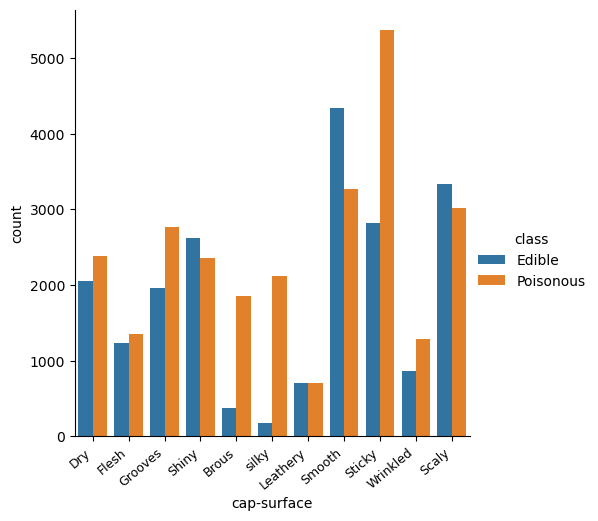

<Figure size 1600x800 with 0 Axes>

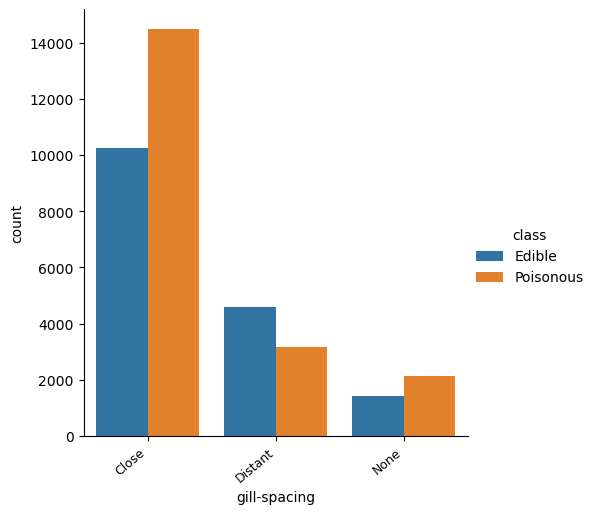

<Figure size 1600x800 with 0 Axes>

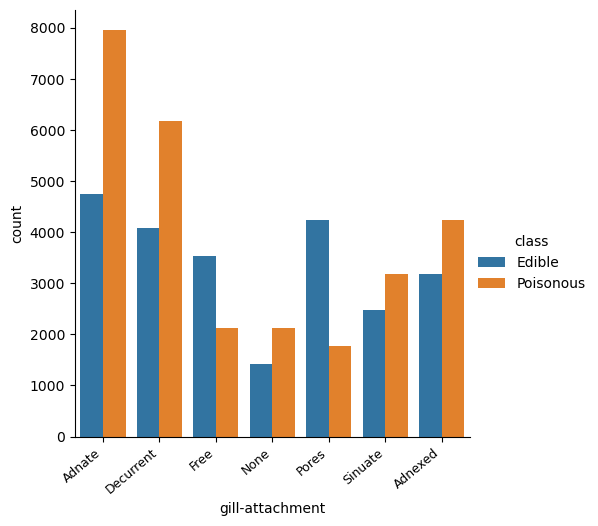

<Figure size 1600x800 with 0 Axes>

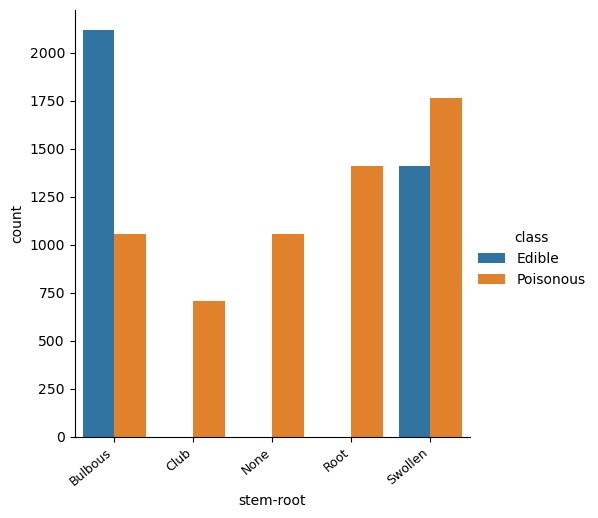

<Figure size 1600x800 with 0 Axes>

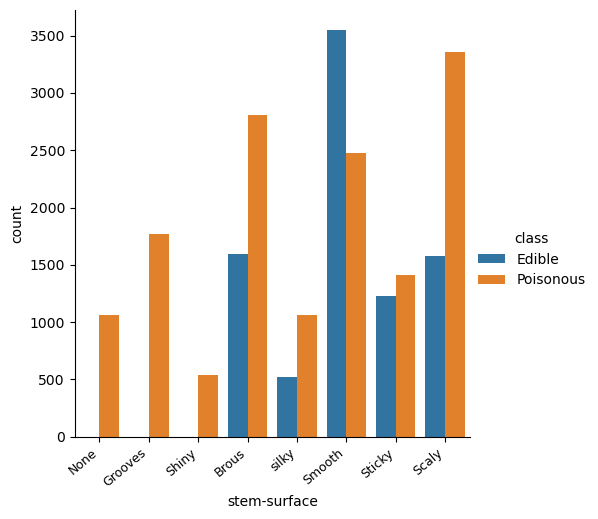

<Figure size 1600x800 with 0 Axes>

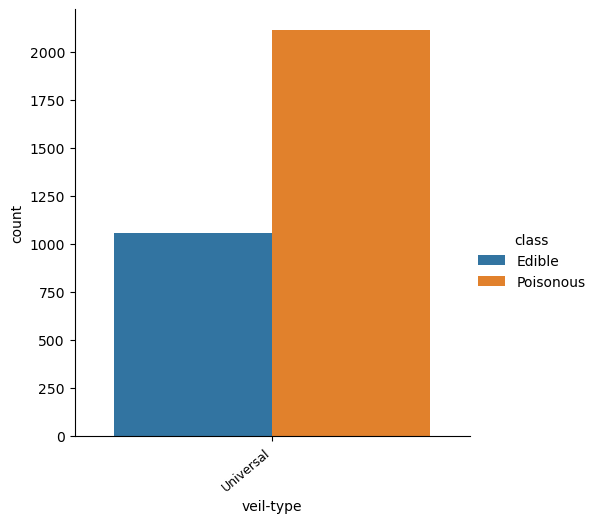

<Figure size 1600x800 with 0 Axes>

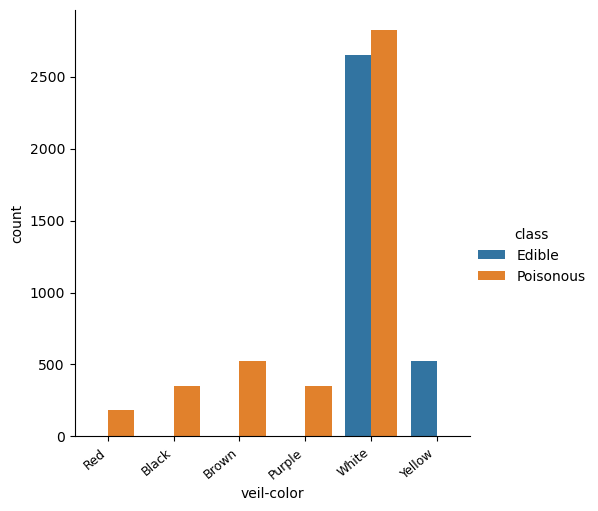

<Figure size 1600x800 with 0 Axes>

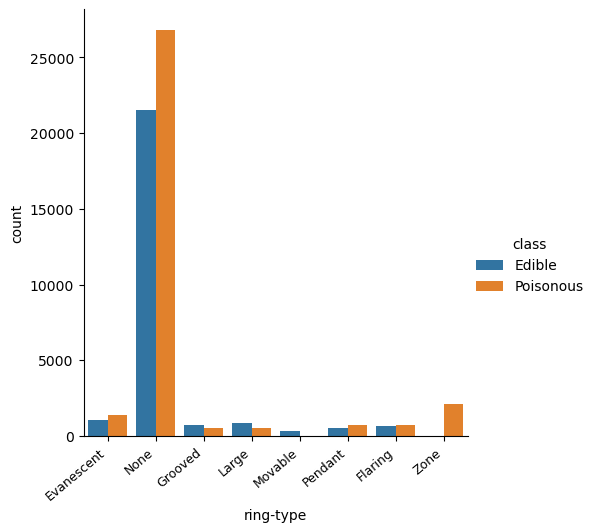

<Figure size 1600x800 with 0 Axes>

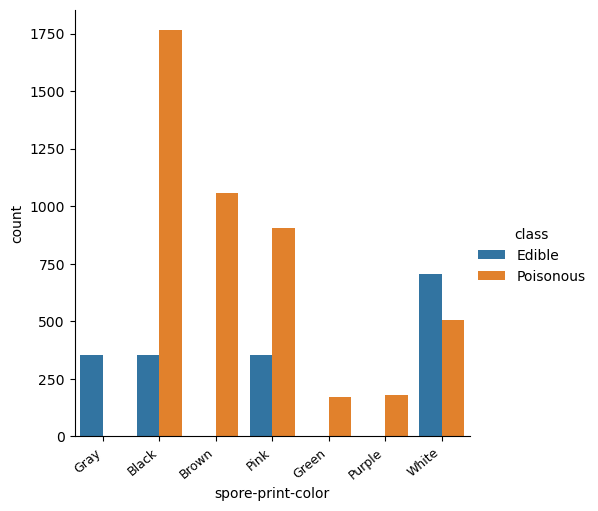

In [7]:
#Some columns feature large amounts of its rows as missing data.
#They are 9 categorical variables that have NULL values:
#cap-surface,gill-spacing,gill-attachment,stem-root,stem-surface,veil-type,veil-color,ring-type,spore-print-color

category_with_NULL=pd.DataFrame(mushroom_clean[['cap-surface', 'gill-spacing', 'gill-attachment', 'stem-root','stem-surface','veil-type','veil-color','ring-type','spore-print-color']])

for column in category_with_NULL:
    f = plt.figure(figsize=(16, 8))
    ax=sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean)
    ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
    

### Our thought process on how to deal with NaN values

It would not be practical to remove all rows with NaN values as over 50,000 of our 61,069 values would be removed.

Next, filling in the missing values with the mode of categorical variable would not be practical, as it could cause a bias in the data, and would possibly affect the classification of these mushrooms. Many of them could be classified as edible due to the filled in data, when they could be infact poisonous. (and Vice-versa) This would not be ideal.

Lastly, we decided to look at the different features first to have a brief idea on the correlation between these variables and edibility.


### Result:


By observation of the grouped Bar plots, we are removing

**Universal Veil Type**: As it only contains one categorical level, and does not help in our investigation at all

We will leave the rest of columns with NaN values as they are first, as we believe removing the whole column is impractical because it could makes us lose data that might be important in helping classify edibility.

In [8]:
#Remove veil type category from dataset.

mushroom_clean.drop(['veil-type'], axis=1,inplace=True)
print("Data dims : ", mushroom_clean.shape)

Data dims :  (61069, 20)


In [9]:
#Add category "Unknown" for the remaining columns with NaN values
#So that we can proceed with DEA and MLA
   
        
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
        
## Call function to create new category for variables
for column in mushroom_clean:
    if (np.NaN in mushroom_clean[column].unique()):
        impute_nan_create_category(mushroom_clean,column)

#Change object back into category
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))


print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())
mushroom_clean.info()

    

(61069, 20)
class                   0
cap-diameter(cm)        0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height(cm)         0
stem-width(mm)          0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter(cm)      61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           61069 non-null  category
 4   cap-color             61069 n

# Data Exploration and Visualisation

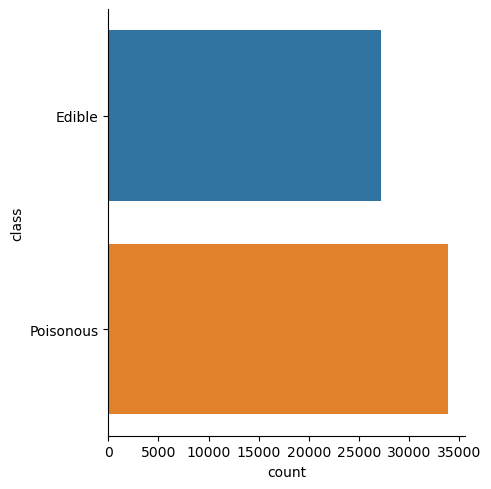

In [10]:
#Looking at the count of edible vs poisonous mushrooms in our data 
sb.catplot(y = "class", data = mushroom_clean, kind = "count")

We can see that we have a roughly equal amount of edible vs poisonous mushrooms in our data , hence no need for resampling


### Exploring the 3 numerical data columns
Numerical variables:
1. cap-diameter
2. stem-height
3. stem-width

count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap-diameter(cm), dtype: float64
count    61069.000000
mean         6.581538
std          3.370017
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem-height(cm), dtype: float64
count    61069.000000
mean        12.149410
std         10.035955
min          0.000000
25%          5.210000
50%         10.190000
75%         16.570000
max        103.910000
Name: stem-width(mm), dtype: float64


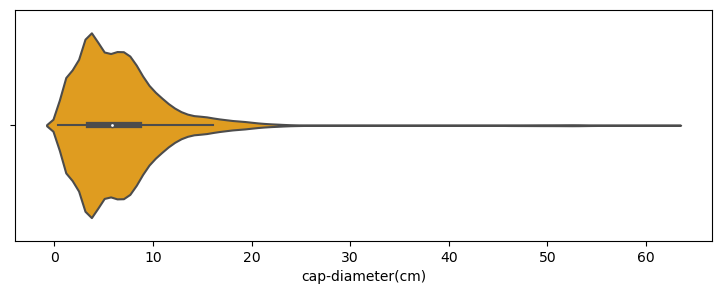

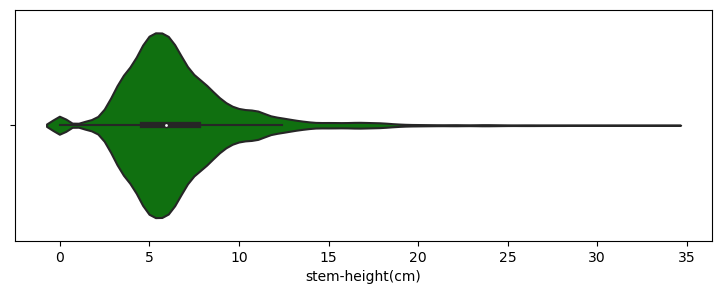

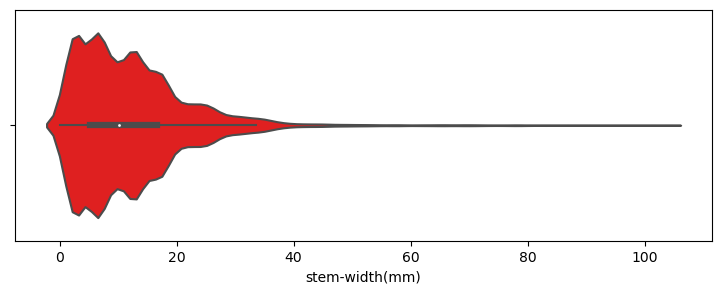

In [11]:
f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x = 'cap-diameter(cm)',color='orange')
#sb.stripplot(data=mushroom_clean,x='cap-diameter', color='grey',alpha=0.1)
print(mushroom_clean['cap-diameter(cm)'].describe())

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-height(cm)',color='green')
print(mushroom_clean['stem-height(cm)'].describe())

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-width(mm)',color='red')
print(mushroom_clean['stem-width(mm)'].describe())

#### Findings:

We can see that across all 3 numerical columns, the data of these 3 dimensions of the mushrooms are mostly close together with relatively low standard deviation, with a few data points that are significantly longer/larger across the 3 numerical columns.

### Comparing the 3 numerical variables against Class of mushroom

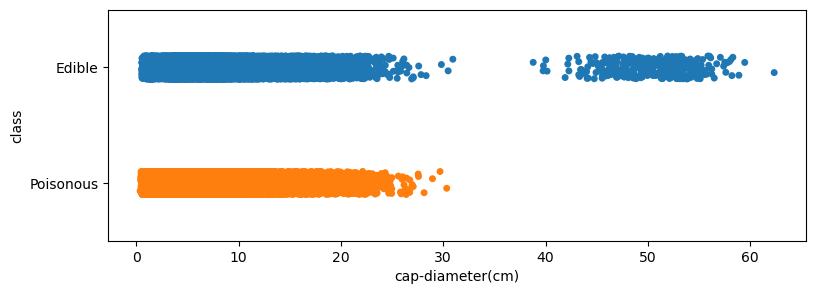

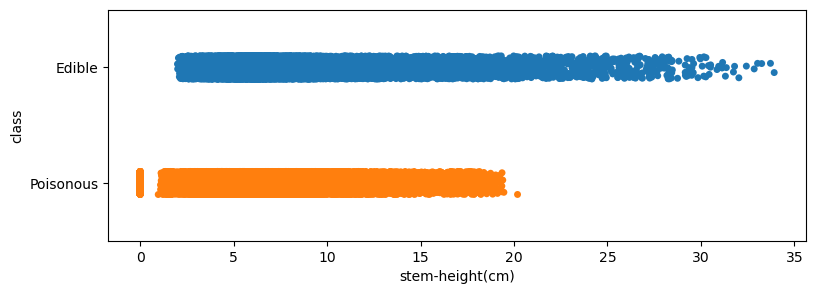

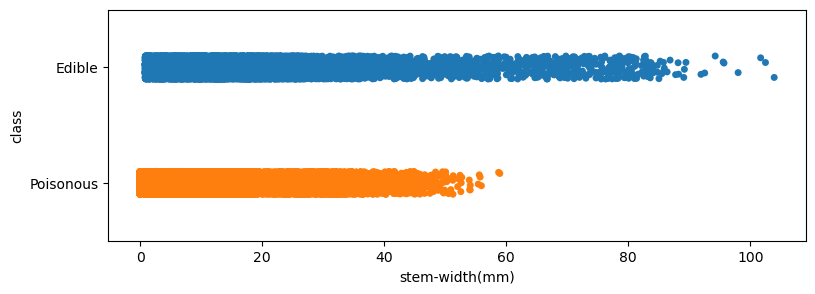

In [12]:
for column in mushroom_clean:
    if (mushroom_clean[column].dtypes == 'float64'):
        f = plt.figure(figsize=(9, 3))
        sb.stripplot(x=column, y='class', data=mushroom_clean)


#### Findings: 

We can see that for 
1. **cap-diameter** : Any mushrooms from this dataset with cap-diameter longer than 31cm is guaranteed to be edible, 100% confidence.
2. **stem-height**  : Any mushrooms from this dataset with stem-height longer than 21cm is guaranteed to be edible, 100% confidence.
3. **stem-width**   :  Any mushrooms from this dataset with stem-width longer than 60mm is guaranteed to be edible, 100% confidence.


### Exploring the 14 categorical data columns (excludes class)
Categorical variables:

1. cap-shape
2. cap-surface
3. cap-color
4. does-bruise-or-bleed
5. gill-attachment
6. gill-color
7. stem-root
8. stem-surface
9. stem-color
10. veil-color
11. has-ring
12. spore-print-color
13. habitat
14. season

C:\Users\pc\AppData\Local\Temp\ipykernel_2852\4174996883.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(9, 4))


<Figure size 900x400 with 0 Axes>

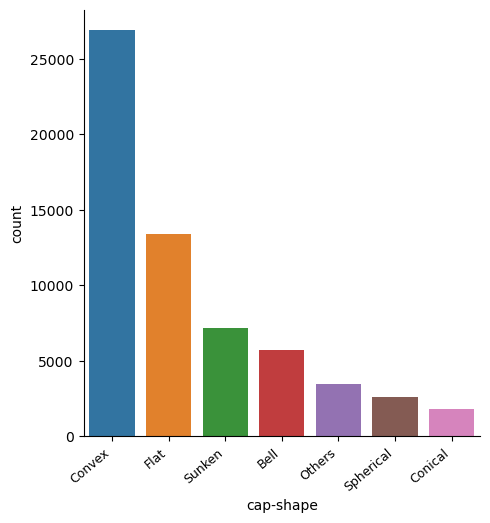

<Figure size 900x400 with 0 Axes>

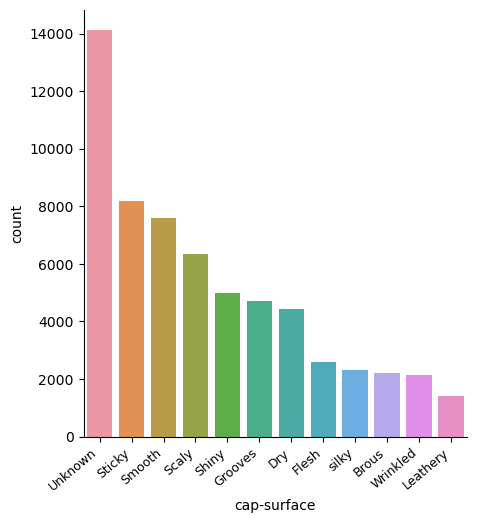

<Figure size 900x400 with 0 Axes>

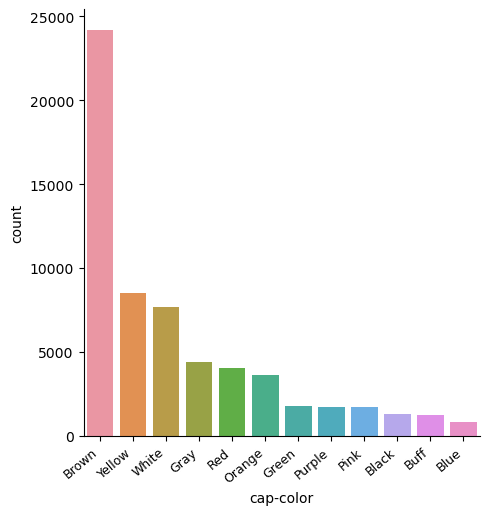

<Figure size 900x400 with 0 Axes>

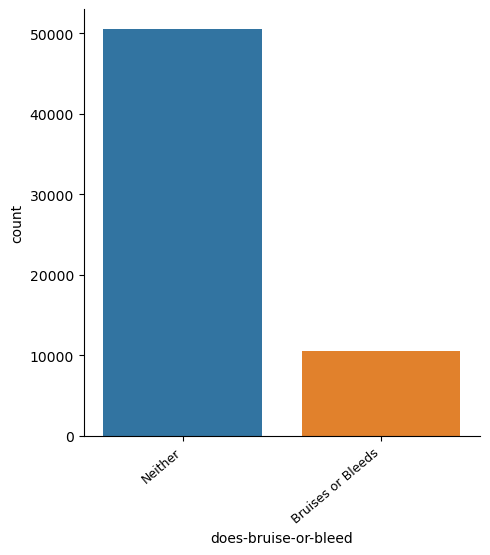

<Figure size 900x400 with 0 Axes>

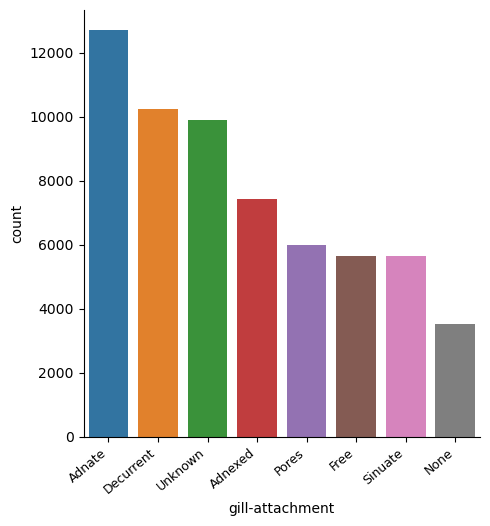

<Figure size 900x400 with 0 Axes>

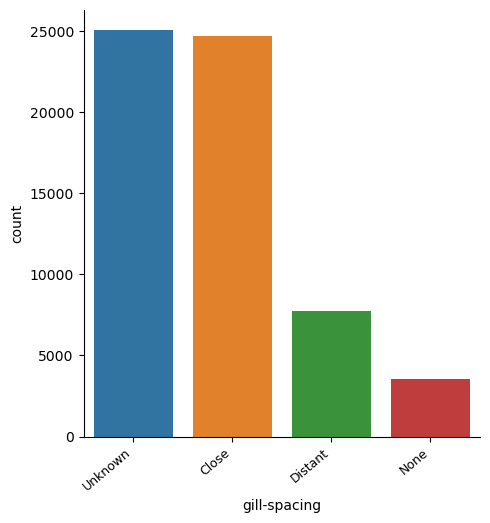

<Figure size 900x400 with 0 Axes>

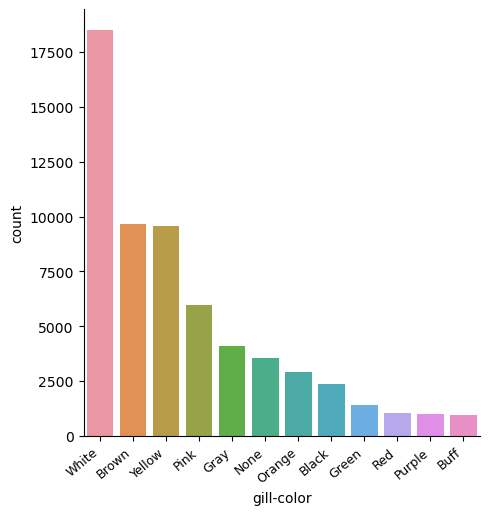

<Figure size 900x400 with 0 Axes>

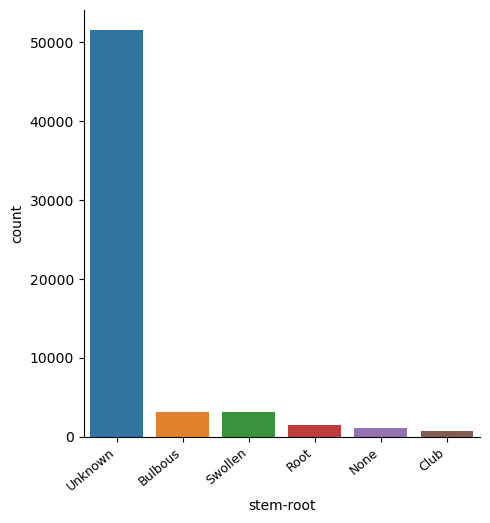

<Figure size 900x400 with 0 Axes>

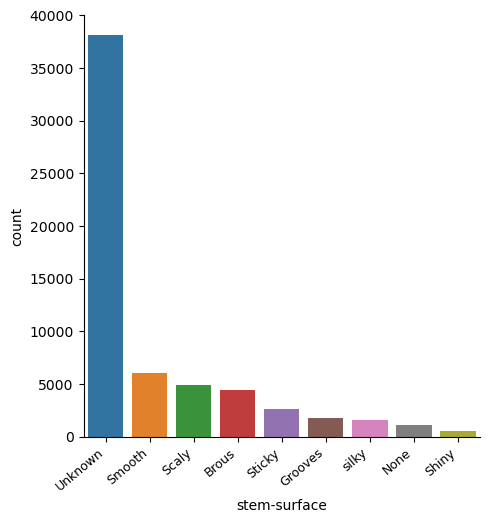

<Figure size 900x400 with 0 Axes>

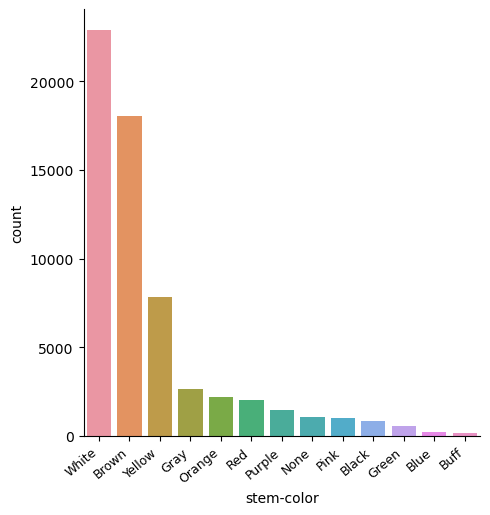

<Figure size 900x400 with 0 Axes>

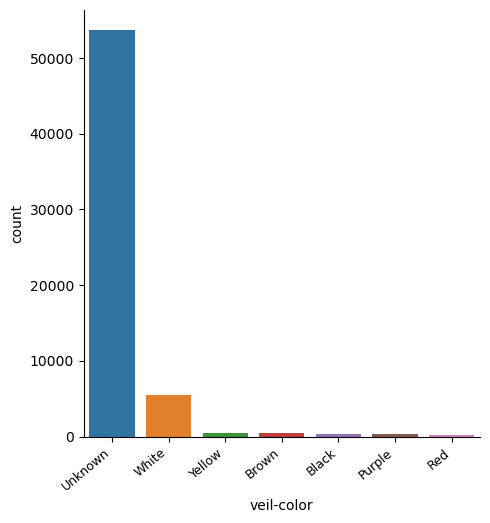

<Figure size 900x400 with 0 Axes>

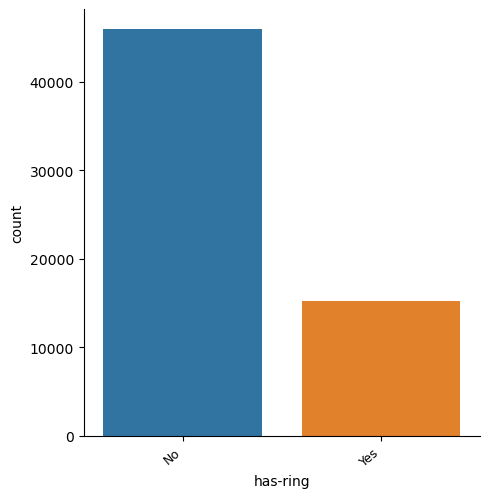

<Figure size 900x400 with 0 Axes>

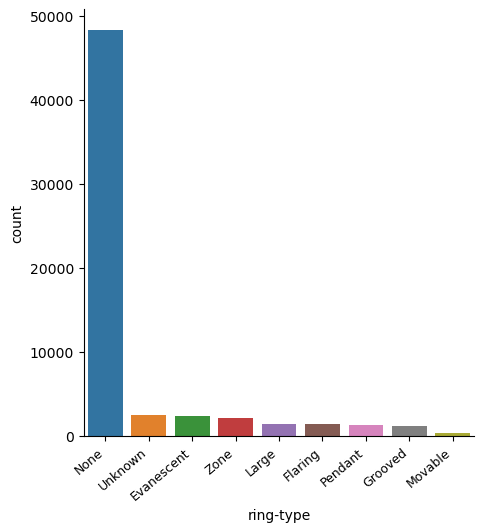

<Figure size 900x400 with 0 Axes>

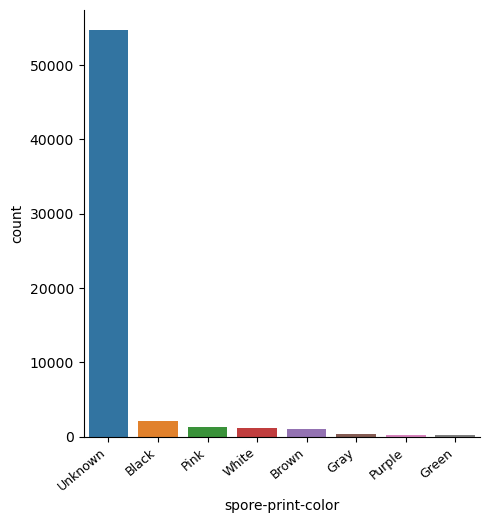

<Figure size 900x400 with 0 Axes>

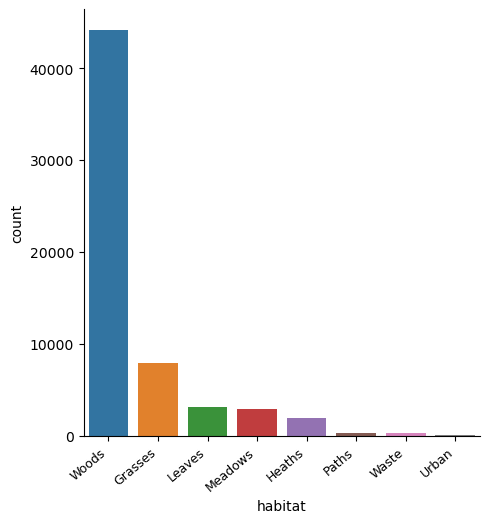

<Figure size 900x400 with 0 Axes>

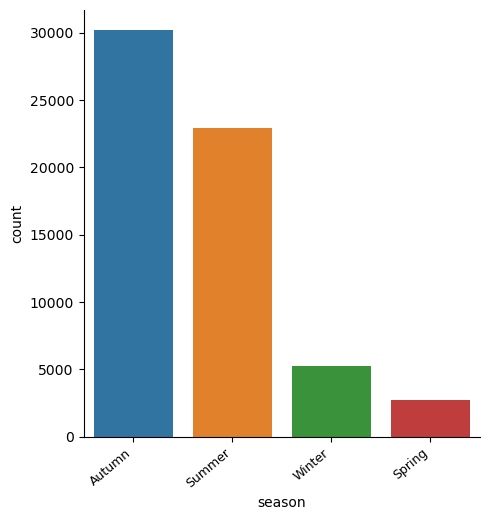

In [13]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, data = mushroom_clean, kind = "count",order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 


#### Findings: 

We can see that most of the categorical columns are unbalanced between their features, there are some features that are common and some are very rare.

These can be seen from the colours of the different features, where colours like Brown,Yellow,White are much more common than colours such as Orange,Red,Purple,Pink,Black,Green,Blue,Gray.

2 more obseved significant unbalances are that most of the mushrooms in this dataset do not Bruise or Bleed 
and that most mushrooms are from the habitat "Woods".

### Comparing the 14 Categorical variables against Class of mushroom


<Figure size 900x400 with 0 Axes>

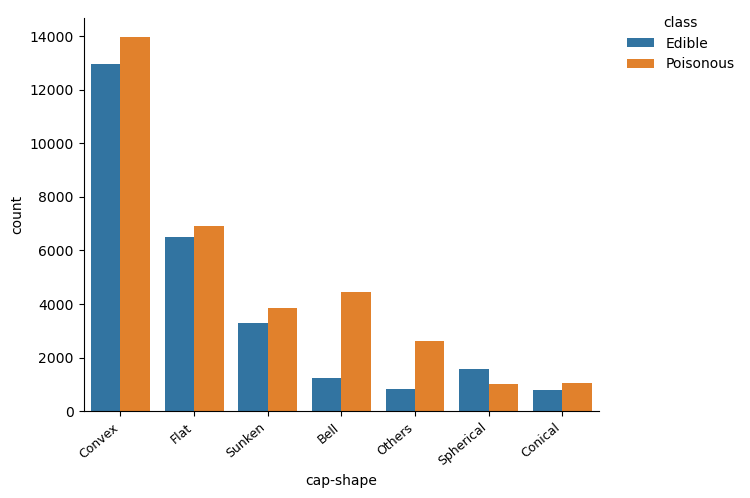

<Figure size 900x400 with 0 Axes>

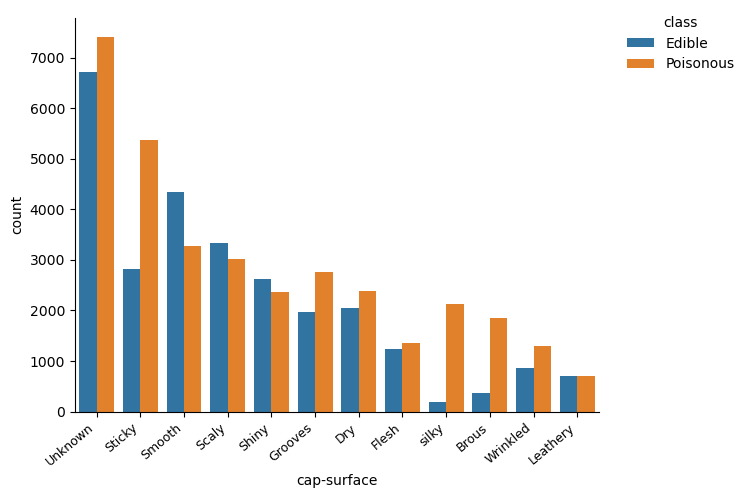

<Figure size 900x400 with 0 Axes>

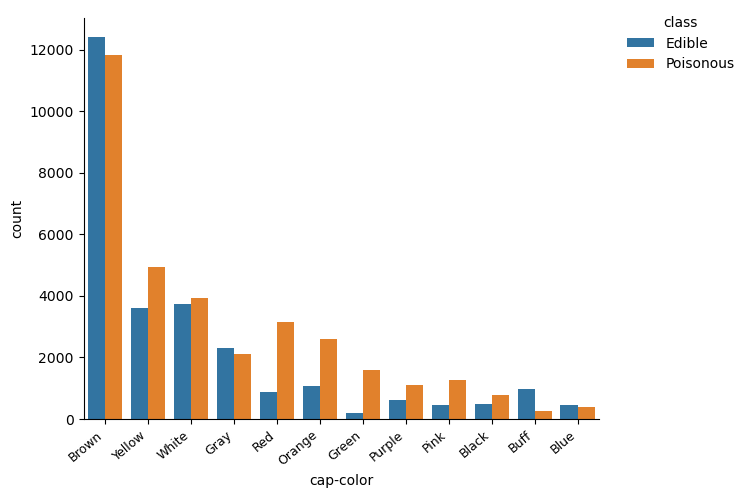

<Figure size 900x400 with 0 Axes>

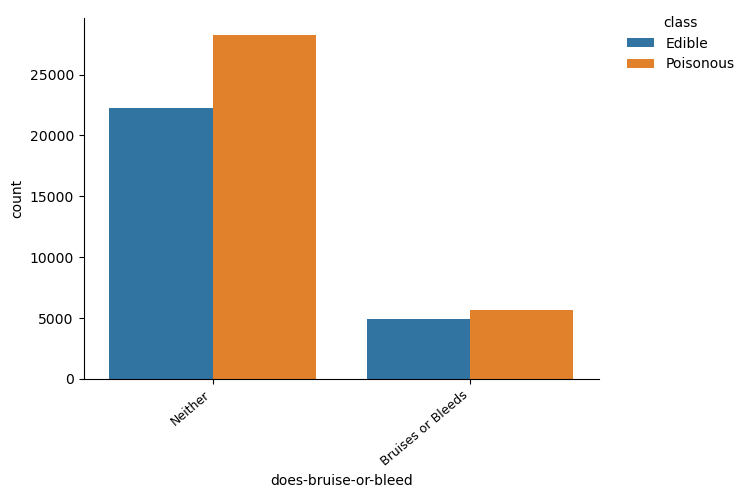

<Figure size 900x400 with 0 Axes>

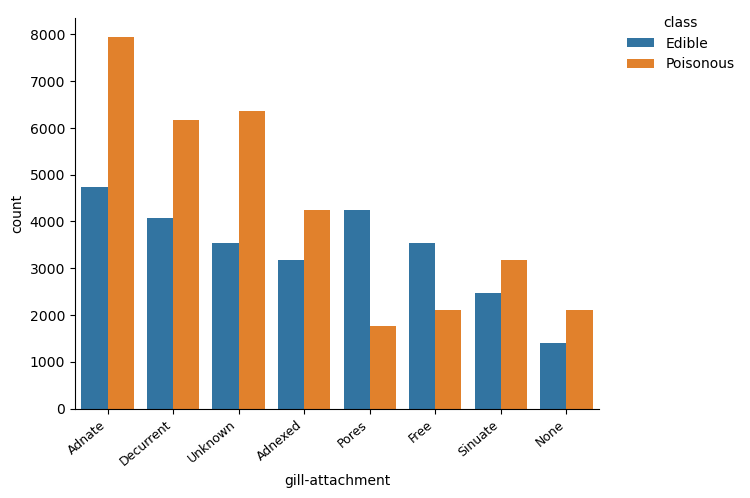

<Figure size 900x400 with 0 Axes>

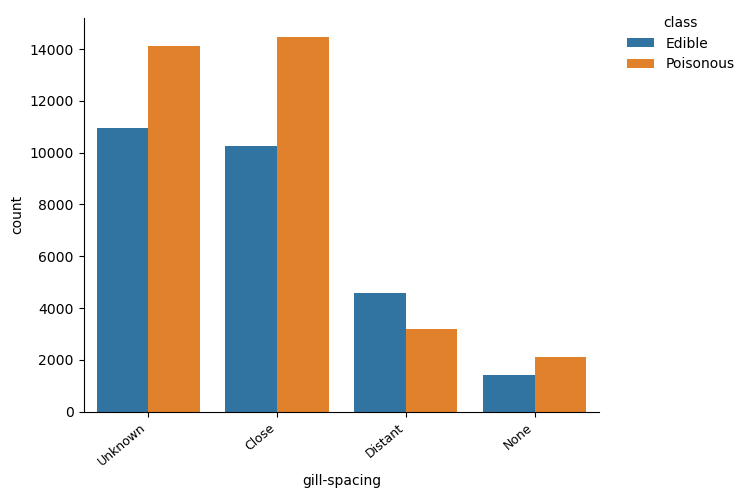

<Figure size 900x400 with 0 Axes>

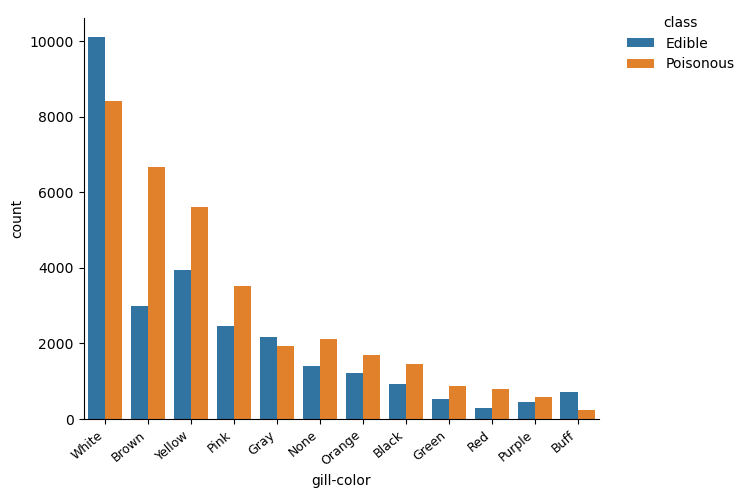

<Figure size 900x400 with 0 Axes>

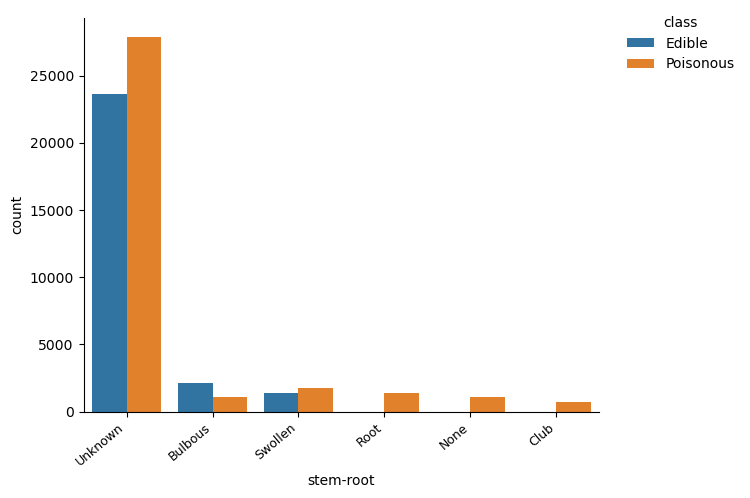

<Figure size 900x400 with 0 Axes>

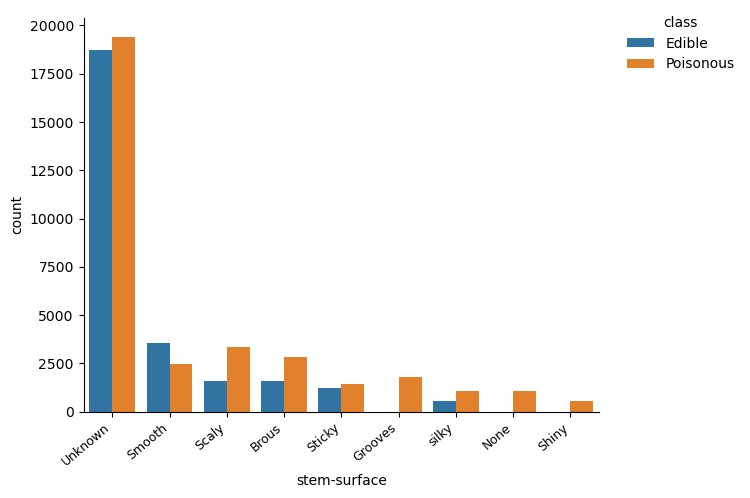

<Figure size 900x400 with 0 Axes>

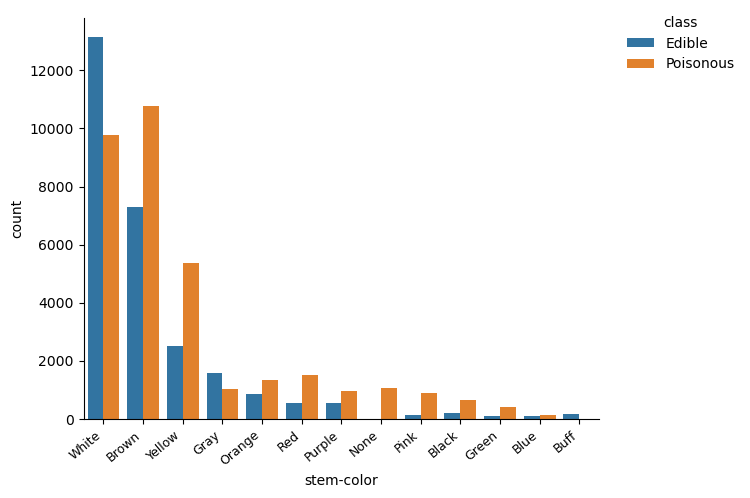

<Figure size 900x400 with 0 Axes>

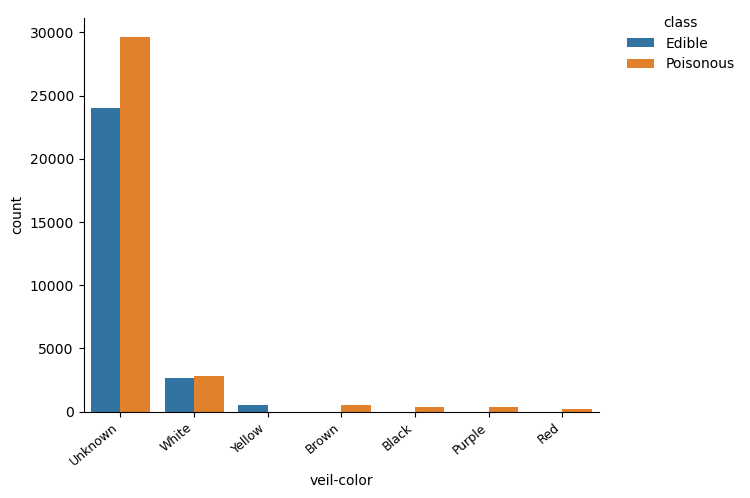

<Figure size 900x400 with 0 Axes>

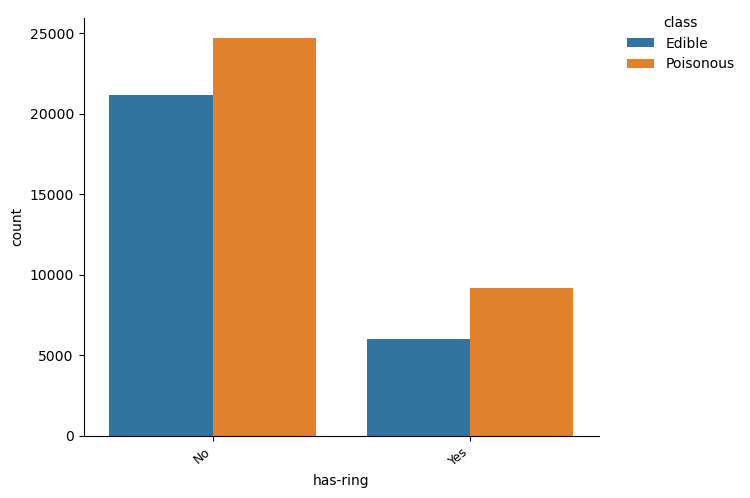

<Figure size 900x400 with 0 Axes>

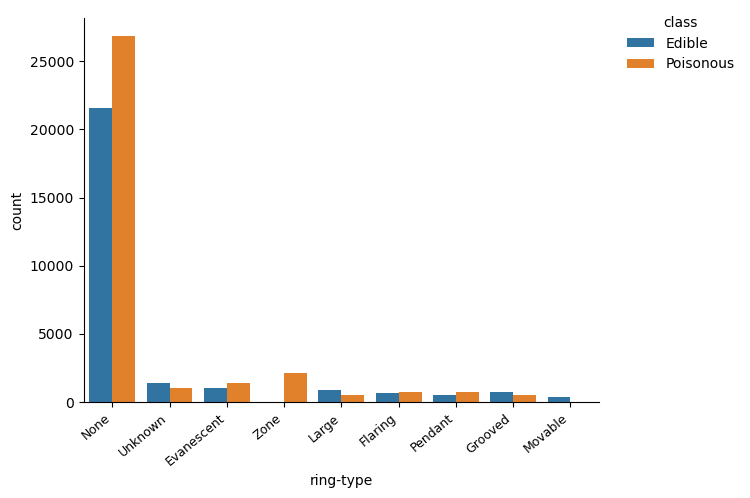

<Figure size 900x400 with 0 Axes>

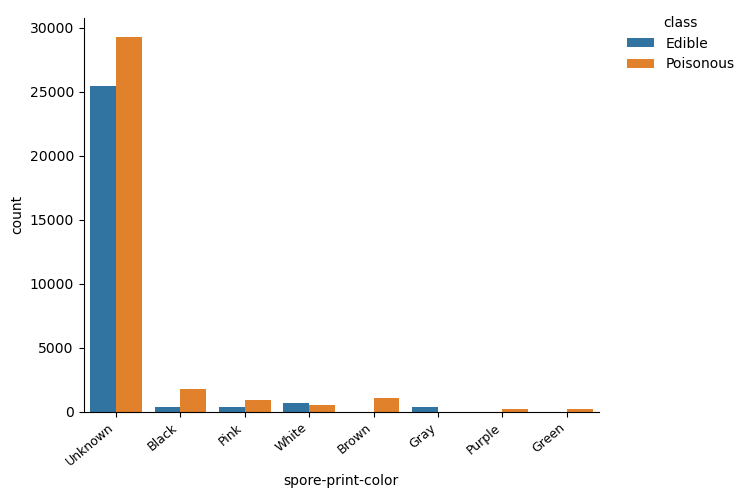

<Figure size 900x400 with 0 Axes>

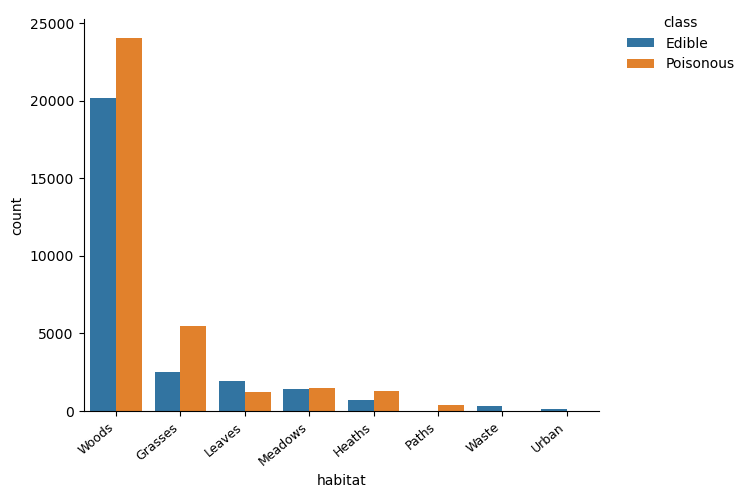

<Figure size 900x400 with 0 Axes>

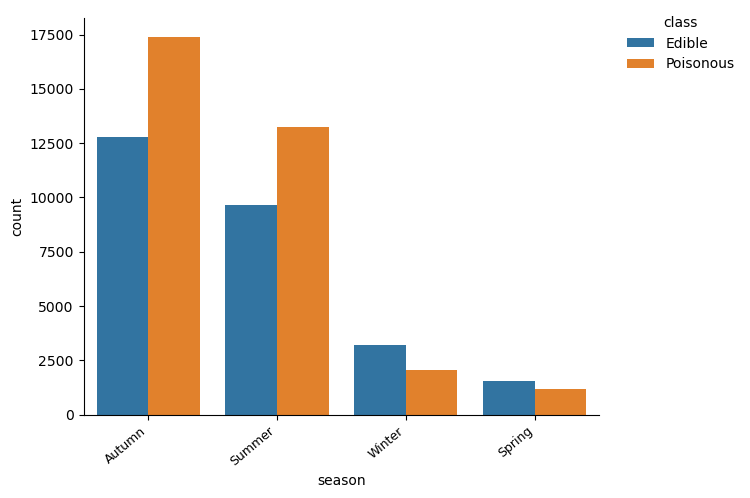

In [14]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean,order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
        #Tilted the labels so they dont overlap
        #Arranged categories in descending order based on count
        sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Got the legend out of da way
        plt.tight_layout()
        plt.show()

In [15]:
#Create new data set with only the categorical columns

mushroom_cat = mushroom_clean.copy()

for column in mushroom_cat: 
    if (mushroom_cat[column].dtypes == 'float64'):
        mushroom_cat.drop(column, axis=1,inplace=True)
        
mushroom_cat

class cap-shape cap-surface cap-color does-bruise-or-bleed  \
0      Poisonous    Convex     Grooves    Orange              Neither   
1      Poisonous    Convex     Grooves    Orange              Neither   
2      Poisonous    Convex     Grooves    Orange              Neither   
3      Poisonous      Flat       Shiny       Red              Neither   
4      Poisonous    Convex       Shiny    Orange              Neither   
...          ...       ...         ...       ...                  ...   
61064  Poisonous    Sunken      Smooth    Yellow              Neither   
61065  Poisonous      Flat      Smooth    Yellow              Neither   
61066  Poisonous    Sunken      Smooth    Yellow              Neither   
61067  Poisonous      Flat      Smooth    Yellow              Neither   
61068  Poisonous    Sunken      Smooth    Yellow              Neither   

      gill-attachment gill-spacing gill-color stem-root stem-surface  \
0                Free      Unknown      White   Swollen        Scaly   
1                Free      Unknown      White   Swollen        Scaly   
2                Free      Unknown      White   Swollen        Scaly   
3                Free      Unknown      White   Swollen        Scaly   
4                Free      Unknown      White   Swollen        Scaly   
...               ...          ...        ...       ...          ...   
61064            None         None       None   Unknown      Unknown   
61065            None         None       None   Unknown      Unknown   
61066            None         None       None   Unknown      Unknown   
61067            None         None       None   Unknown      Unknown   
61068            None         None       None   Unknown      Unknown   

      stem-color veil-color has-ring ring-type spore-print-color habitat  \
0          White      White      Yes   Grooved           Unknown   Woods   
1          White      White      Yes   Grooved           Unknown   Woods   
2          White      White      Yes   Grooved           Unknown   Woods   
3          White      White      Yes   Pendant           Unknown   Woods   
4          White      White      Yes   Pendant           Unknown   Woods   
...          ...        ...      ...       ...               ...     ...   
61064     Yellow    Unknown       No      None           Unknown   Woods   
61065     Yellow    Unknown       No      None           Unknown   Woods   
61066     Yellow    Unknown       No      None           Unknown   Woods   
61067     Yellow    Unknown       No      None           Unknown   Woods   
61068     Yellow    Unknown       No      None           Unknown   Woods   

       season  
0      Winter  
1      Summer  
2      Winter  
3      Winter  
4      Winter  
...       ...  
61064  Autumn  
61065  Autumn  
61066  Summer  
61067  Summer  
61068  Summer  

[61069 rows x 17 columns]

In [16]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

#Our categorical variables contain features which are nominal : where there is no apparent order in the features,
#For example colours have no natural ordering, whereas ordinal categorical variables such as movie ratings 
#: {'good','mediocore','bad'} have a natural ordering

#Since we have nominal categorical variables, we use LabelEncoder to convert each unique nominal value in the column 
#to a numerical value where the numbers do not inherently have any ordinal relationship, 
#so ours model may interpret the categorical variables appropriately as nominal values

for feature in mushroom_cat.columns :
    data_encoded[feature]=label.fit_transform(mushroom_cat[feature])


In [17]:
# Poisonous is encoded as 1 and Edible is encoded as 0
# Drop the class column to be encoded manually as we want Edible to be 1 and Poisonous to be 0
data_encoded_copy = data_encoded.copy()
data_encoded_wo_class = data_encoded_copy.drop('class', axis=1)

#Encoding Edible as 1 and poisonous as 0, because we are trying to find out if a mushroom is edible or not, so Edible will be 1.
mushroom_cat_class = mushroom_cat['class'].copy()
mushroom_cat_class = mushroom_cat_class.map({'Poisonous':0,'Edible':1})
result = pd.concat([mushroom_cat_class, data_encoded_wo_class], axis = 1)
result


class  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0         0          2            3          6                     1   
1         0          2            3          6                     1   
2         0          2            3          6                     1   
3         0          3            6          9                     1   
4         0          2            6          6                     1   
...     ...        ...          ...        ...                   ...   
61064     0          6            7         11                     1   
61065     0          3            7         11                     1   
61066     0          6            7         11                     1   
61067     0          3            7         11                     1   
61068     0          6            7         11                     1   

       gill-attachment  gill-spacing  gill-color  stem-root  stem-surface  \
0                    3             3          10          4             3   
1                    3             3          10          4             3   
2                    3             3          10          4             3   
3                    3             3          10          4             3   
4                    3             3          10          4             3   
...                ...           ...         ...        ...           ...   
61064                4             2           5          5             7   
61065                4             2           5          5             7   
61066                4             2           5          5             7   
61067                4             2           5          5             7   
61068                4             2           5          5             7   

       stem-color  veil-color  has-ring  ring-type  spore-print-color  \
0              11           5         1          2                  6   
1              11           5         1          2                  6   
2              11           5         1          2                  6   
3              11           5         1          6                  6   
4              11           5         1          6                  6   
...           ...         ...       ...        ...                ...   
61064          12           4         0          5                  6   
61065          12           4         0          5                  6   
61066          12           4         0          5                  6   
61067          12           4         0          5                  6   
61068          12           4         0          5                  6   

       habitat  season  
0            7       3  
1            7       2  
2            7       3  
3            7       3  
4            7       3  
...        ...     ...  
61064        7       0  
61065        7       0  
61066        7       2  
61067        7       2  
61068        7       2  

[61069 rows x 17 columns]

### Cramer's V 
##### to understand r/s between nominal categorical predictors and binary 'class'

Cramer's V is a measure of association between two nominal variables, similar to the correlation coefficient for continuous variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association.

Cramer's V uses the chi2 test

How it works: The chi2 test compares the observed frequencies of each category of one variable to the expected frequencies of each category, assuming that there is no association between the two variables. If the observed frequencies differ significantly from the expected frequencies, then it suggests that there is a significant association between the two variables.

What it actually calculates:  The test involves calculating a test statistic, which measures the difference between the observed and expected frequencies, and then comparing this value to a critical value from the chi-square distribution. If the test statistic is greater than the critical value, then we can conclude that there is a significant association between the two variables.

In [18]:
# Building of Cramer's V function


from scipy.stats import chi2_contingency
import numpy as np


def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))
        
    
#Building of the matrix
rows= []

#Nested for loop to compare each variable to every other variable
for var1 in result:
    col = []
    for var2 in result:
        cramers = cramers_V(result[var1], result[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
cramerVdf = pd.DataFrame(cramers_results, columns = result.columns, index = result.columns)

cramerVdf

class  cap-shape  cap-surface  cap-color  \
class                  1.00       0.04         0.05       0.06   
cap-shape              0.04       1.00         0.05       0.02   
cap-surface            0.05       0.05         1.00       0.03   
cap-color              0.06       0.02         0.03       1.00   
does-bruise-or-bleed   0.00       0.11         0.06       0.03   
gill-attachment        0.05       0.14         0.08       0.04   
gill-spacing           0.01       0.14         0.09       0.04   
gill-color             0.04       0.10         0.05       0.07   
stem-root              0.05       0.08         0.05       0.02   
stem-surface           0.07       0.10         0.07       0.03   
stem-color             0.07       0.07         0.04       0.10   
veil-color             0.03       0.01         0.05       0.02   
has-ring               0.00       0.05         0.11       0.03   
ring-type              0.04       0.04         0.05       0.02   
spore-print-color      0.04       0.02         0.07       0.04   
habitat                0.03       0.03         0.03       0.03   
season                 0.01       0.02         0.01       0.01   

                      does-bruise-or-bleed  gill-attachment  gill-spacing  \
class                                 0.00             0.05          0.01   
cap-shape                             0.11             0.14          0.14   
cap-surface                           0.06             0.08          0.09   
cap-color                             0.03             0.04          0.04   
does-bruise-or-bleed                  1.00             0.19          0.03   
gill-attachment                       0.19             1.00          0.41   
gill-spacing                          0.03             0.41          1.00   
gill-color                            0.05             0.20          0.35   
stem-root                             0.02             0.07          0.06   
stem-surface                          0.07             0.09          0.14   
stem-color                            0.04             0.07          0.07   
veil-color                            0.03             0.05          0.02   
has-ring                              0.00             0.18          0.02   
ring-type                             0.04             0.07          0.03   
spore-print-color                     0.02             0.04          0.06   
habitat                               0.02             0.03          0.03   
season                                0.02             0.02          0.02   

                      gill-color  stem-root  stem-surface  stem-color  \
class                       0.04       0.05          0.07        0.07   
cap-shape                   0.10       0.08          0.10        0.07   
cap-surface                 0.05       0.05          0.07        0.04   
cap-color                   0.07       0.02          0.03        0.10   
does-bruise-or-bleed        0.05       0.02          0.07        0.04   
gill-attachment             0.20       0.07          0.09        0.07   
gill-spacing                0.35       0.06          0.14        0.07   
gill-color                  1.00       0.06          0.07        0.09   
stem-root                   0.06       1.00          0.23        0.22   
stem-surface                0.07       0.23          1.00        0.18   
stem-color                  0.09       0.22          0.18        1.00   
veil-color                  0.04       0.05          0.02        0.02   
has-ring                    0.05       0.03          0.07        0.05   
ring-type                   0.03       0.07          0.03        0.02   
spore-print-color           0.08       0.05          0.03        0.05   
habitat                     0.02       0.01          0.03        0.02   
season                      0.02       0.01          0.01        0.02   

                      veil-color  has-ring  ring-type  spore-print-color  \
class                       0.03      0.00       0.04  

C:\Users\pc\AppData\Local\Temp\ipykernel_2852\1654025524.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cramerVdf, dtype=np.bool)


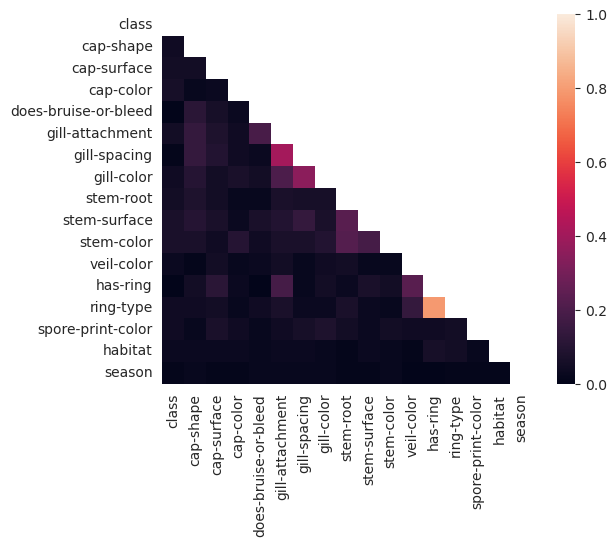

In [19]:
#Heatmap of Cramer's V correlation matrix

mask = np.zeros_like(cramerVdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sb.axes_style("white"):
  ax = sb.heatmap(cramerVdf, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

### Findings :

From the first column of the Cramer's V matrix, we see that the variables with a stronger relationship with class are:

1. stem-color(0.07)
2. stem-surface(0.07)
3. cap-color(0.06)
4. cap-surface(0.05)
5. gill-attachment(0.05)
6. stem-root(0.05) 

However, the overall relationship between the categorical predictors and class is not very strong, as all the Cramer's V values are less than 0.1.
As typically, a Cramer's V value above 0.1 is considered a moderate association or relationship between the variables while values above 0.3 are considered to indicate a strong association or relationship. 

However, it is important to note that when combined with other variables in a model, the variables may still produce a significant relationship  in predicting class.

### Correlation Matrix

We will also look at the correlation matrix of just the label encoded categorical values and not the chi2.

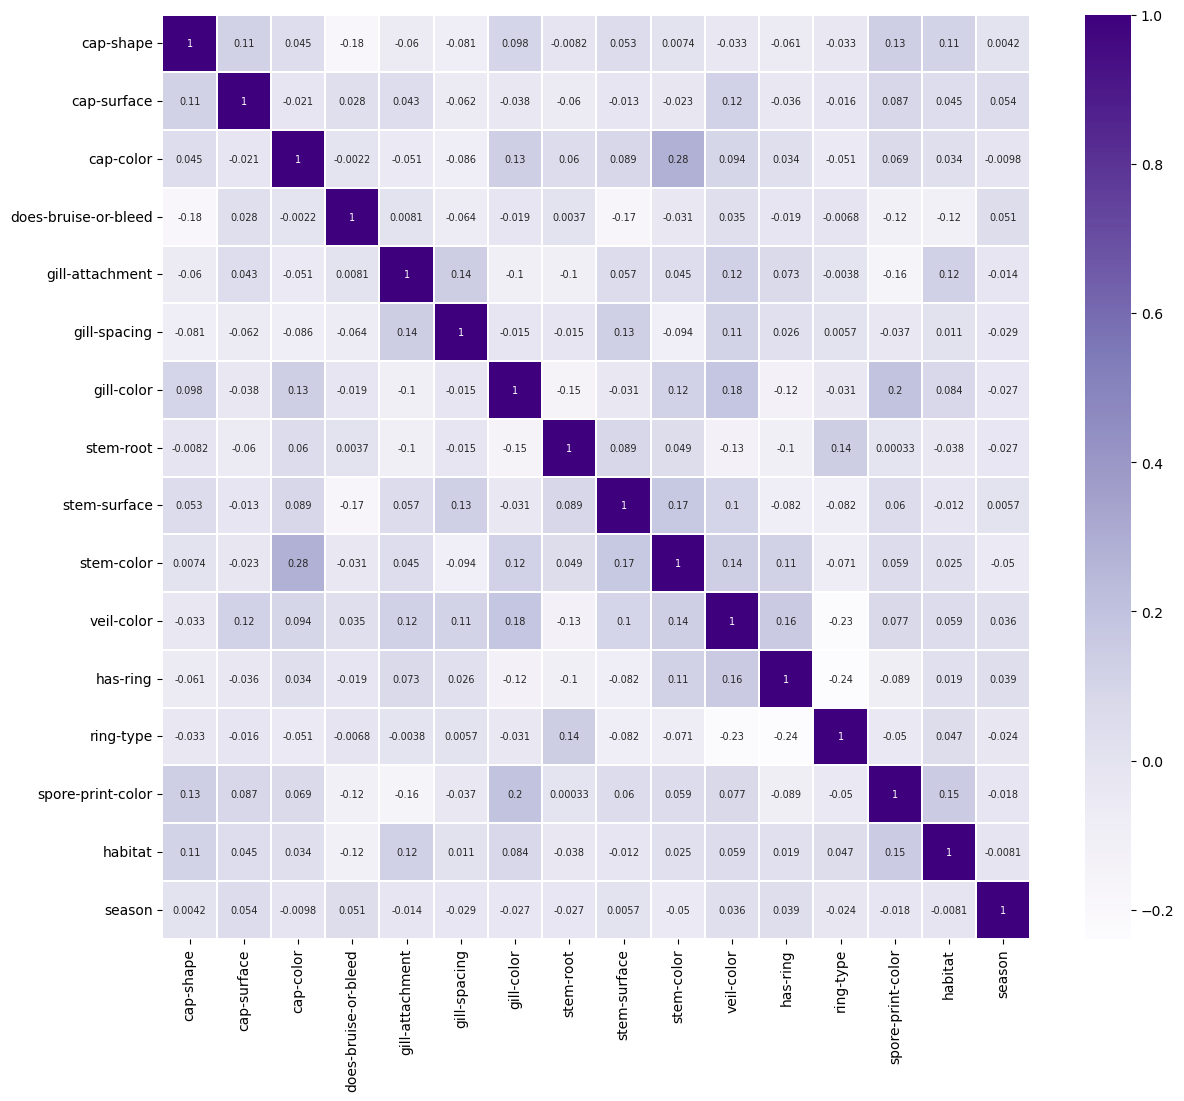

In [20]:
plt.figure(figsize=(14,12))
sb.heatmap(result.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

### Findings : 

The relatively highler correlated variables picked up from the ***Correlation Matrix***:
1. cap-surface (0.11)
2. does-bruise-or-bleed(-0.18)
3. gill-spacing (-0.81)
4. gill-color (0.098)
5. spore-print-color (0.13)
6. habitat(0.11)


# Machine Learning Techniques

In [21]:
#Creating the predictor data frame which includes :  Numerical Predictors and Label encoded Categorical Predictors
mushroom_predictors = mushroom_clean.copy()
mushroom_predictors.drop(['class'], axis=1,inplace=True)


for feature in mushroom_predictors.columns :
    mushroom_predictors[feature]=label.fit_transform(mushroom_predictors[feature])

mushroom_predictors

cap-diameter(cm)  cap-shape  cap-surface  cap-color  \
0                  1481          2            3          6   
1                  1614          2            3          6   
2                  1362          2            3          6   
3                  1372          3            6          9   
4                  1419          2            6          6   
...                 ...        ...          ...        ...   
61064                73          6            7         11   
61065                82          3            7         11   
61066                82          6            7         11   
61067                79          3            7         11   
61068                72          6            7         11   

       does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                         1                3             3          10   
1                         1                3             3          10   
2                         1                3             3          10   
3                         1                3             3          10   
4                         1                3             3          10   
...                     ...              ...           ...         ...   
61064                     1                4             2           5   
61065                     1                4             2           5   
61066                     1                4             2           5   
61067                     1                4             2           5   
61068                     1                4             2           5   

       stem-height(cm)  stem-width(mm)  stem-root  stem-surface  stem-color  \
0                 1577            1656          4             3          11   
1                 1681            1766          4             3          11   
2                 1662            1721          4             3          11   
3                 1463            1545          4             3          11   
4                 1537            1667          4             3          11   
...                ...             ...        ...           ...         ...   
61064              283             569          5             7          12   
61065              208             490          5             7          12   
61066              276             584          5             7          12   
61067              246             491          5             7          12   
61068              215             492          5             7          12   

       veil-color  has-ring  ring-type  spore-print-color  habitat  season  
0               5         1          2                  6        7       3  
1               5         1          2                  6        7       2  
2               5         1          2                  6        7       3  
3               5         1          6                  6        7       3  
4               5         1          6                  6        7       3  
...           ...       ...        ...                ...      ...     ...  
61064           4         0          5                  6        7       0  
61065           4         0          5                  6        7       0  
61066           4         0          5                  6        7       2  
61067           4         0          5                  6        7       2  
61068           4         0          5                  6        7       2  

[61069 rows x 19 columns]

## Model 1 : Naïve Bayes Classifier 

***Response Variable*** : class

***Predictor Variable*** : Numerical variables + all the label encoded categorical variables

After doing Exploratory Data Analysis on both our numerical and categorical data, we found that our categorical values had little to no correlation with each other or with the “Class” variable. As such, we thought that it would be suitable to use the Naive Bayes machine learning model to predict the edibility of mushrooms.

The Naïve Bayes algorithm is suitable as it makes the assumption that all variables in the dataset are "naive", or in other words, not correlated to each other or independent of any other values. The Naive Bayes classifier tends to perform well on datasets where the features are approximately independent or have low levels of correlation.

This model will thus allow us to predict the class of mushroom edibility using our dataset which has low correlation values.

In [22]:
# Extract the variables and the associated data as a dataframe

predictor = mushroom_predictors
edible = pd.DataFrame(mushroom_cat['class'])


# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)


Train Set : (48855, 1) (48855, 19)
Test Set  : (12214, 1) (12214, 19)


### Fitting the model

In [23]:
# Here we use Gaussian Naive Bayes, which implements the Gaussian Naive Bayes algorithm for classification.
# We import the GaussianNB package from the sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# We fit the model with the defined Train data
nb.fit(predictor_train, edible_train.values.ravel())


GaussianNB()

### The Train Set

Accuracy:  0.652911677412752
Naive Bayes Classification report for Train data (actual vs predicted): 

               precision    recall  f1-score   support

      Edible       0.58      0.81      0.67     21744
   Poisonous       0.77      0.53      0.63     27111

    accuracy                           0.65     48855
   macro avg       0.68      0.67      0.65     48855
weighted avg       0.69      0.65      0.65     48855



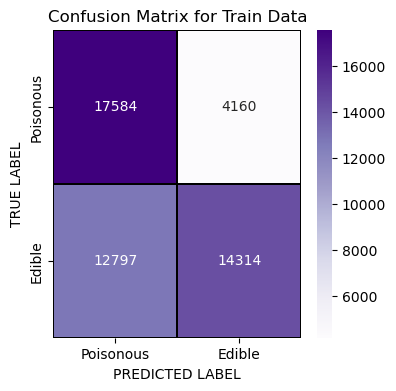

In [24]:
 # First make predictions on the train set
edible_train_pred = nb.predict(predictor_train)

# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_train, edible_train_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naive Bayes Classification report for Train data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1train = confusion_matrix(edible_train, edible_train_pred)

x_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1
y_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()


### Visualising probability distribution using ROC

In order to visualise the probability distribution of the model using an ROC AUC curve, we first compute the True Positive Rate (TPR) and False Positive Rate (FPR).

The TPR and FPR are calculated using the roc_curve function from the sklearn.metrics module.

The resulting ROC plot shows the relationship between sensitivity and specificity.

Sensitivity - The probability that the model predicts a positive outcome for an observation when the outcome is indeed positive.

Specificity - The probability that the model predicts a negative outcome for an observation when the outcome is indeed negative.

By visual observation, the closer the graph is to the top and left-hand borders, the more accurate it is.


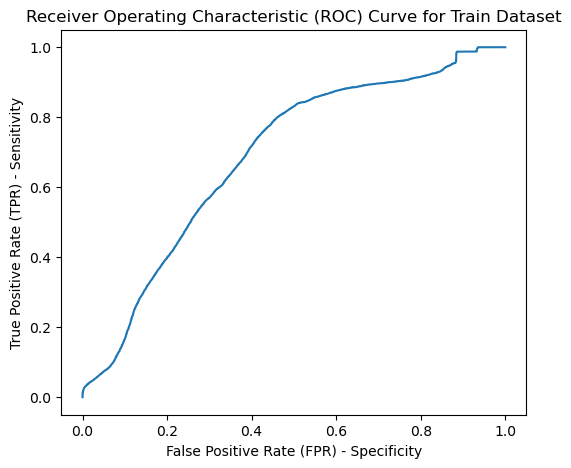

In [25]:
from sklearn.metrics import roc_curve

# Predict the probabilities of edible class for the train data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_train)
edible_train_prob = predicted_prob[:, 0]
fpr, tpr, thresholds = roc_curve(edible_train, edible_train_prob, pos_label='Edible')

fig = plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Dataset')
plt.show()


After obtaining the ROC Curve for the Train dataset, we can calculate the AUC (Area Under the Curve). The AUC is a measure of how well the model is able to discriminate between positive and negative instances.

AUC ranges from 0 to 1:

1 - Better discrimination performance

0 - Lower discrimination performance

An AUC of exactly 0.5 indicates that 


In [26]:
 from sklearn.metrics import roc_auc_score

# here we assign the predicted probabilities of the train set into y_true
y_true = edible_train == 'Edible'
y_true = (edible_train == 'Edible').astype(int)
auc = roc_auc_score(y_true, edible_train_prob)
print("AUC: {:.7f}".format(auc))


AUC: 0.6876475


### The Test Set

Accuracy:  0.6506467987555264
KNN Classification report for Test data (actual vs predicted): 

               precision    recall  f1-score   support

      Edible       0.58      0.81      0.67     21744
   Poisonous       0.77      0.53      0.63     27111

    accuracy                           0.65     48855
   macro avg       0.68      0.67      0.65     48855
weighted avg       0.69      0.65      0.65     48855



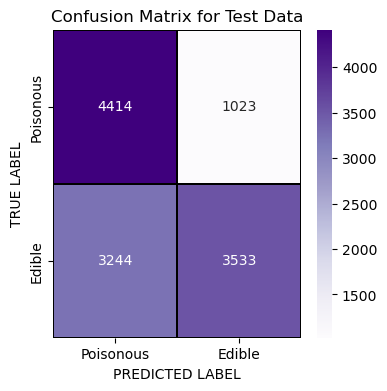

In [27]:
# After making predictions on the train set, we make predictions on the test set
edible_test_pred = nb.predict(predictor_test)

# Evaluate the model again by checking the accuracy of the predicted test data against the actual test data
accuracy = accuracy_score(edible_test, edible_test_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("KNN Classification report for Test data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1test = confusion_matrix(edible_test, edible_test_pred)

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()



We now calculate the AUC for the Test Dataset.


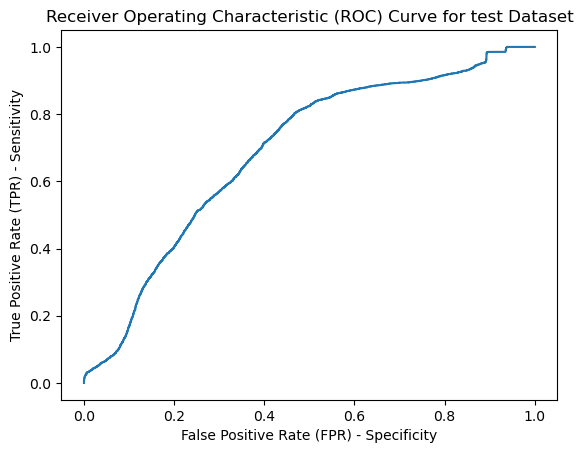

In [28]:
# Predict the probabilities of edible class for the test data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_test)
edible_test_prob = predicted_prob[:, 0]
fpr, tpr, thresholds = roc_curve(edible_test, edible_test_prob, pos_label='Edible')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()



The resulting ROC curve above displays the trade-off between the TPR and FPR for the test data. 




In [29]:
# Calculating the AUC of the Test dataset
y_true = edible_test == 'Edible'
y_true = (edible_test == 'Edible').astype(int)
auc = roc_auc_score(y_true, edible_test_prob)
print("AUC: {:.7f}".format(auc))


AUC: 0.6867477


### Findings
Based on the evaluations done on the Train and Test Datasets, we found that predictions on the Train dataset had an accuracy of 0.65037 while predictions on the Test data had an accuracy of 0.63951.

The Naive Bayes model used to fit the Train data is not performing optimally.


### Optimisation of the Naive Bayes Model
As our model is not performing optimally, we want to increase its effectiveness by using cross validation.
Other methods to improve the Naive Bayes model include: data pre-processing and feature selection.
A major data preprocessing step is handling missing values
The method of cross-validation

We will cover these in the Optimising MLA section further down


## Model 2 : Logistic Regression


In [30]:
# Extract the variables and the associated data as a dataframe

predictor = mushroom_predictors
edible = mushroom_cat_class

In [31]:
# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)


In [32]:
# Create the Logistic Regression object with the maximum iteration of 61069 which is the total number of rows
logreg = LogisticRegression(max_iter = 61069)


# Fit the Logistic Regression model using the train dataset
logreg.fit(predictor_train, edible_train.values.ravel())


# Coefficients of the Logistic Regression
print('Intercept \t: ', logreg.intercept_)
print('Coefficients \t:', logreg.coef_)


Intercept 	:  [-8.47434282]
Coefficients 	: [[ 1.93948205e-04  4.73775912e-02 -3.88347374e-02 -1.03045534e-01
   2.89129866e-01  2.00277476e-02 -8.15800973e-02  3.79241866e-03
   4.86391997e-04  2.83537485e-04  1.18463801e-01  1.43173165e-01
   3.73167408e-02  1.21085426e+00 -8.51426060e-01 -1.17934574e-01
   3.53690305e-01  7.36318023e-03  1.21628551e-01]]


### The Train Set

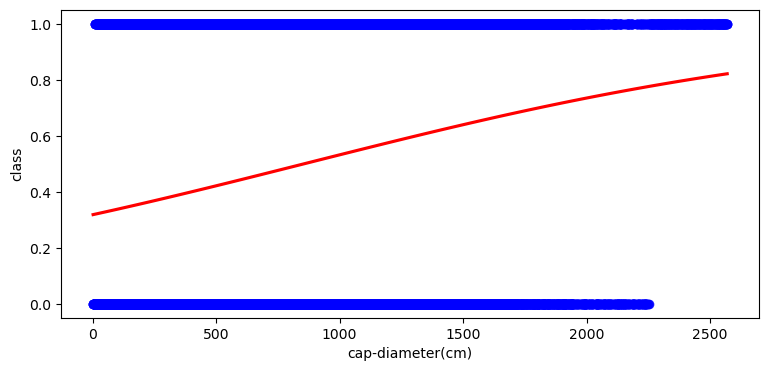

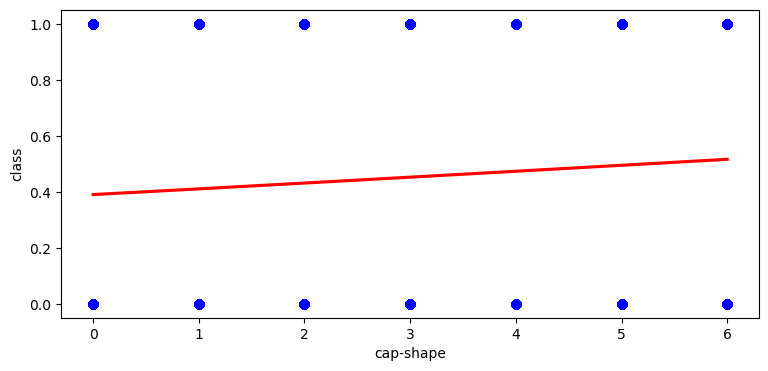

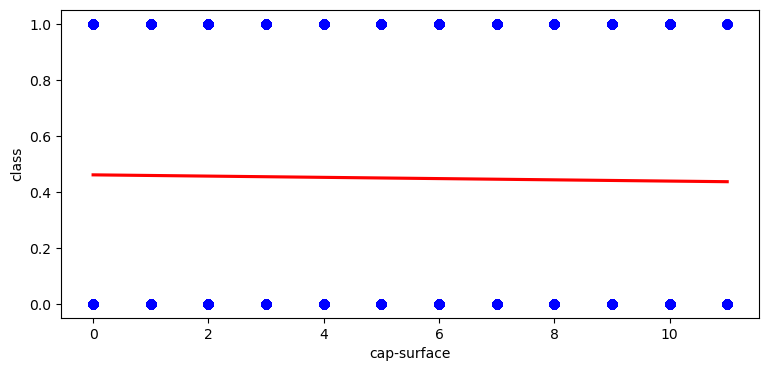

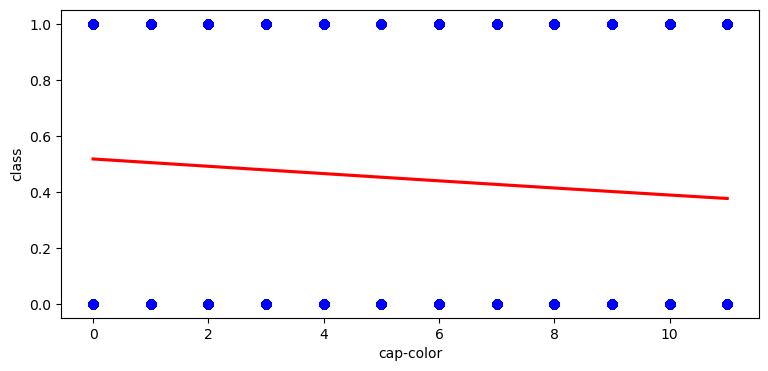

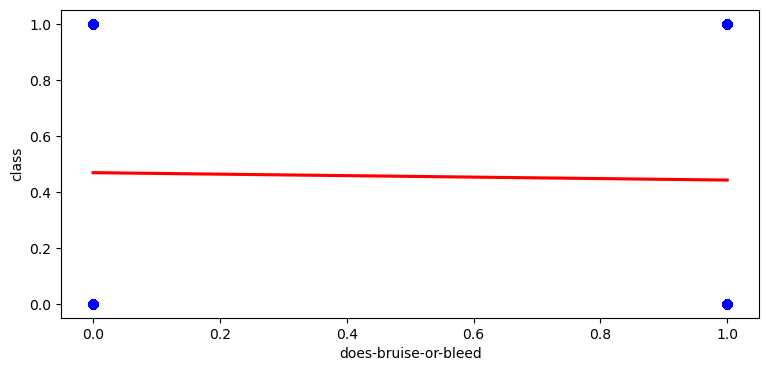

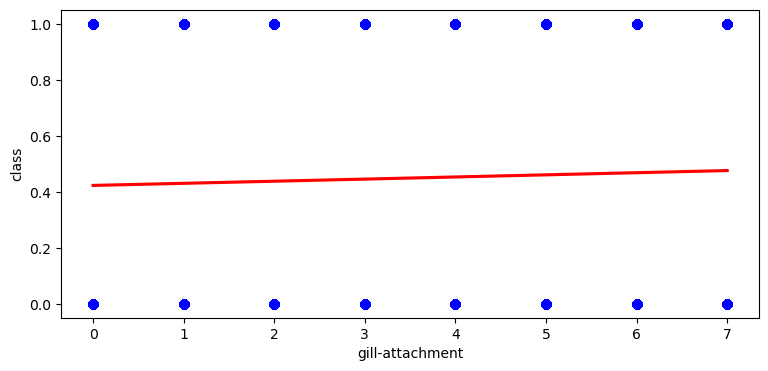

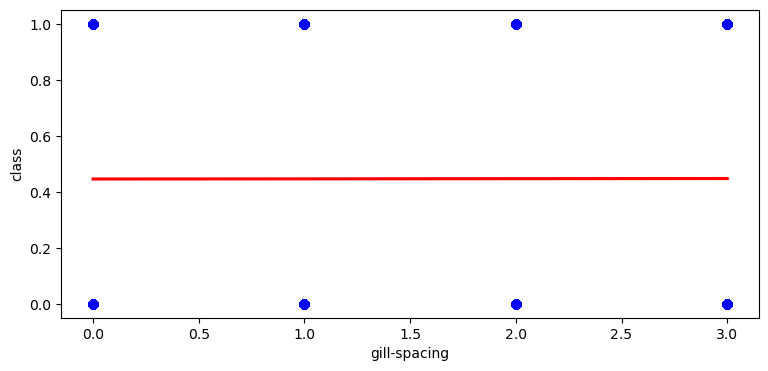

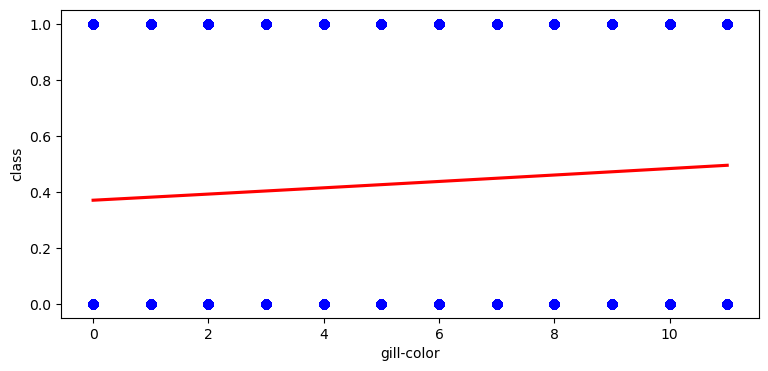

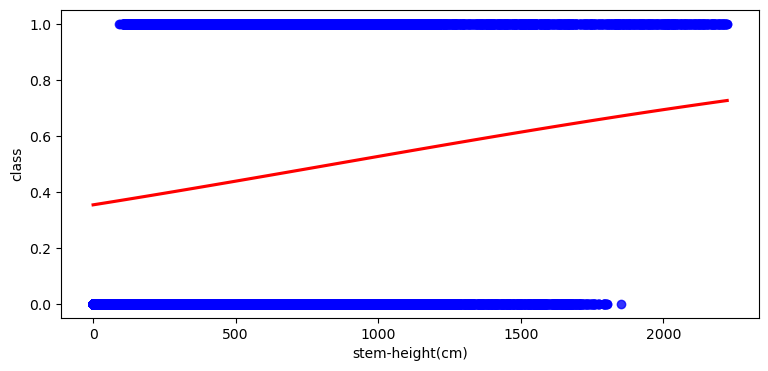

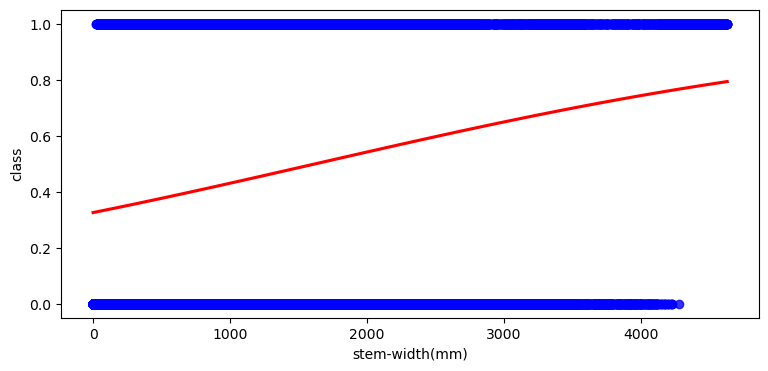

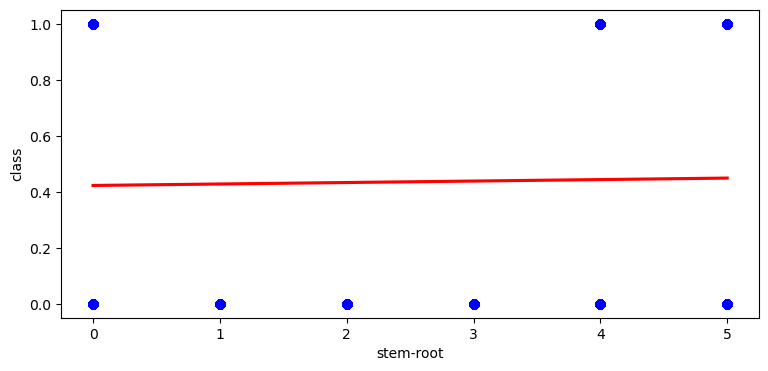

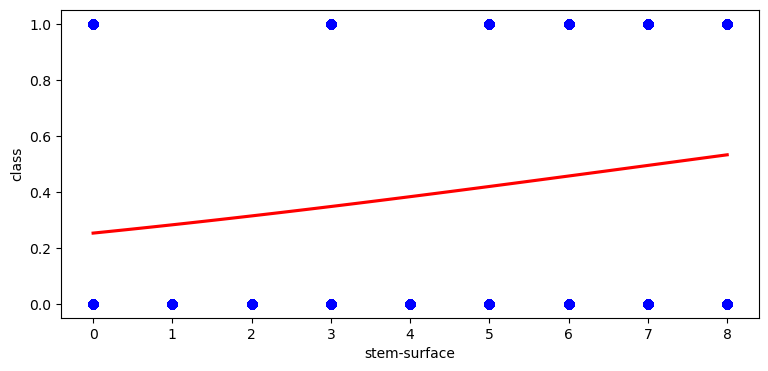

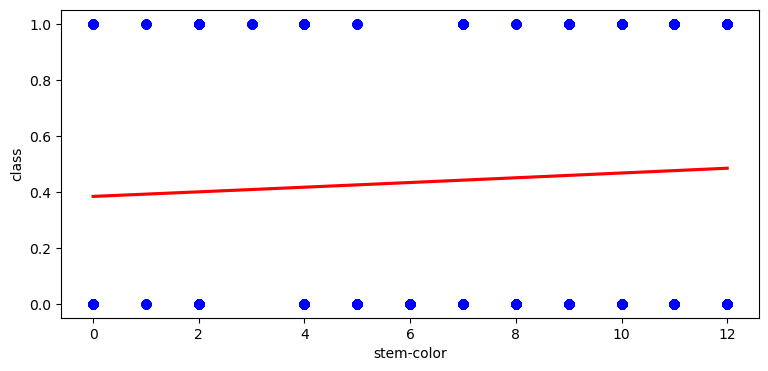

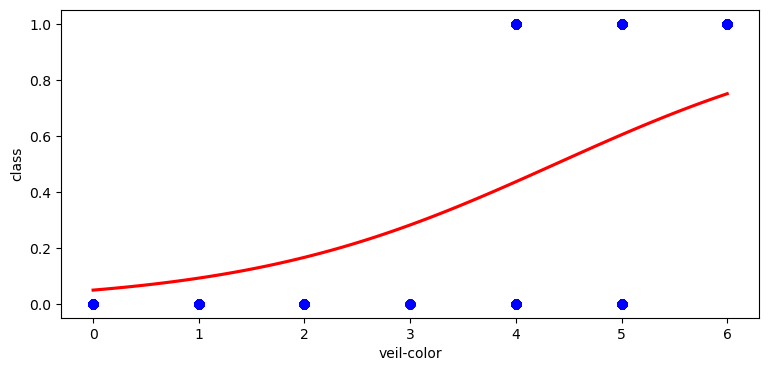

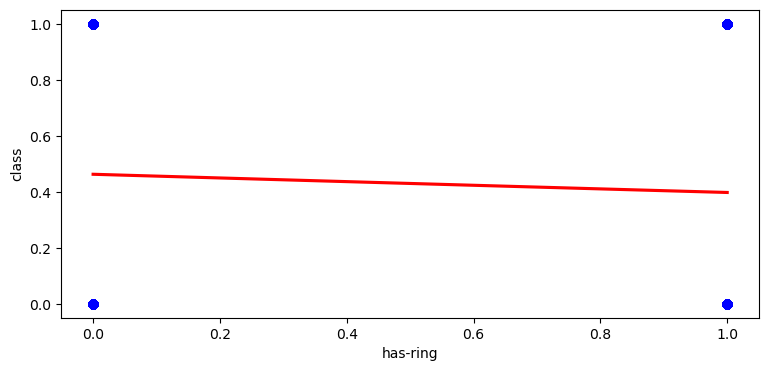

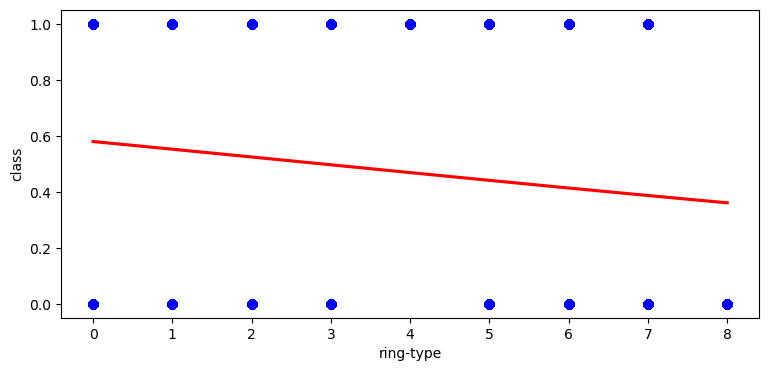

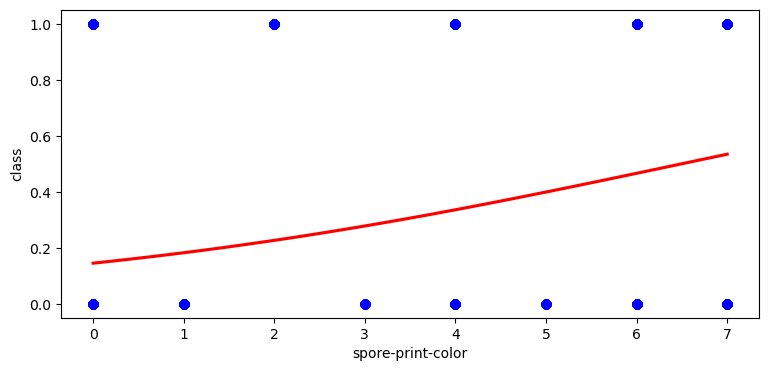

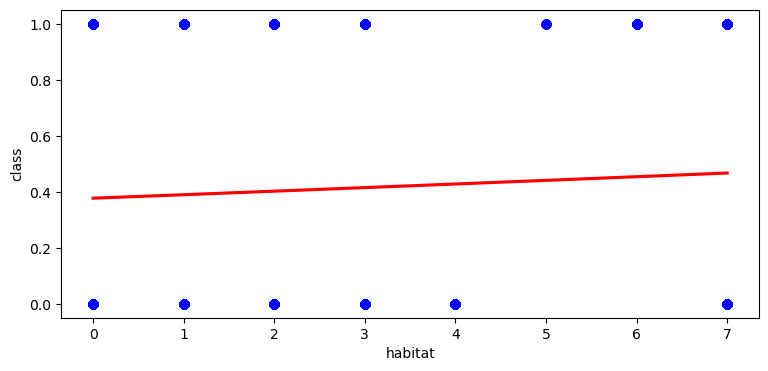

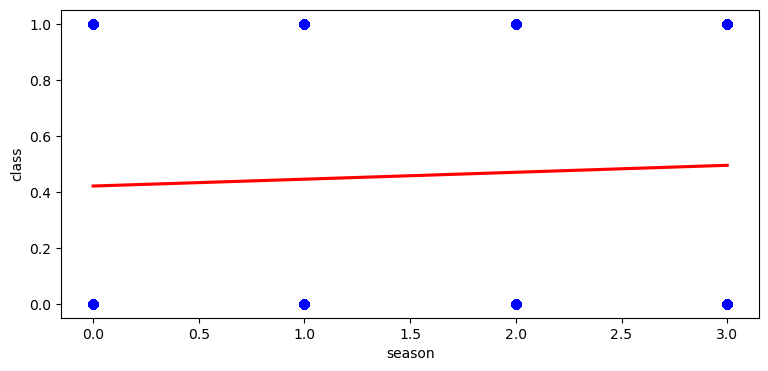

In [33]:
# Predict class of train set using train set of predictor varaibles using the Logistic Regression model
# Predict class corresponding to the predictors using the logistic model
edible_train_pred = logreg.predict(predictor_train)


# Plot the logistic regression curve of the train data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve

for column in predictor_train:
    f = plt.figure(figsize=(9, 4))
    sb.regplot(data = predictor_train, x = column, y = edible_train, logistic = True, ci = None,
          scatter_kws = {'color':'blue'}, line_kws={'color':'red'})



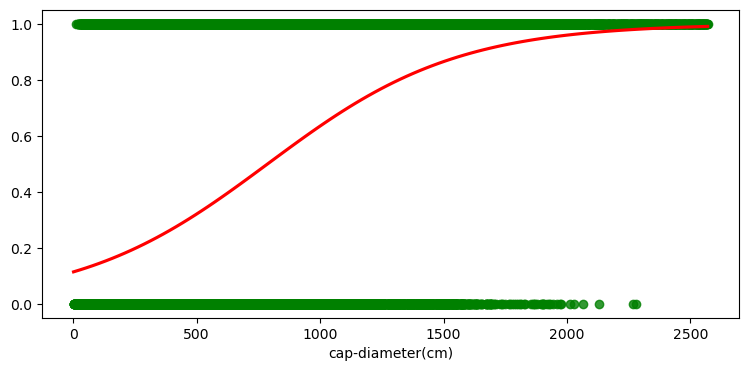

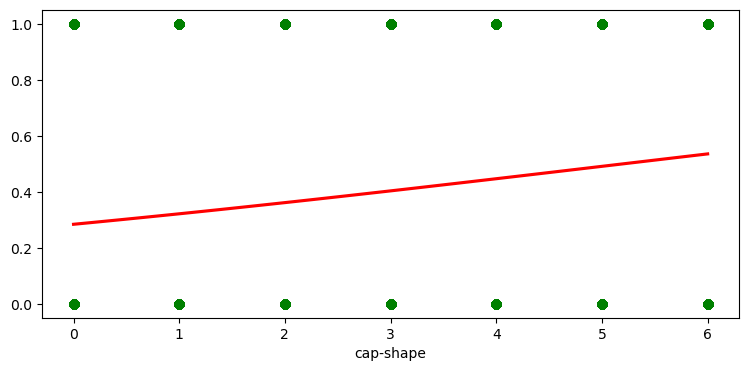

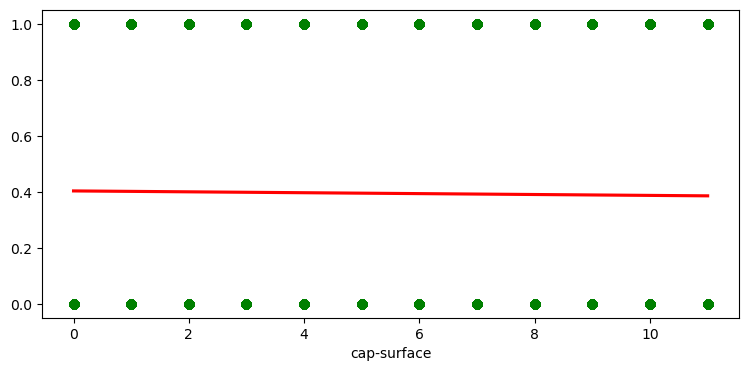

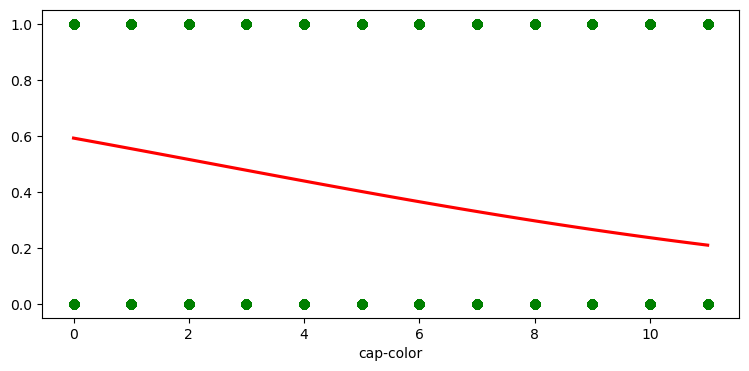

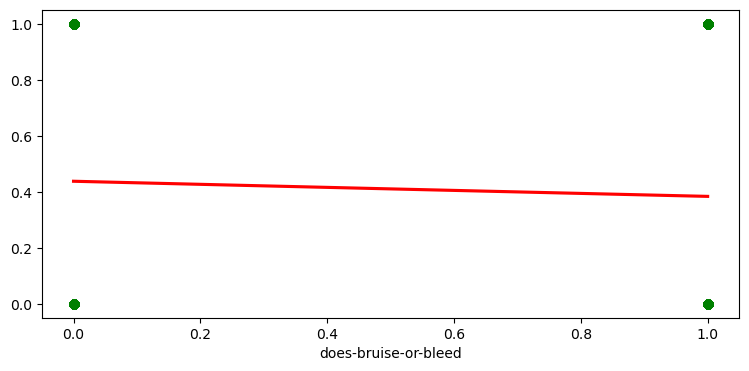

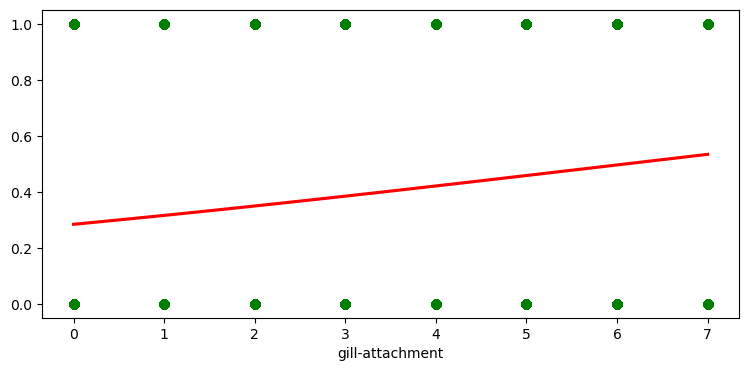

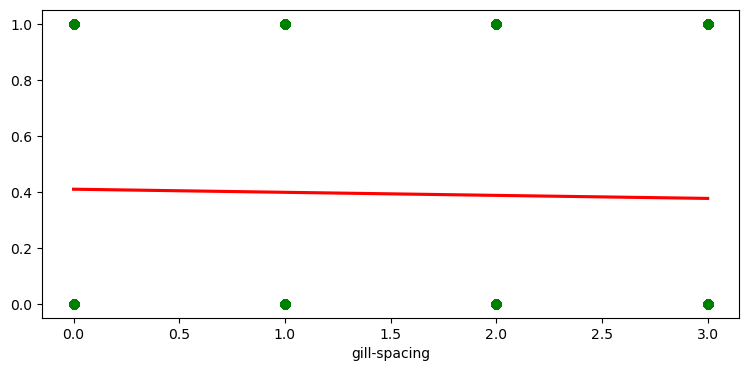

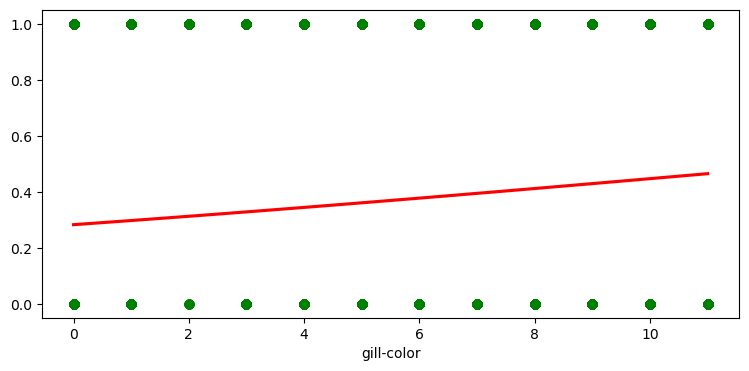

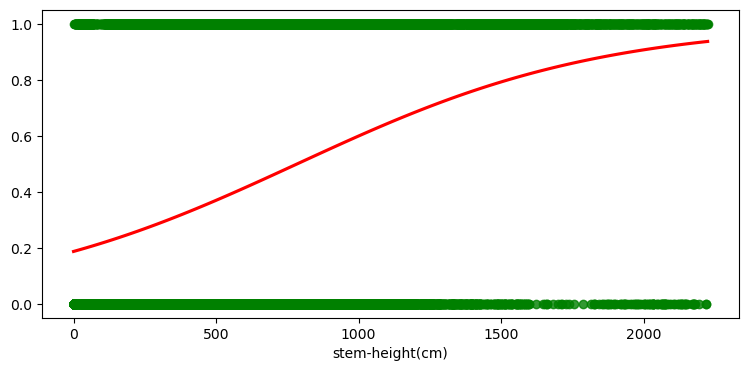

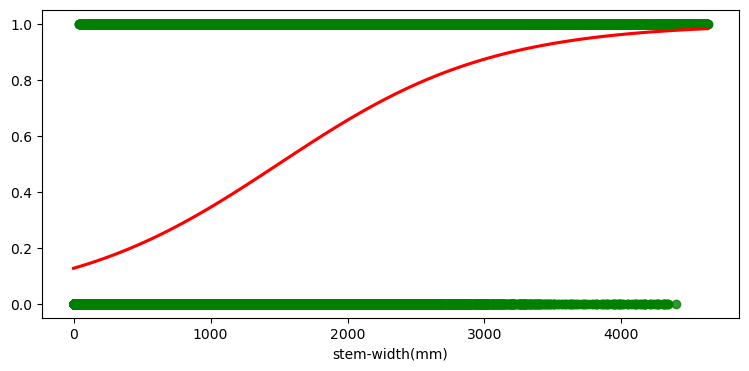

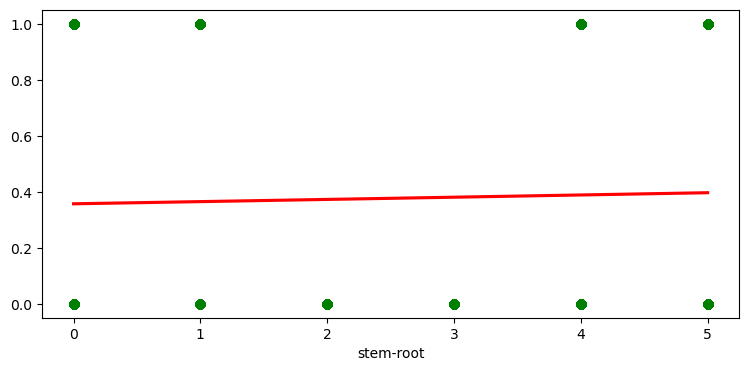

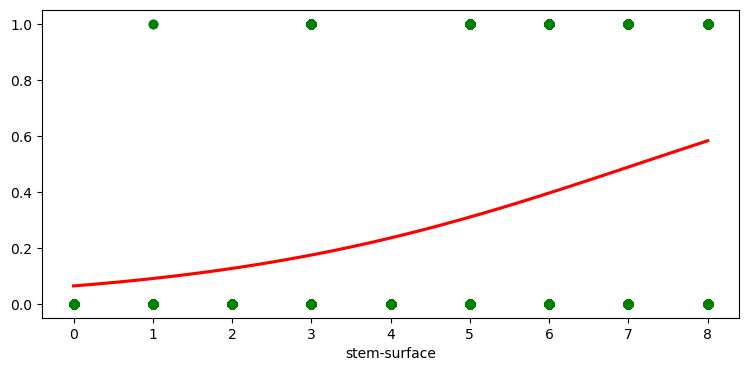

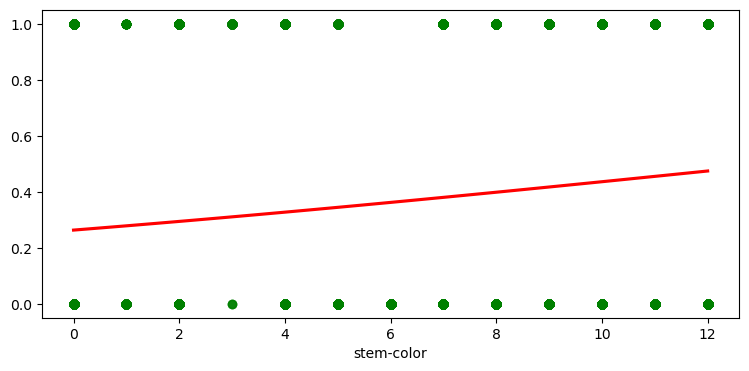

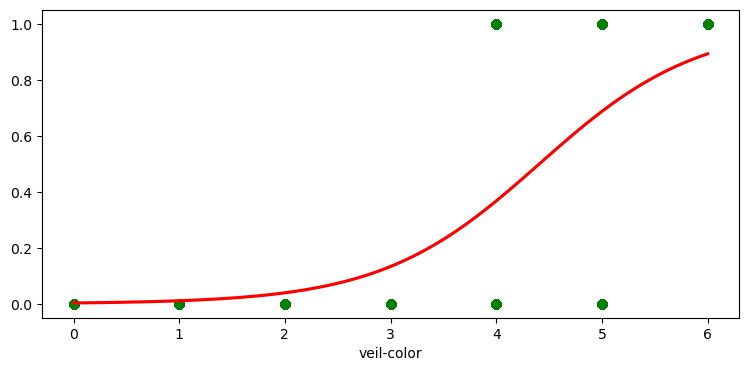

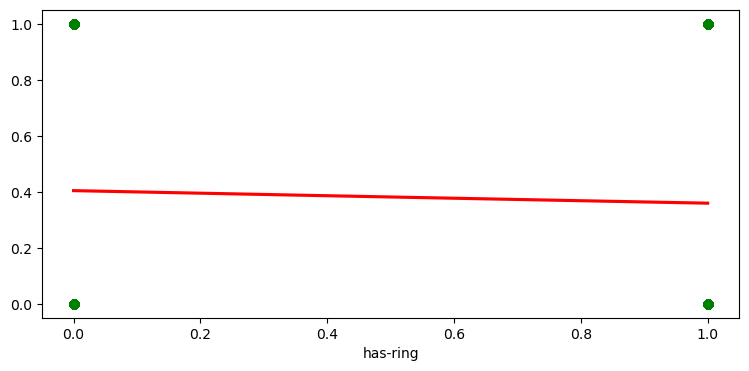

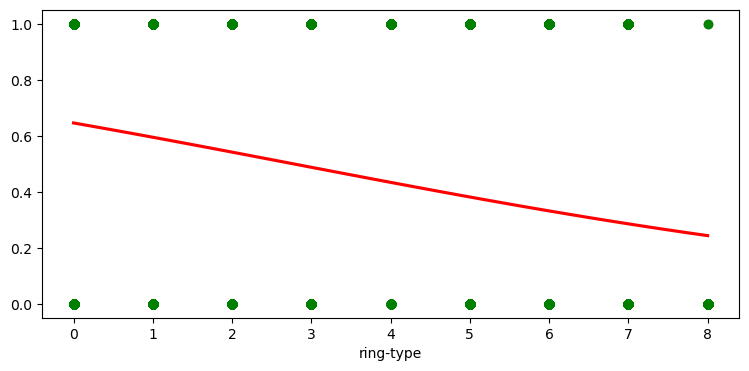

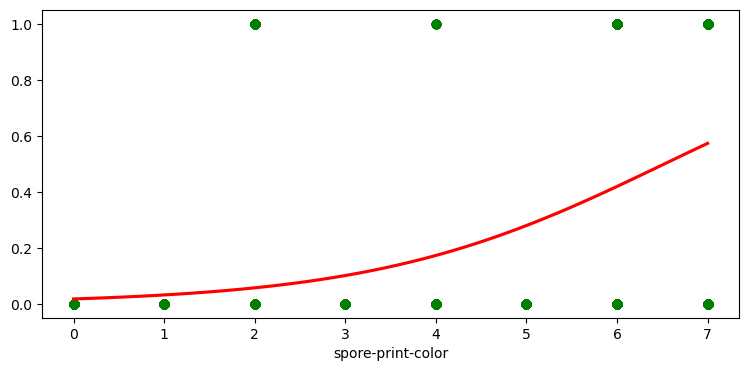

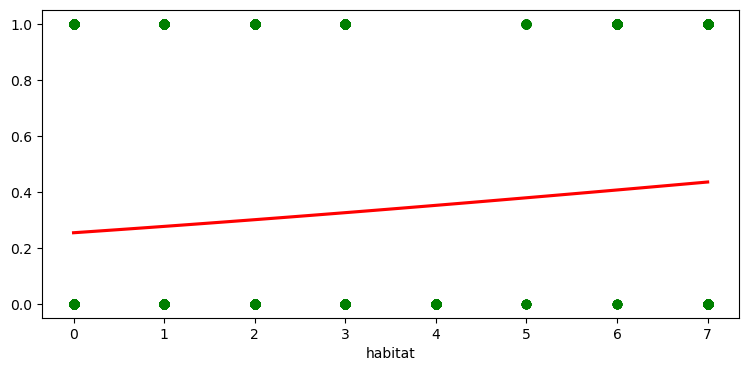

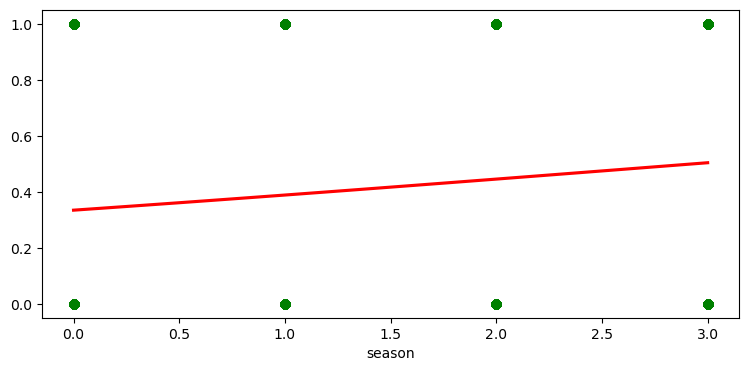

In [34]:
# Plot the logistic regression curve of the predicted edible train set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_train:
    f = plt.figure(figsize=(9, 4))
    sb.regplot(data = predictor_train, x = column, y = edible_train_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'})

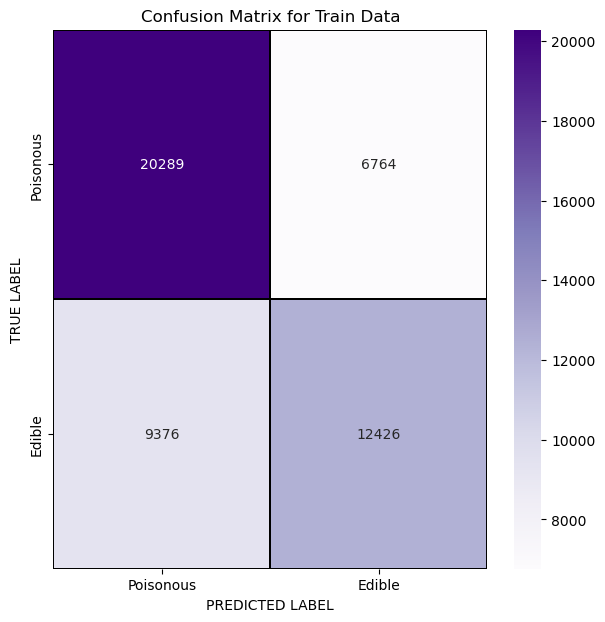

Accuracy : 0.6696346330979429
              precision    recall  f1-score   support

           0       0.68      0.75      0.72     27053
           1       0.65      0.57      0.61     21802

    accuracy                           0.67     48855
   macro avg       0.67      0.66      0.66     48855
weighted avg       0.67      0.67      0.67     48855



In [35]:
# Print the confusion matrix of the train data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

cm2train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm2train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

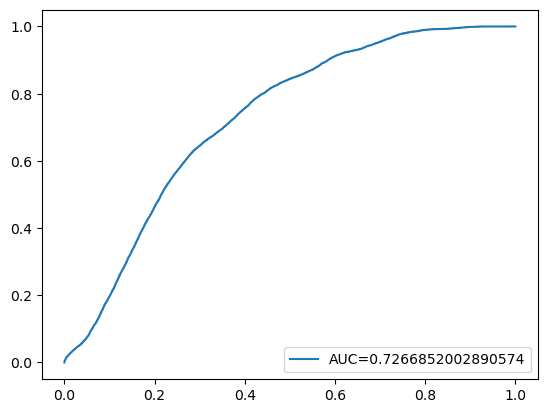

In [36]:
# Define metrics
edible_train_pred_proba = logreg.predict_proba(predictor_train)[::,1]
fpr, tpr, _ = roc_curve(edible_train, edible_train_pred_proba)
auc = roc_auc_score(edible_train, edible_train_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### The Test Set

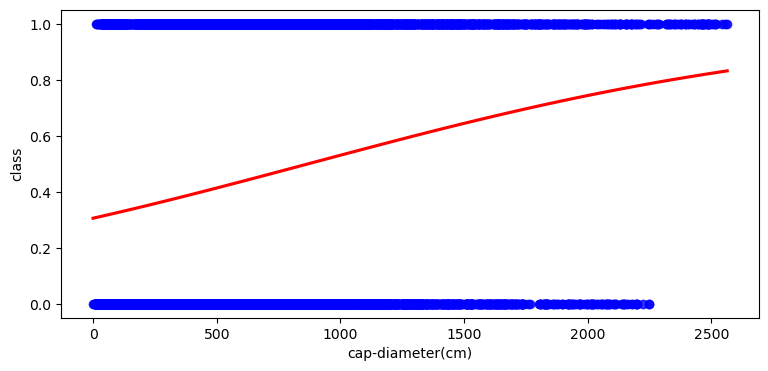

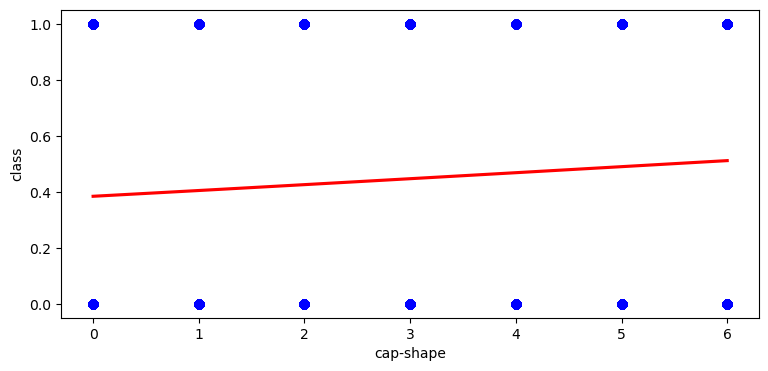

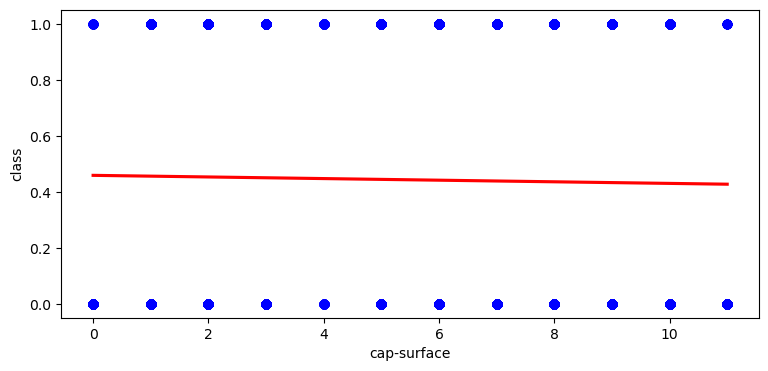

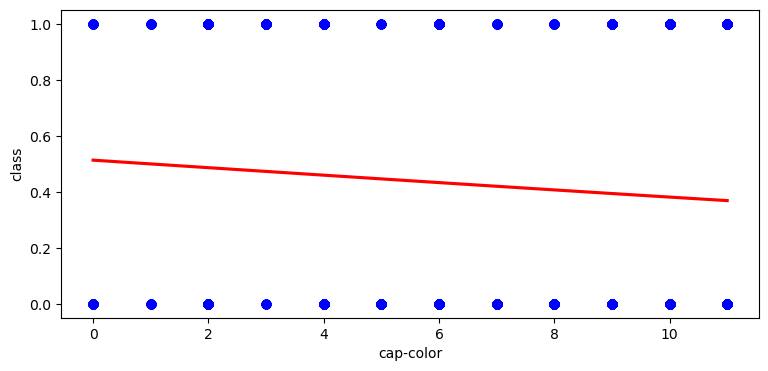

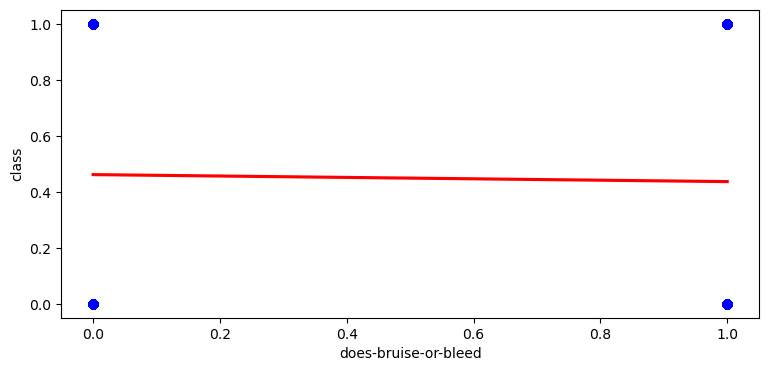

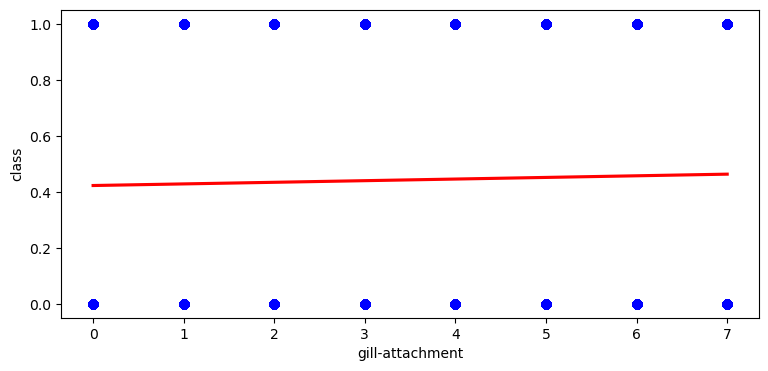

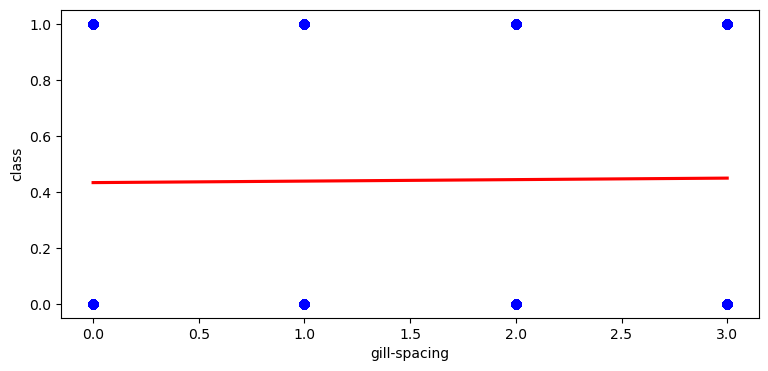

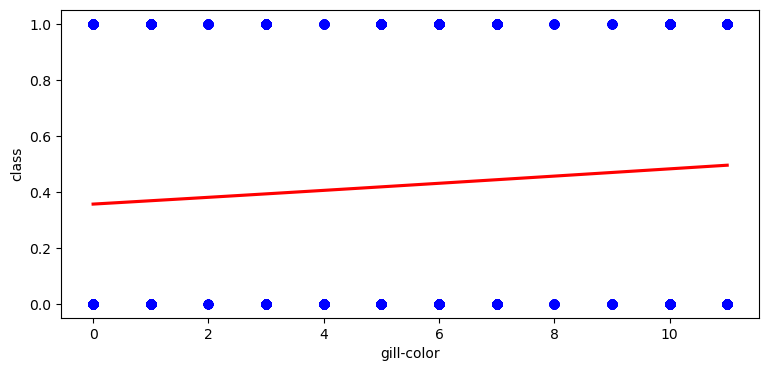

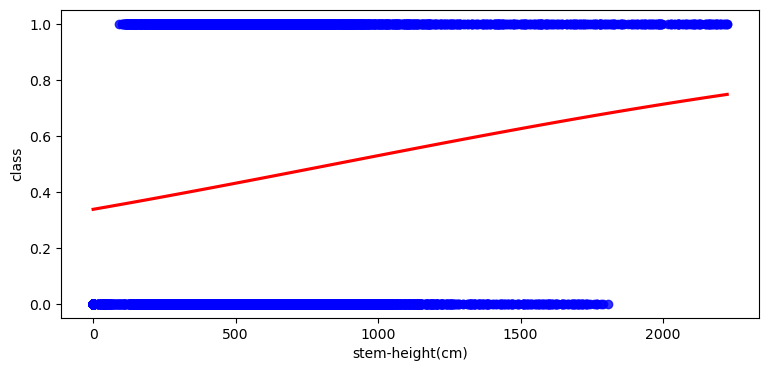

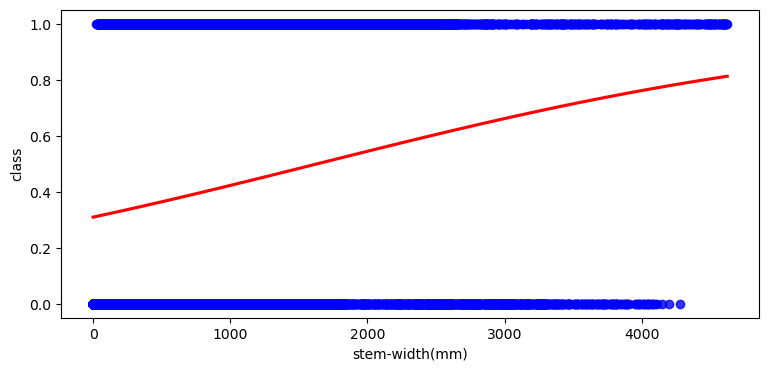

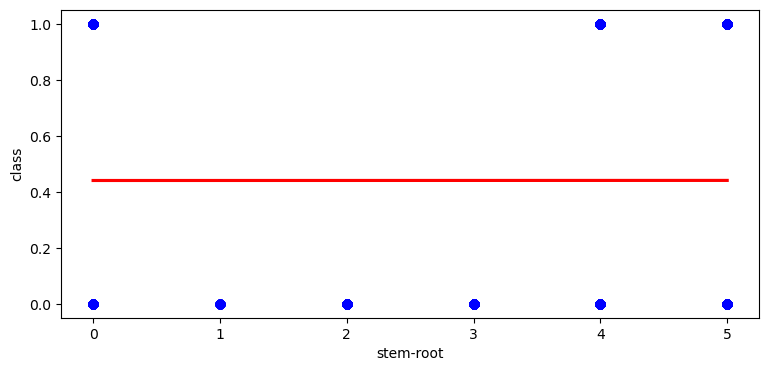

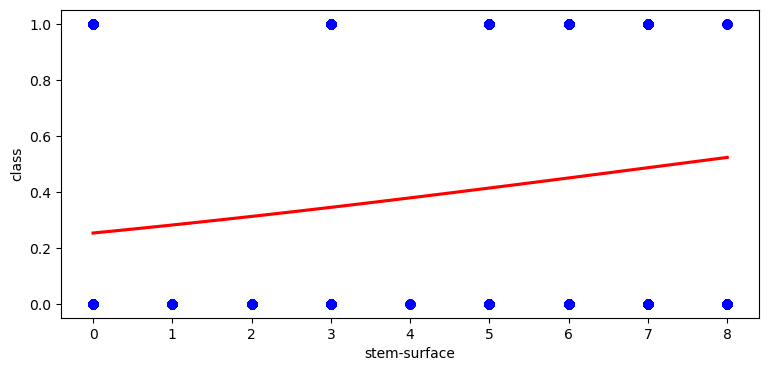

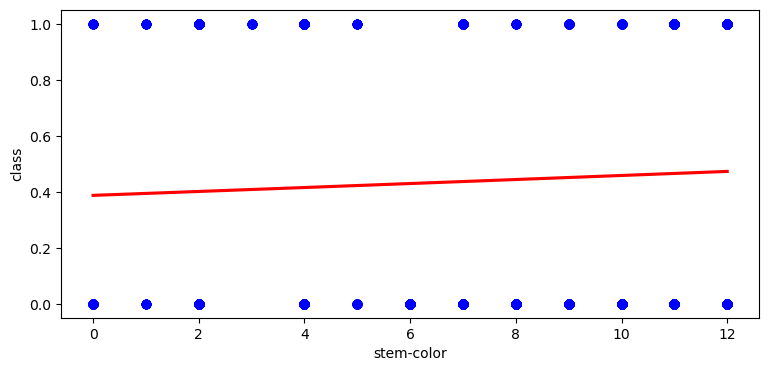

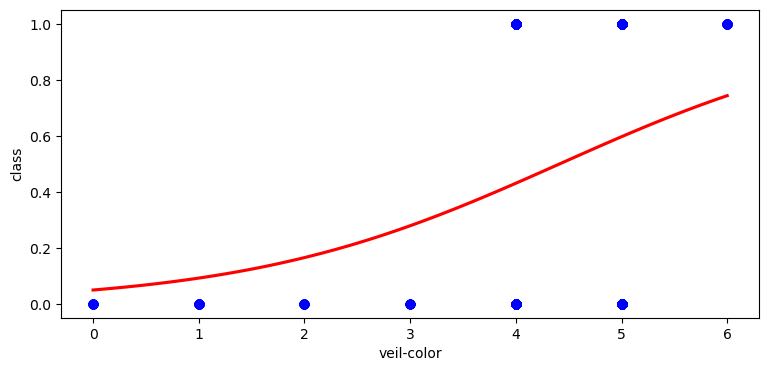

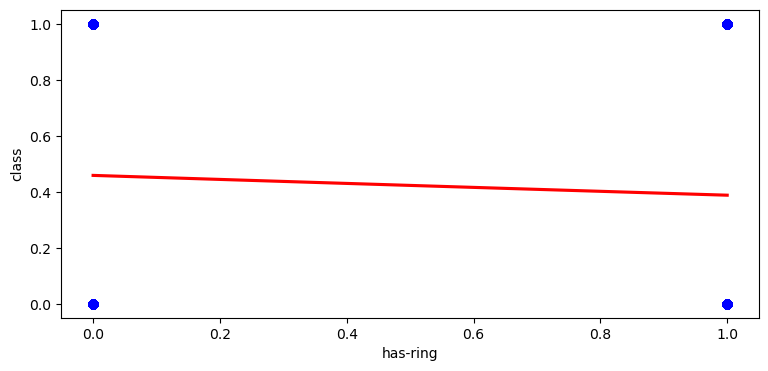

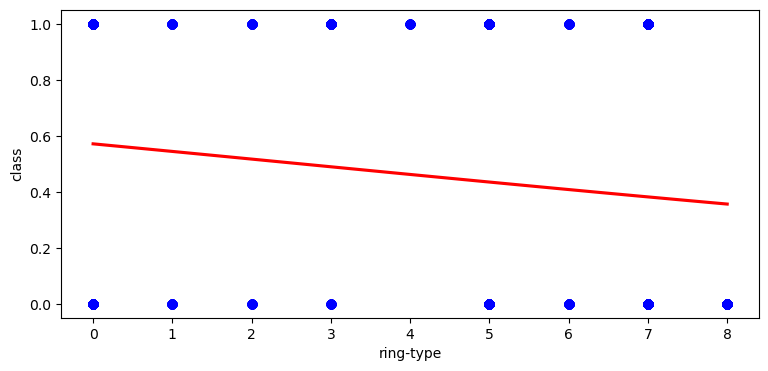

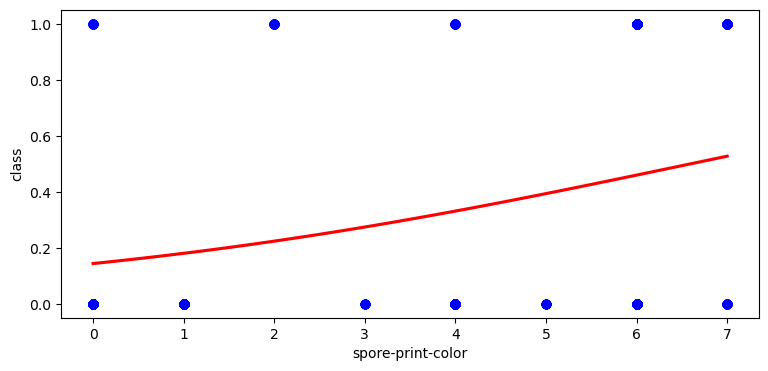

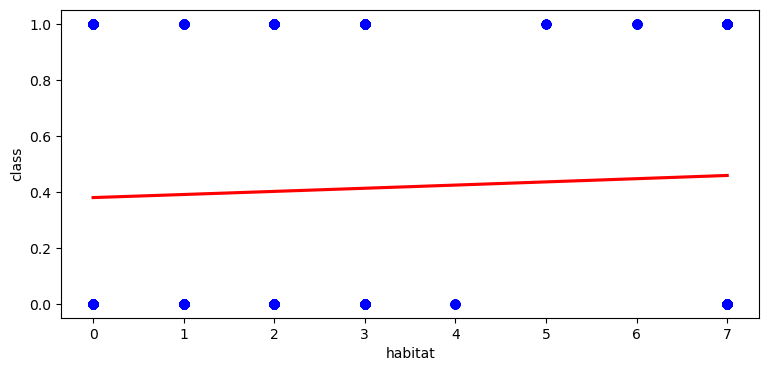

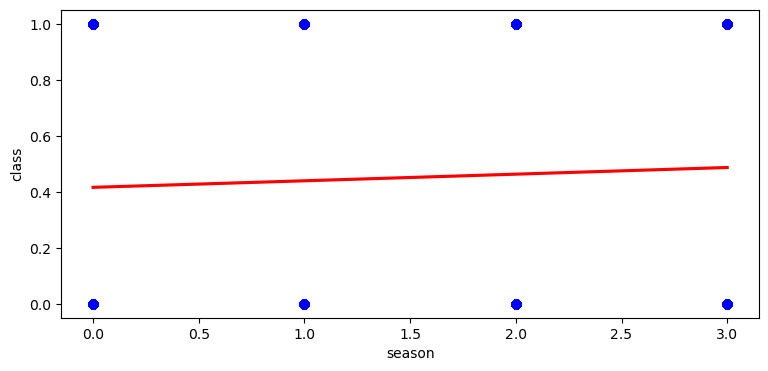

In [37]:
# Predict class of test set using test set of the predictor variables using the Linear Regression model
# Predict class corresponding to the predictors using the logistic model
edible_test_pred = logreg.predict(predictor_test)

# Plot the logistic regression curve of the test data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_test:
    f = plt.figure(figsize=(9,4))
    sb.regplot(data = predictor_test, x = column, y = edible_test, logistic = True, ci = None,
          scatter_kws = {'color':'blue'}, line_kws={'color':'red'})

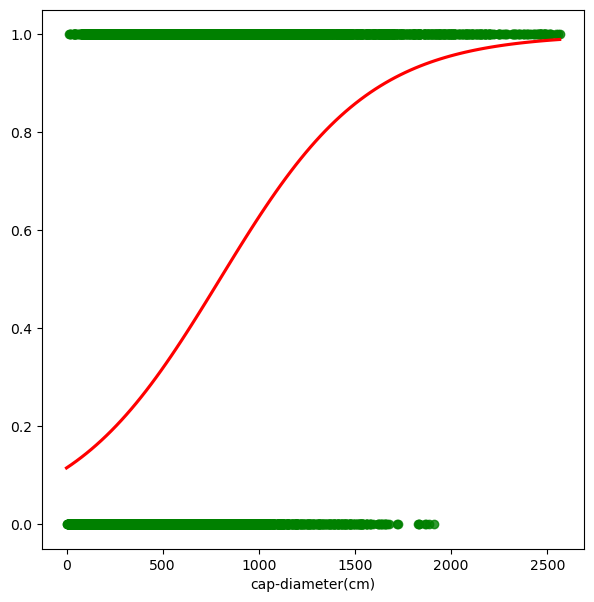

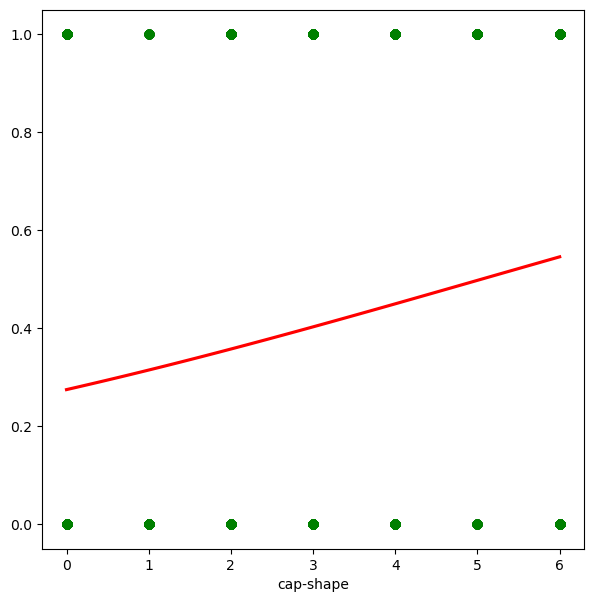

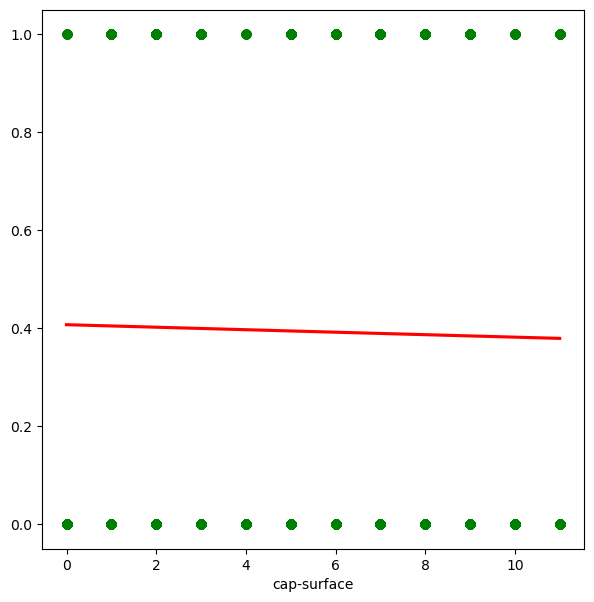

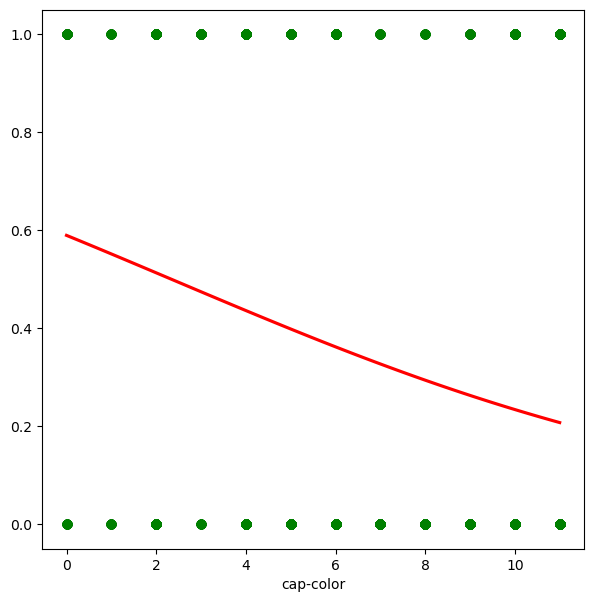

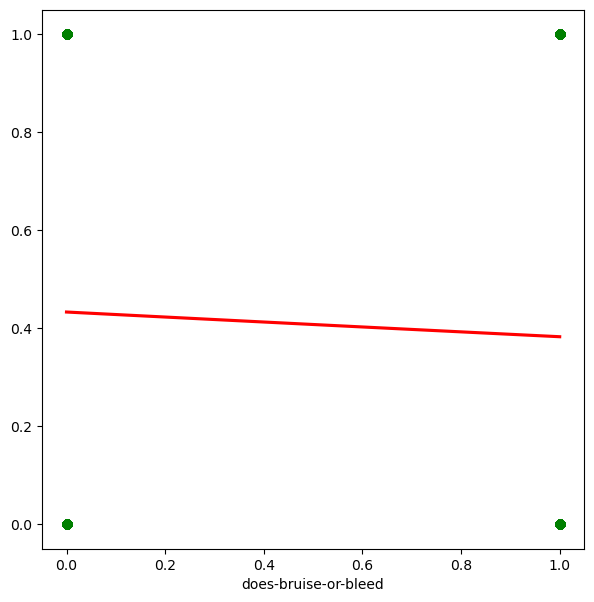

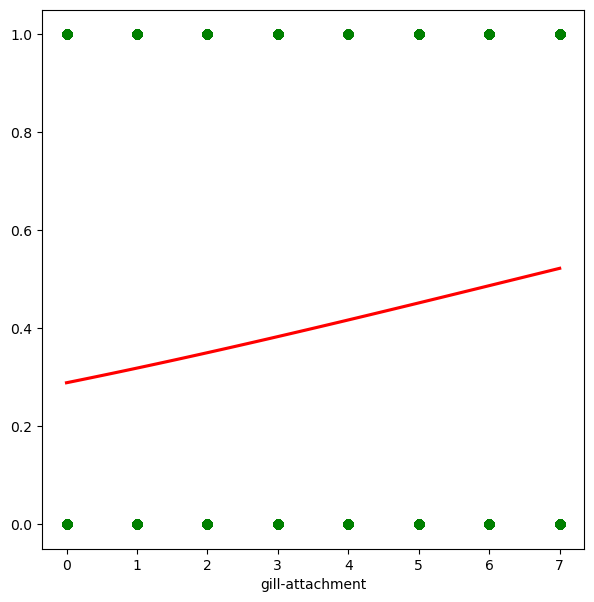

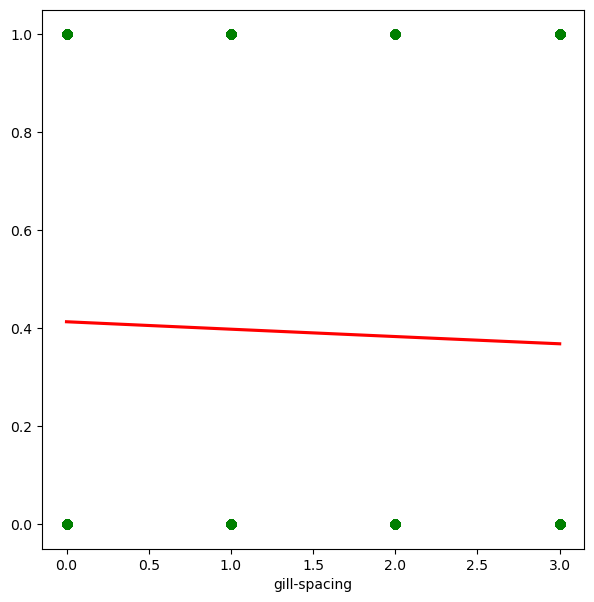

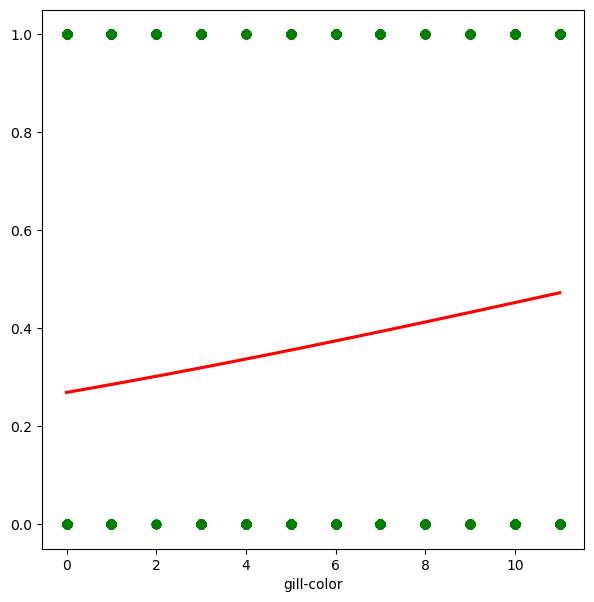

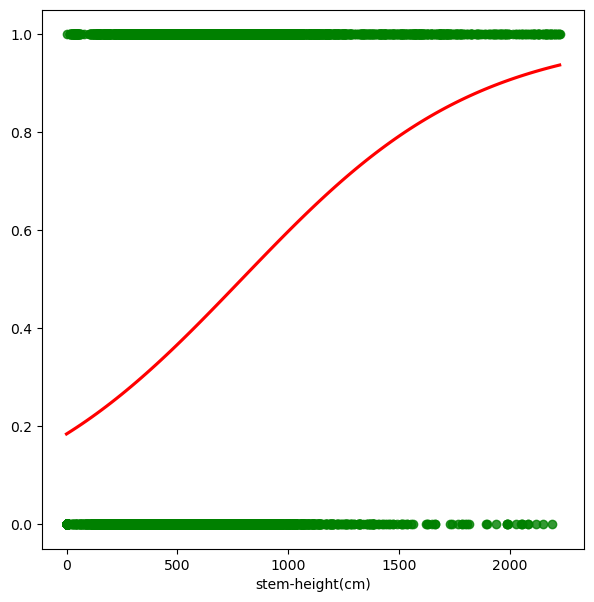

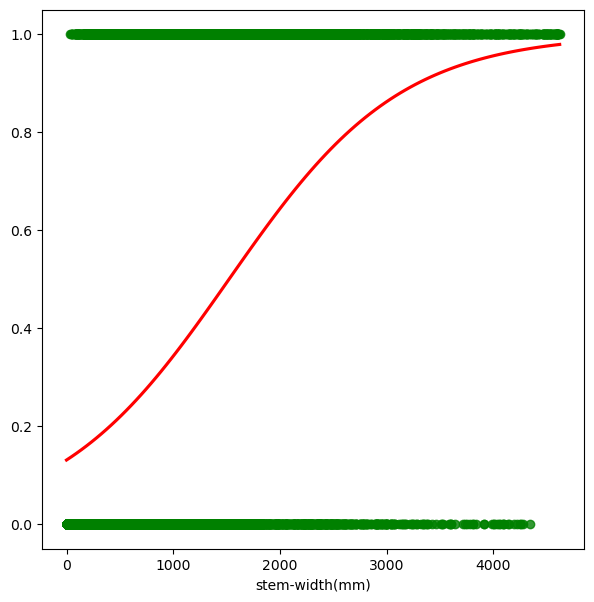

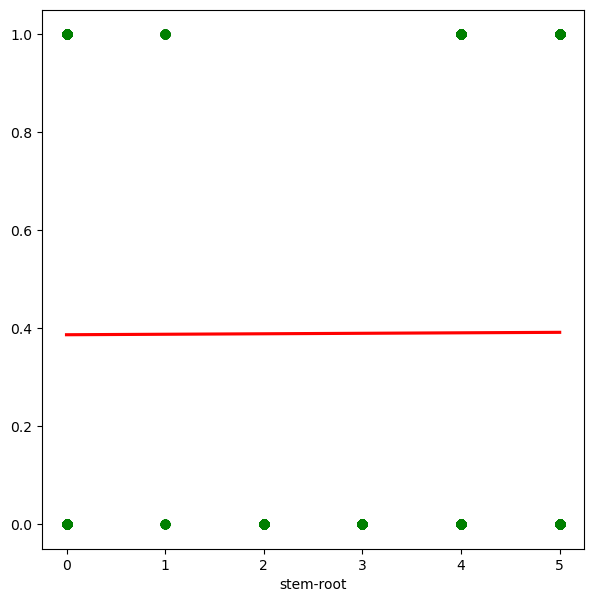

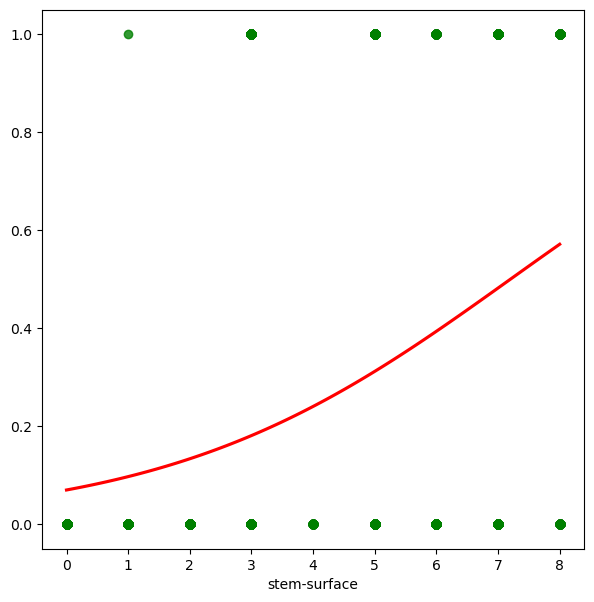

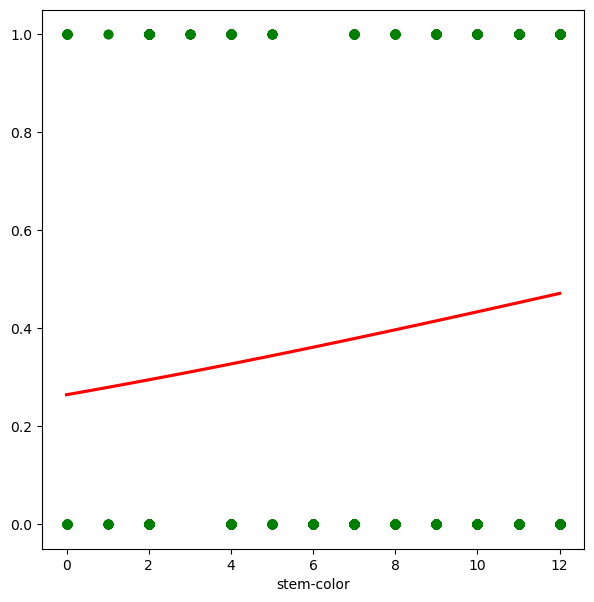

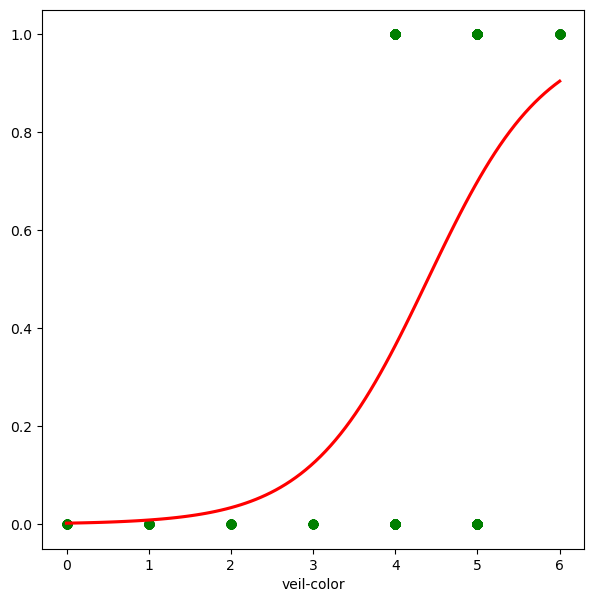

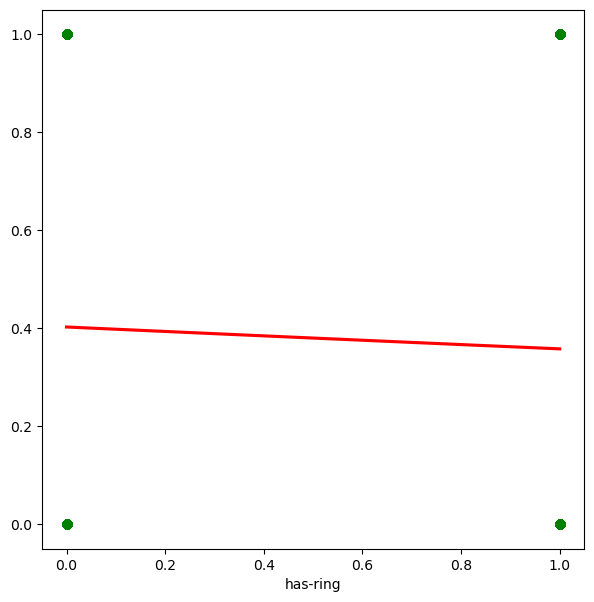

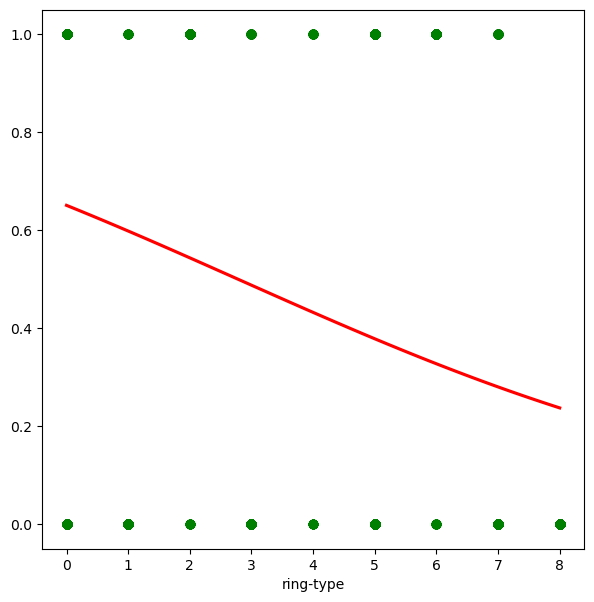

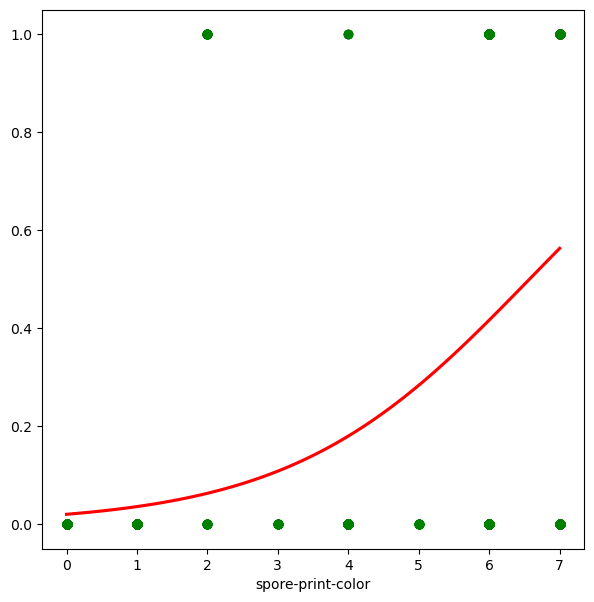

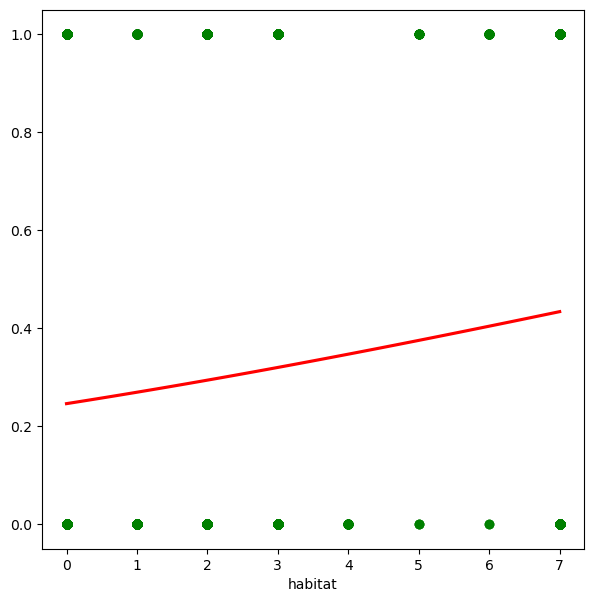

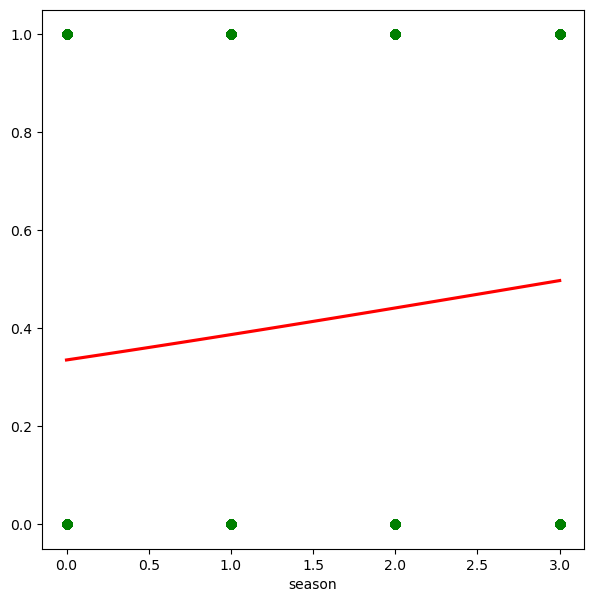

In [38]:
# Plot the logistic regression curve predicted edible test set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_test:
    f = plt.figure(figsize=(7,7))
    sb.regplot(data = predictor_test, x = column, y = edible_test_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'})

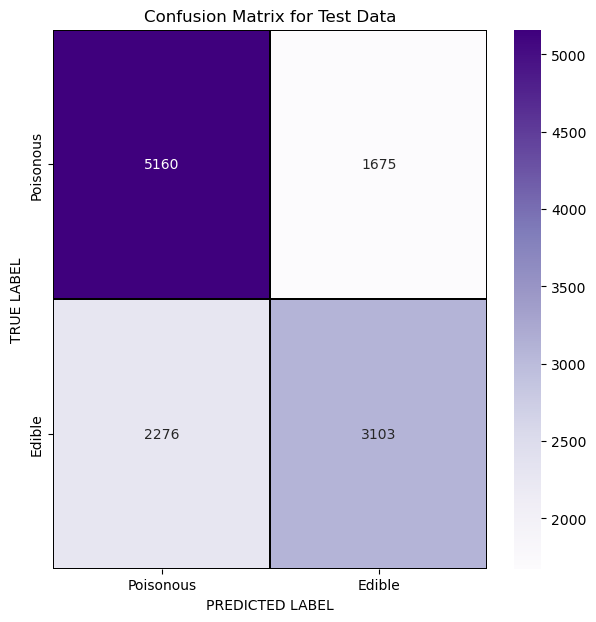

Accuracy : 0.677
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6835
           1       0.65      0.58      0.61      5379

    accuracy                           0.68     12214
   macro avg       0.67      0.67      0.67     12214
weighted avg       0.67      0.68      0.67     12214



In [39]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

cm2test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm2test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", round(accuracy_score(edible_test, edible_test_pred), 3))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

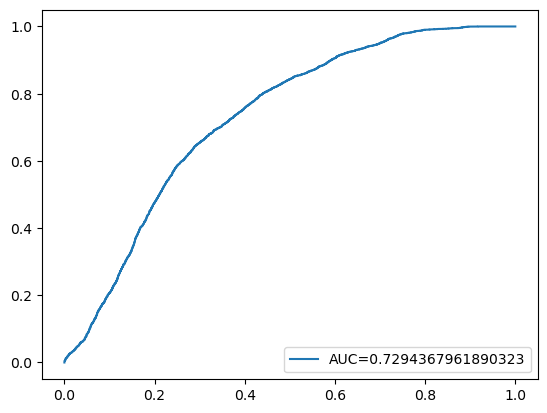

In [40]:
# Define metrics
edible_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
fpr, tpr, _ = roc_curve(edible_test, edible_test_pred_proba)
auc = roc_auc_score(edible_test, edible_test_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

The accuracy score of the train data set tells us that the logistic regression model made the correct predictions on whether the mushroom is edible or not 63.3% of the time.

The accuracy score of the test data set tells us that the logistic regression model made the correct predictions on whether the mushroom is edible or not 63.6% of the time.

The classification report shows us an overview of the various metrics which we can use to assess our model.

We will plot the Receiver Operating Characteristic (ROC) curve for both the train and test sets to display the percentage of the true positives predicted by the model. The higher the area under the curve (AUC), the more accurately our model is able to predict the edibility of the mushroom.

## MODEL 3 : DECISION TREE



### The Train Set

Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

DECISION TREE MAX DEPTH :  16


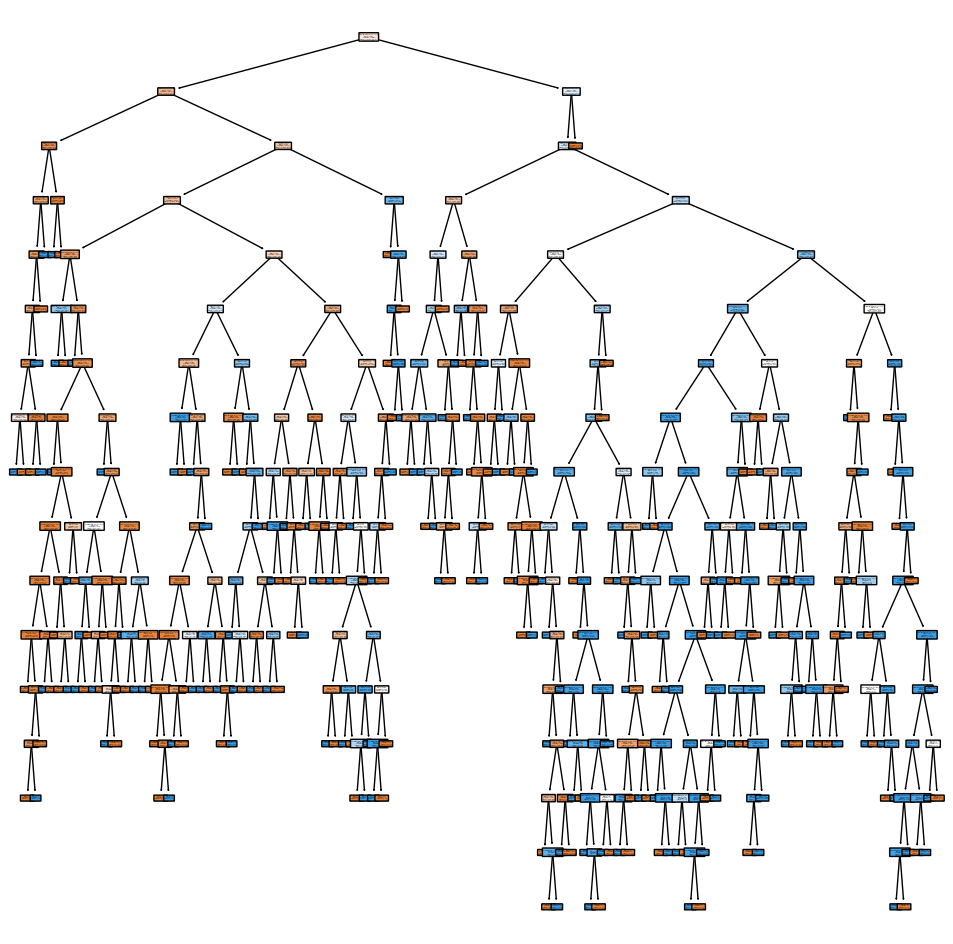

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Assign Response and Predictors
predictor = mushroom_predictors 
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Decision Tree using Train Data
# For now we will not assign a value of depth! As we want to find out the maximum depth level for 100% accuracy for TRAINING set
# We will later find the optimal value for depth such that it does not cause OVERFITTING.

dectree = DecisionTreeClassifier(max_depth = None)  # create the decision tree object
dectree.fit(predictor_train, edible_train)        # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=predictor.columns, 
          class_names=["Poisonous","Edible"])

# Predict Response corresponding to Predictors
edible_train_pred = dectree.predict(predictor_train)
edible_test_pred = dectree.predict(predictor_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_train, edible_train))
print()

print("DECISION TREE MAX DEPTH : ", dectree.tree_.max_depth)

## OVERFITTING

From above we see the max tree depth for 100% acurracy on training data is 19

However, we cannot simply use a depth of 18 as it can lead to a very deep classification tree with many nodes. This often leads to overfitting on the training dataset, where the model is trained too well on the training data, resulting in poor performance on new or unseen data. The model would become too complex and start to memorize the training data rather than learning to generalize to new data.

This leads to a situation where the model is too tailored to the specific training data and cannot make accurate predictions on new data. 

#### To find best depth value, we , we utilise cross validation.

Since max depth = 19

We will use a range of (1,19) for depth and determine the best_depth_value.


In [42]:
best_depth_value = 0
best_score = 0

for i in range(1,18):
    dectree = DecisionTreeClassifier(max_depth = i)
    dectree.fit(predictor_train, edible_train)
    if dectree.score(predictor_test, edible_test) > best_score:
        best_score = dectree.score(predictor_train, edible_train)
        best_depth_value = i
        
print("Best Depth Value: {}".format(best_depth_value))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best Depth Value: 15
Test Accuracy: 99.96%


Best Depth value is 16, with a test accuracy of 99.97%.

### The Test Set

In [43]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_test, edible_test))
print()


Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9988537743572949



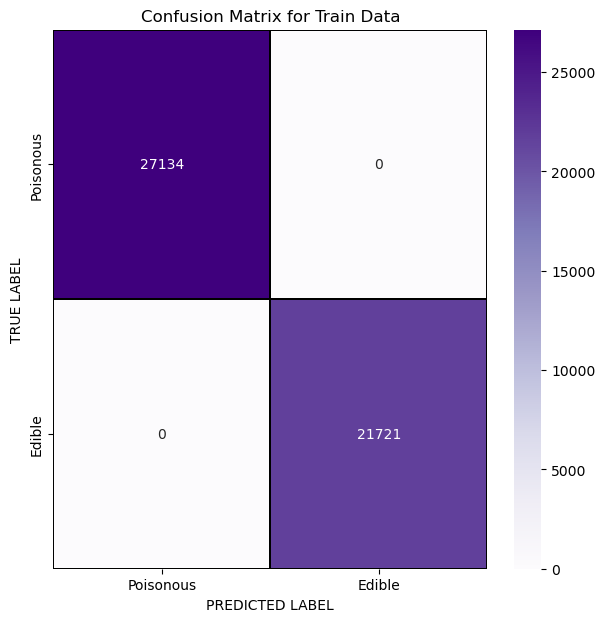

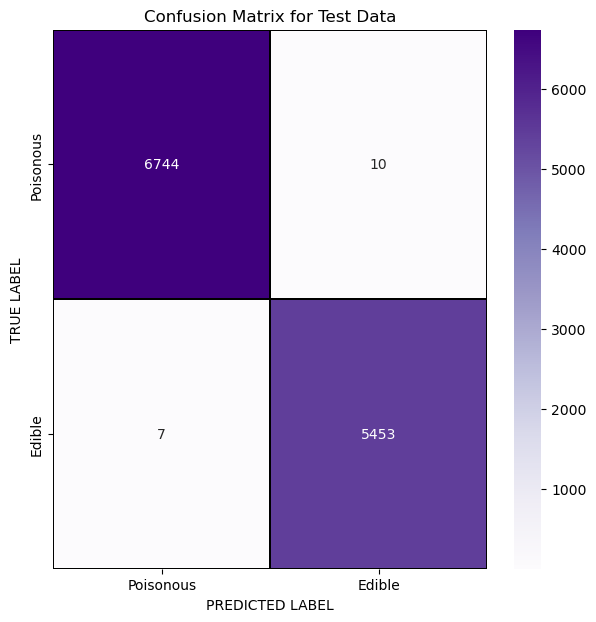

In [44]:
# Plot the Confusion Matrix for Train and Test

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

cm3train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm3train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

cm3test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm3test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Optimising our Machine Learning Algorithms


To improve our MLA Naïve Bayes Model and Logistic Regresion Model, we have decided to go through the process of Feature Selection.

We believe that because we have a large amount of predictors at 19, and because some nominal categories have no inherent relationship with the response variable class, they might not have predictive value and can introduce noise and reduce the accuracy of the model.

It may be reasonable to remove that category from the machine learning model

In Feature selection, we will identify and retain the most important features, while discarding the least important ones


### Ranking Feature Importance 

We will be getting the feature importance scores from the decision tree model since it currently performs the best.

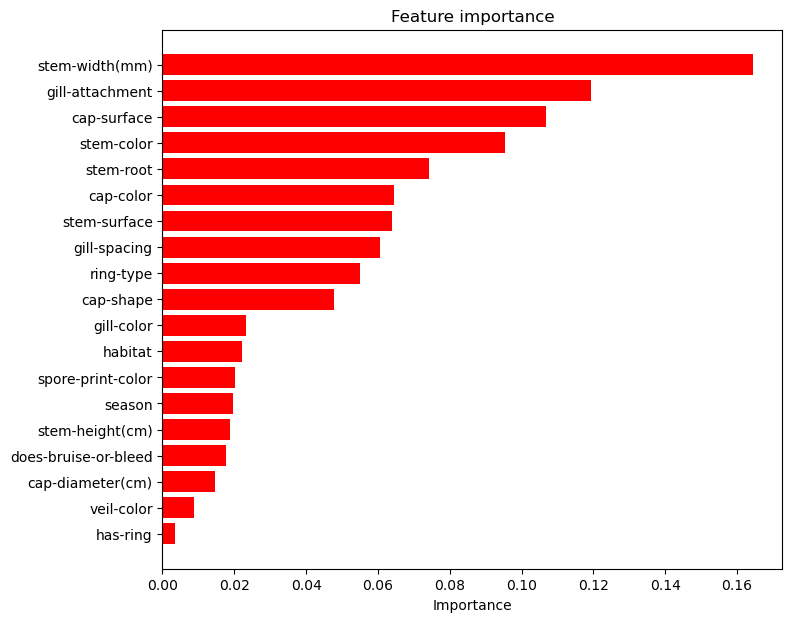

has-ring 0.0033926
veil-color 0.0087436
cap-diameter(cm) 0.0145623
does-bruise-or-bleed 0.0178244
stem-height(cm) 0.0189359
season 0.0195995
spore-print-color 0.0201538
habitat 0.0220128
gill-color 0.0232225
cap-shape 0.0478832
ring-type 0.0549036
gill-spacing 0.0604459
stem-surface 0.0638302
cap-color 0.064518
stem-root 0.0742032
stem-color 0.0953041
cap-surface 0.1066866
gill-attachment 0.1193692
stem-width(mm) 0.1644085
Average feature importance value:  0.0526316


In [45]:
features_list = mushroom_predictors.columns.values
feature_importance = dectree.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()


for idx in sorted_idx:
    print(features_list[idx], round(feature_importance[idx], 7))

feature_importance_avg = sum(feature_importance)/len(feature_importance)
print("Average feature importance value: ", round(feature_importance_avg,7))

From the ***Feature importance barchat***, we see that the features greater than the average Importance Value are :
1. stem-width(mm)
2. gill-attachment
3. cap-surface
4. stem-color
5. stem-root
6. cap-color
7. stem-height(cm)
8. stem-surface

Comparing it with the relatively highler correlated variables picked up from ***Cramer's V***:

1. stem-color(0.07)
2. stem-surface(0.07)
3. cap-color(0.06)
4. cap-surface(0.05)
5. gill-attachment(0.05)
6. stem-root(0.05) 

And the relatively highler correlated variables picked up from the ***Correlation Matrix***:
1. cap-surface (0.11)
2. does-bruise-or-bleed(-0.18)
3. gill-spacing (-0.81)
4. gill-color (0.098)
5. spore-print-color (0.13)
6. habitat(0.11)

Comparing these 3 correlation insights, we see that Cramer's V and the feature importance actually have many similar features that they picked up to be important. They picked up these 6 : 
1. stem-color
2. cap-color
3. cap-surface
4. gill-attachment
5. stem-root 
6. stem-surface

Whereas for those selected by the ***Correlation Matrix***, there was only cap-surface that it managed to pick out. 

This could perhaps show that ***Cramer's V*** and ***Feature Importance selection from decision tree*** are more reliable.

We will then only use those predictors selected by the two of them and use them in our models again.

We have a total of 8 selected predictors to use.
1. stem-width(mm)
2. gill-attachment
3. cap-surface
4. stem-color
5. stem-root
6. cap-color
7. stem-surface
8. stem-height(cm)


In [46]:
# Creating new data frame with only these 8 variables

refined_mushroom_predictors = pd.DataFrame()
refined_mushroom_predictors = mushroom_predictors.loc[:, ['stem-width(mm)', 'gill-attachment','cap-surface','stem-color','stem-root','cap-color','stem-surface','stem-height(cm)']]
refined_mushroom_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   stem-width(mm)   61069 non-null  int64
 1   gill-attachment  61069 non-null  int32
 2   cap-surface      61069 non-null  int32
 3   stem-color       61069 non-null  int32
 4   stem-root        61069 non-null  int32
 5   cap-color        61069 non-null  int32
 6   stem-surface     61069 non-null  int32
 7   stem-height(cm)  61069 non-null  int64
dtypes: int32(6), int64(2)
memory usage: 2.3 MB


# Naïve Bayes Classifier (Attempt 2)

In [47]:
# Extract the variables and the associated data as a dataframe

predictor = refined_mushroom_predictors
edible = pd.DataFrame(mushroom_cat['class'])


# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Here we use Gaussian Naive Bayes, which implements the Gaussian Naive Bayes algorithm for classification.
# We import the GaussianNB package from the sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# We fit the model with the defined Train data
nb.fit(predictor_train, edible_train.values.ravel())


Train Set : (48855, 1) (48855, 8)
Test Set  : (12214, 1) (12214, 8)


GaussianNB()

### The Train Set


Accuracy:  0.6264456043393716
Naive Bayes Classification report for Train data (actual vs predicted): 

               precision    recall  f1-score   support

      Edible       0.60      0.48      0.53     21791
   Poisonous       0.64      0.74      0.69     27064

    accuracy                           0.63     48855
   macro avg       0.62      0.61      0.61     48855
weighted avg       0.62      0.63      0.62     48855



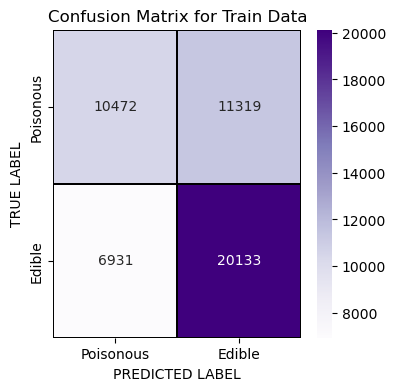

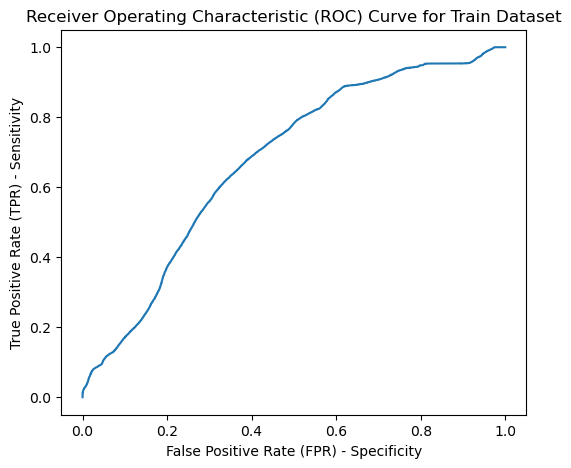

AUC: 0.6764963


In [48]:
 # First make predictions on the train set
edible_train_pred = nb.predict(predictor_train)

# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_train, edible_train_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naive Bayes Classification report for Train data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1train = confusion_matrix(edible_train, edible_train_pred)

x_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1
y_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Calculating the AUC of the Train dataset
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_train)
edible_train_prob = predicted_prob[:, 0]
fpr, tpr, thresholds = roc_curve(edible_train, edible_train_prob, pos_label='Edible')

fig = plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Dataset')
plt.show()

# here we assign the predicted probabilities of the train set into y_true
y_true = edible_train == 'Edible'
y_true = (edible_train == 'Edible').astype(int)
auc = roc_auc_score(y_true, edible_train_prob)
print("AUC: {:.7f}".format(auc))



### The Test Set


Accuracy:  0.6253479613558212
KNN Classification report for Test data (actual vs predicted): 

               precision    recall  f1-score   support

      Edible       0.60      0.48      0.53     21791
   Poisonous       0.64      0.74      0.69     27064

    accuracy                           0.63     48855
   macro avg       0.62      0.61      0.61     48855
weighted avg       0.62      0.63      0.62     48855



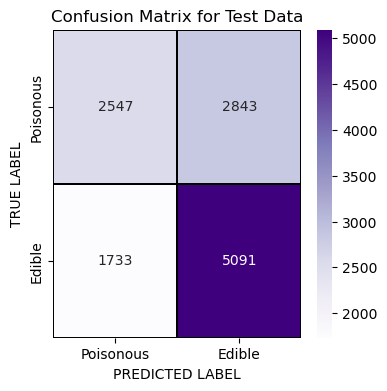

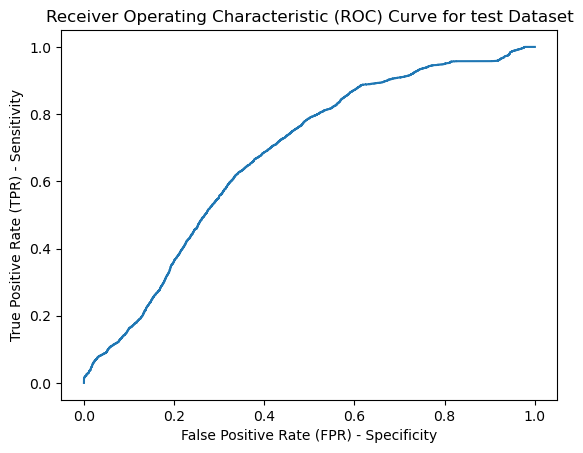

AUC: 0.6757169


In [49]:
# After making predictions on the train set, we make predictions on the test set
edible_test_pred = nb.predict(predictor_test)

# Evaluate the model again by checking the accuracy of the predicted test data against the actual test data
accuracy = accuracy_score(edible_test, edible_test_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("KNN Classification report for Test data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1test = confusion_matrix(edible_test, edible_test_pred)

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Predict the probabilities of edible class for the test data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_test)
edible_test_prob = predicted_prob[:, 0]
fpr, tpr, thresholds = roc_curve(edible_test, edible_test_prob, pos_label='Edible')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()

 # Calculating the AUC of the Test dataset

from sklearn.metrics import roc_auc_score

y_true = edible_test == 'Edible'
y_true = (edible_test == 'Edible').astype(int)
auc = roc_auc_score(y_true, edible_test_prob)
print("AUC: {:.7f}".format(auc))


# Logistic Regression (Attempt 2)


In [50]:
predictor = refined_mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Create the Logistic Regression object with the maximum iteration of 61069 which is the total number of rows
logreg = LogisticRegression(max_iter = 61069)

# Fit the Logistic Regression model using the train dataset
logreg.fit(predictor_train, edible_train.values.ravel())

# Coefficients of the Logistic Regression
print('Intercept \t: ', logreg.intercept_)
print('Coefficients \t:', logreg.coef_)



Train Set : (48855,) (48855, 8)
Test Set  : (12214,) (12214, 8)
Intercept 	:  [-1.61419703]
Coefficients 	: [[ 0.00039984 -0.00390589 -0.01276093  0.03892643  0.04296456 -0.07446676
   0.13685277  0.00027278]]


### The Train Set

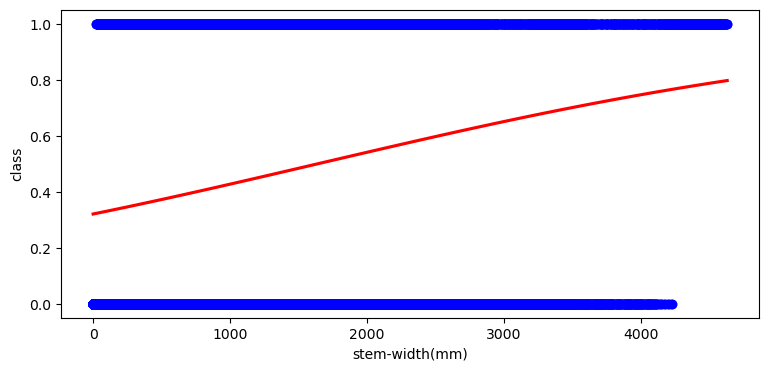

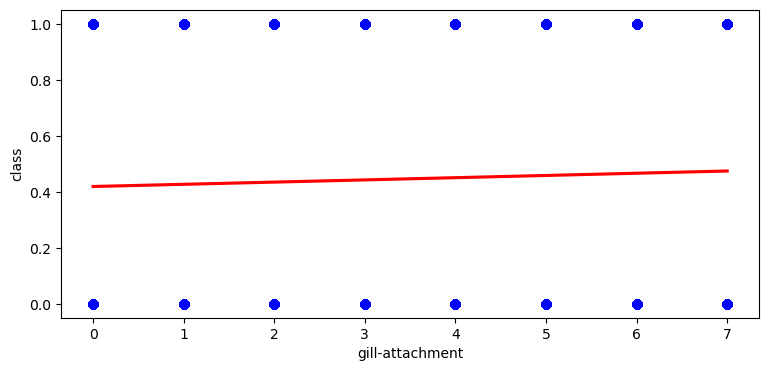

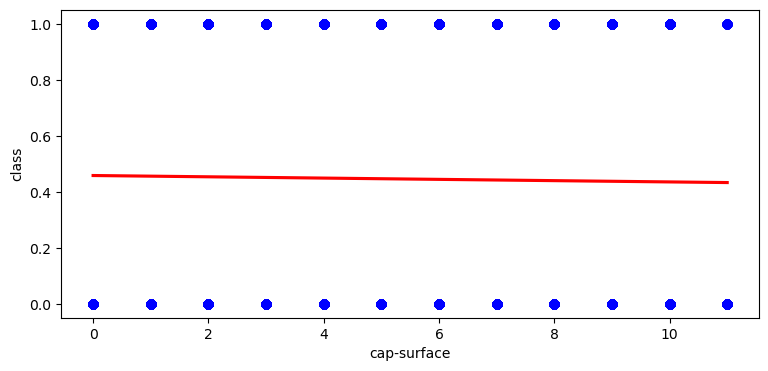

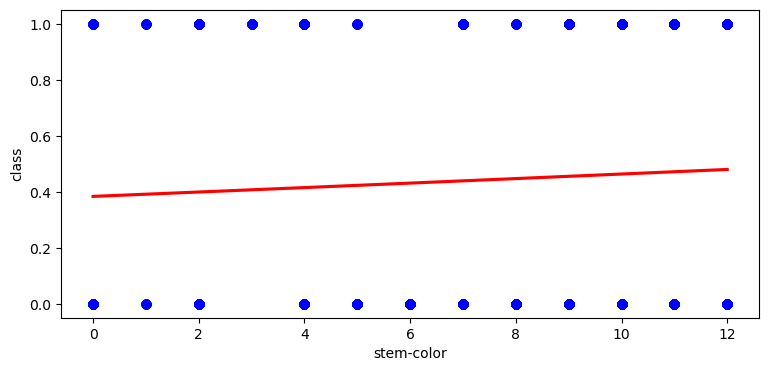

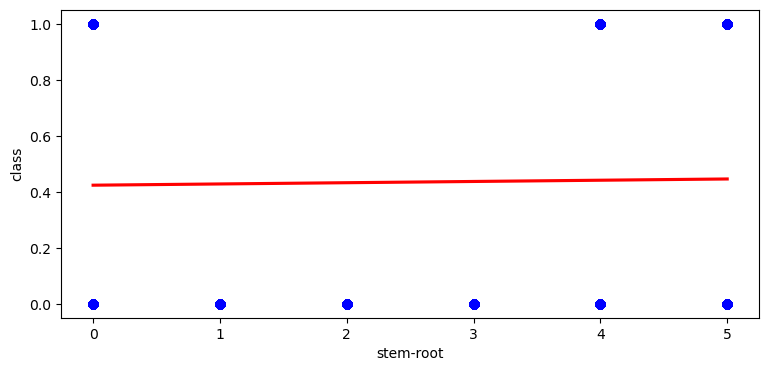

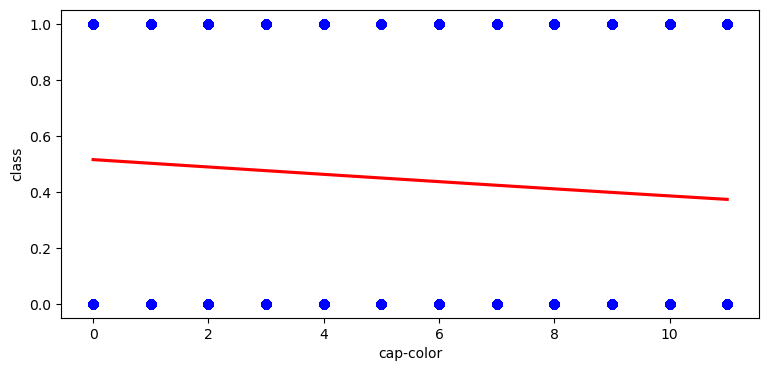

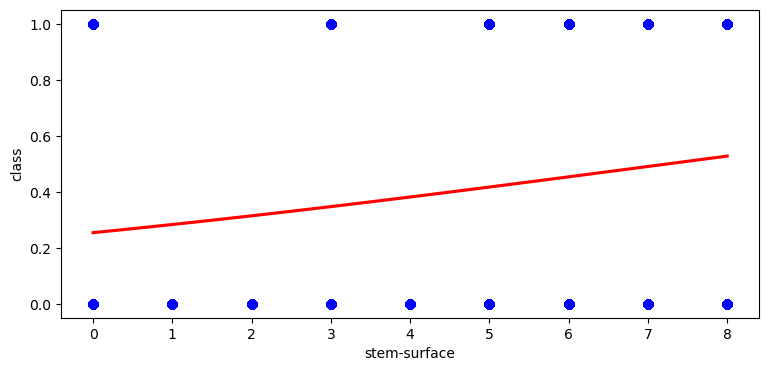

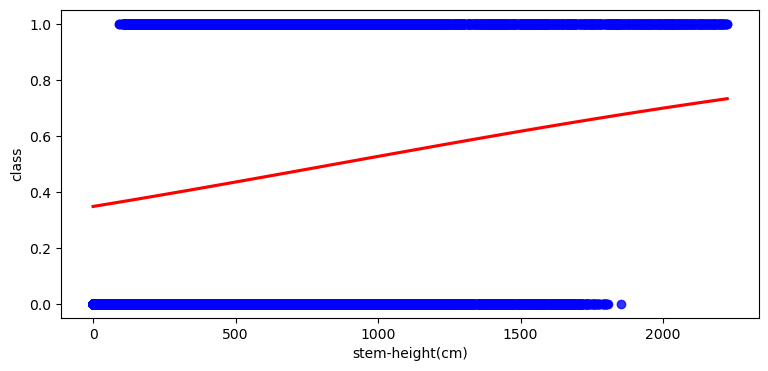

In [51]:
# Predict class of train set using train set of predictor varaibles using the Logistic Regression model
# Predict class corresponding to the predictors using the logistic model
edible_train_pred = logreg.predict(predictor_train)


# Plot the logistic regression curve of the train data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve

for column in predictor_train:
    f = plt.figure(figsize=(9, 4))
    sb.regplot(data = predictor_train, x = column, y = edible_train, logistic = True, ci = None,
          scatter_kws = {'color':'blue'}, line_kws={'color':'red'})




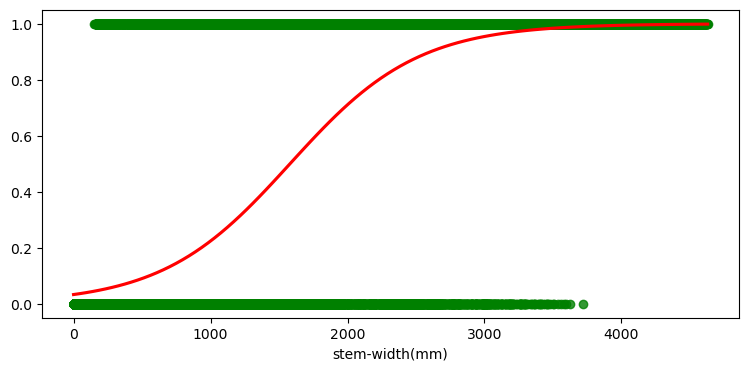

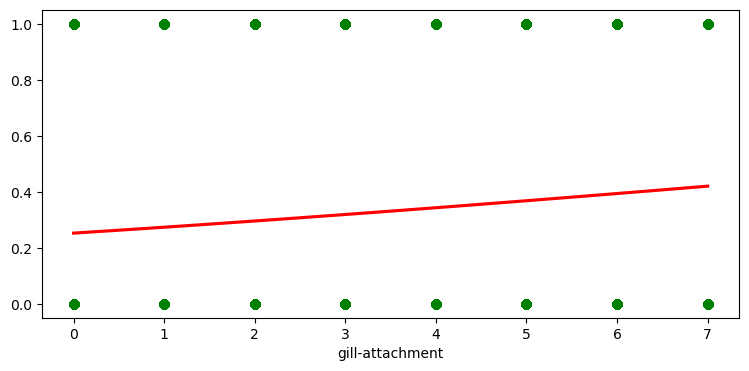

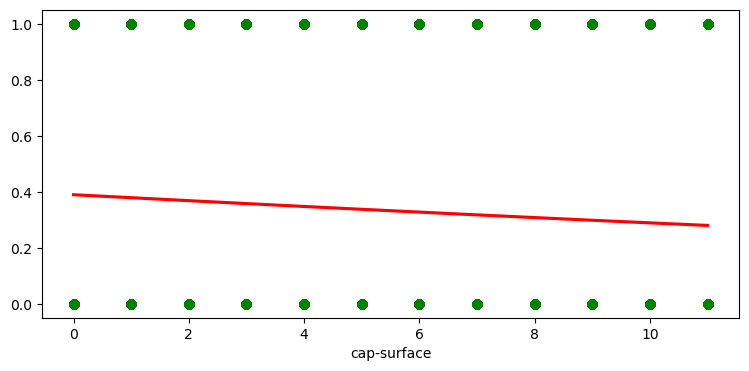

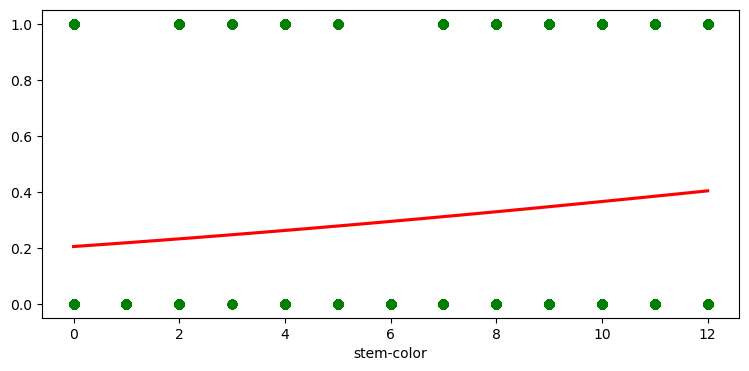

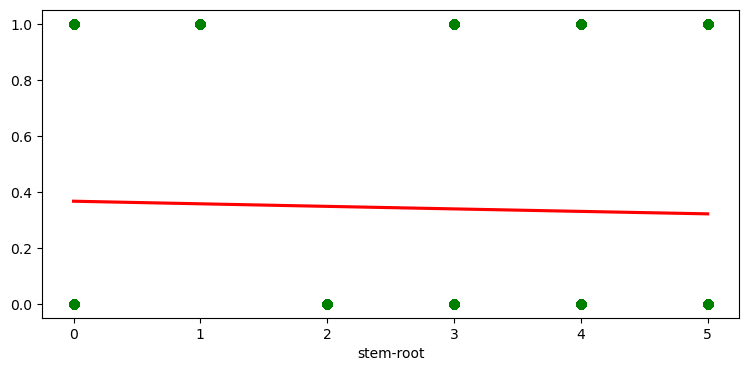

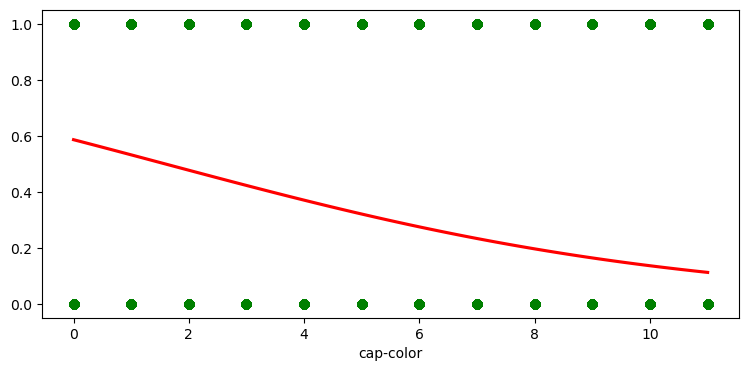

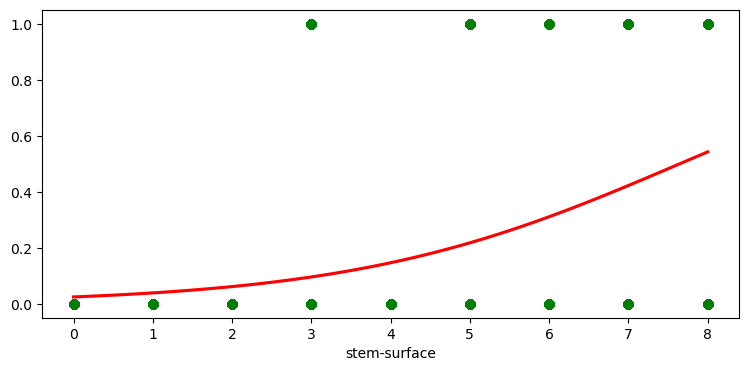

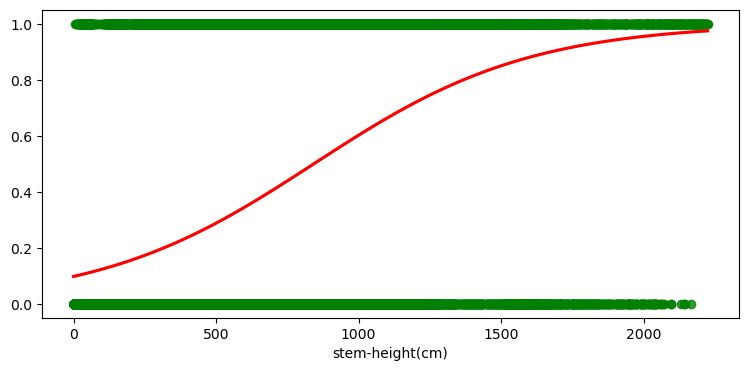

In [52]:
# Plot the logistic regression curve of the predicted edible train set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_train:
    f = plt.figure(figsize=(9, 4))
    sb.regplot(data = predictor_train, x = column, y = edible_train_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'})

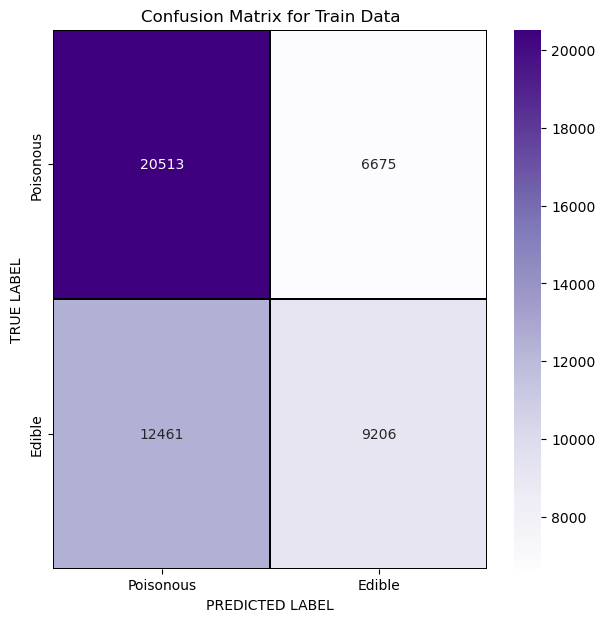

Accuracy : 0.6083103060075734
              precision    recall  f1-score   support

           0       0.62      0.75      0.68     27188
           1       0.58      0.42      0.49     21667

    accuracy                           0.61     48855
   macro avg       0.60      0.59      0.59     48855
weighted avg       0.60      0.61      0.60     48855



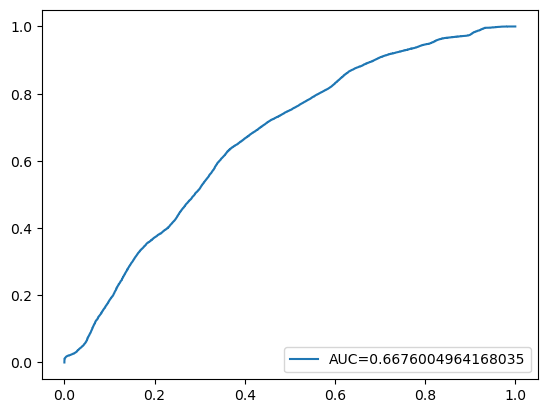

In [53]:
# Print the confusion matrix of the train data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

cm2train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm2train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

# Define metrics
edible_train_pred_proba = logreg.predict_proba(predictor_train)[::,1]
fpr, tpr, _ = roc_curve(edible_train, edible_train_pred_proba)
auc = roc_auc_score(edible_train, edible_train_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### The Test Set

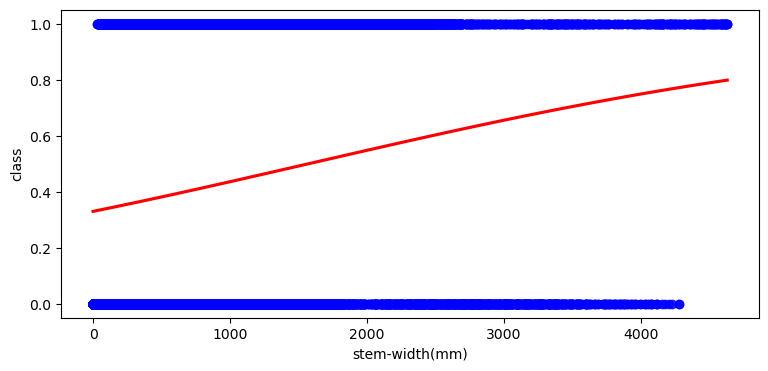

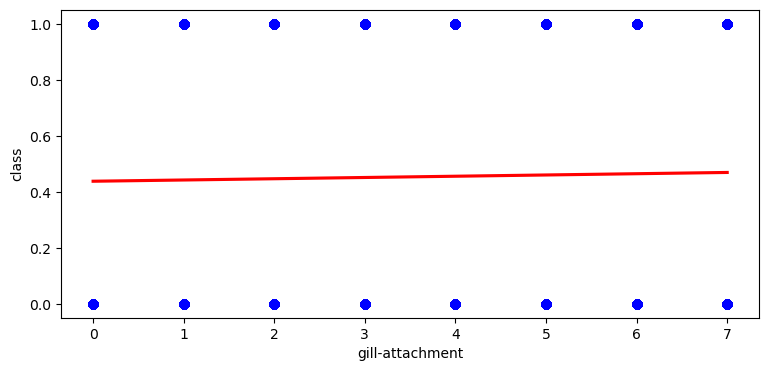

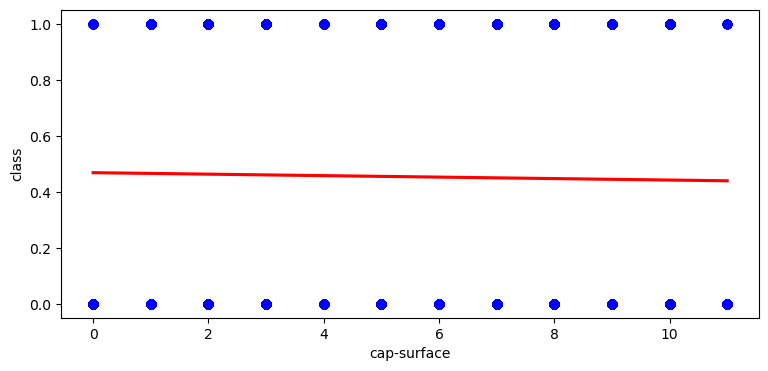

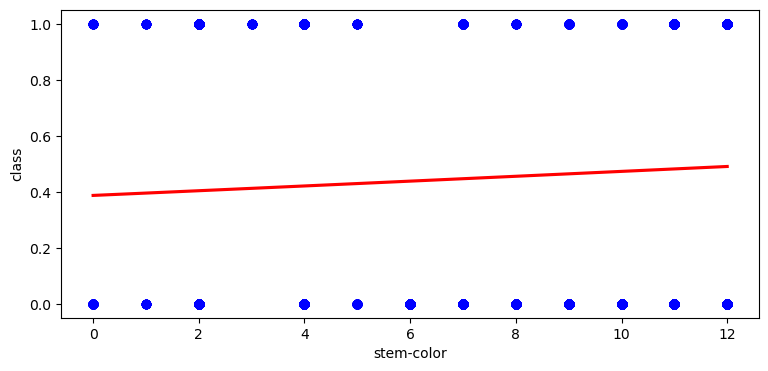

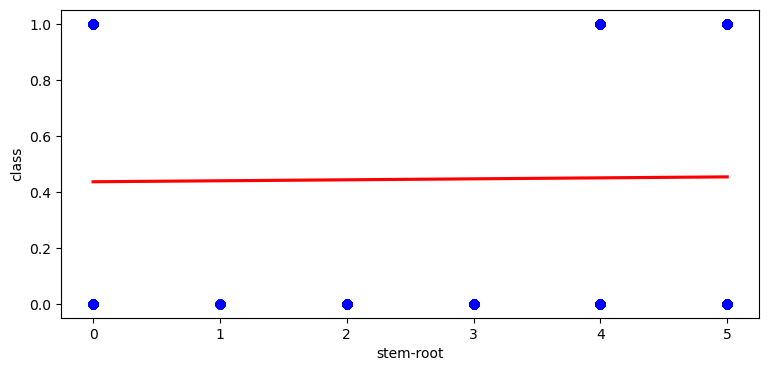

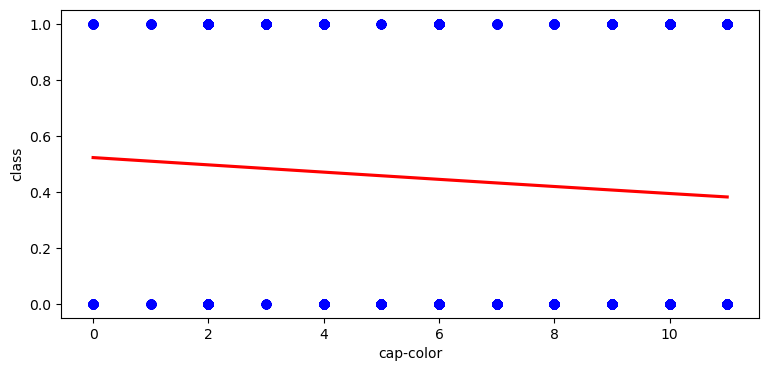

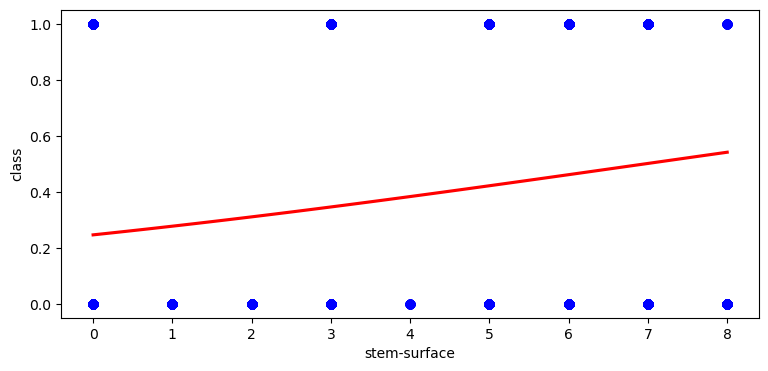

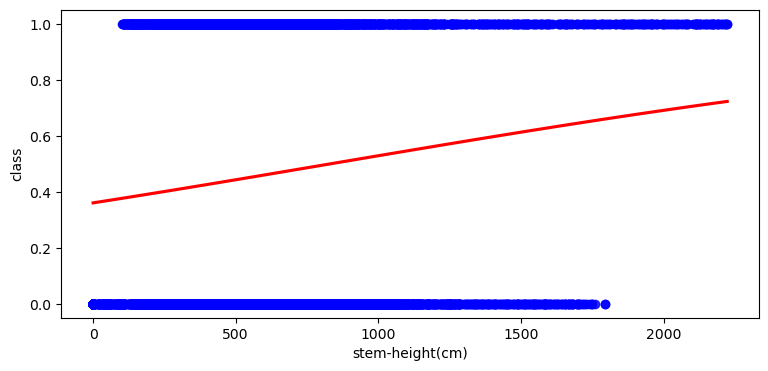

In [54]:
# Predict class of test set using test set of the predictor variables using the Linear Regression model
# Predict class corresponding to the predictors using the logistic model
edible_test_pred = logreg.predict(predictor_test)

# Plot the logistic regression curve of the test data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_test:
    f = plt.figure(figsize=(9,4))
    sb.regplot(data = predictor_test, x = column, y = edible_test, logistic = True, ci = None,
          scatter_kws = {'color':'blue'}, line_kws={'color':'red'})

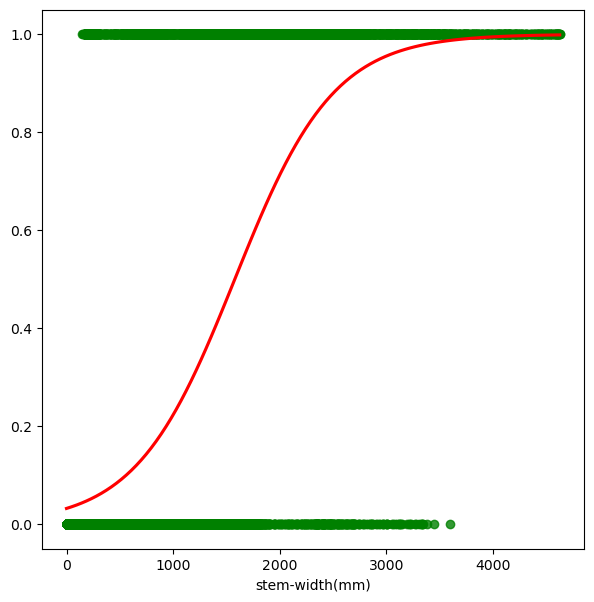

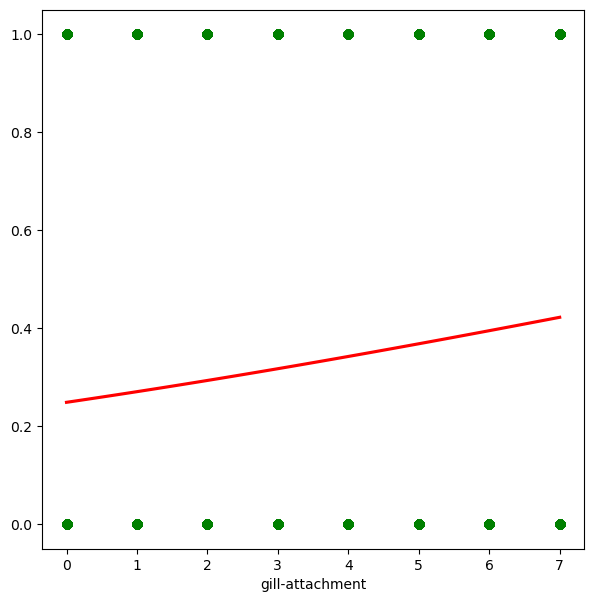

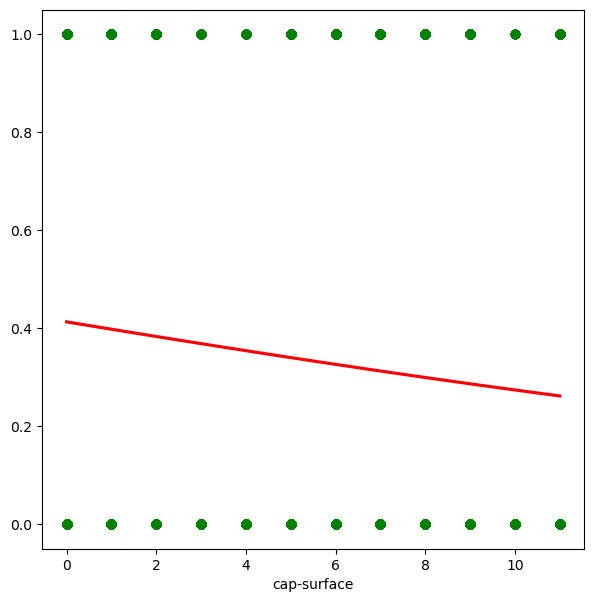

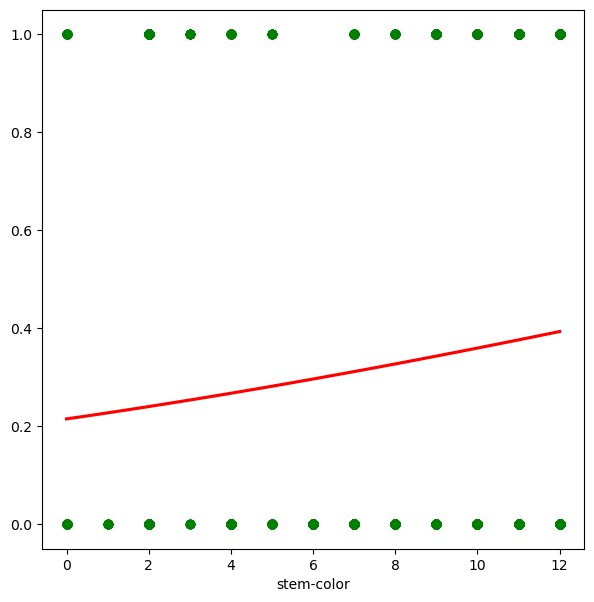

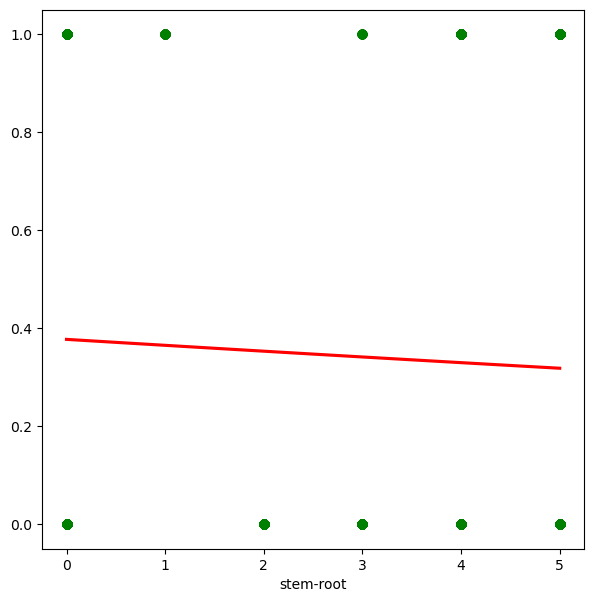

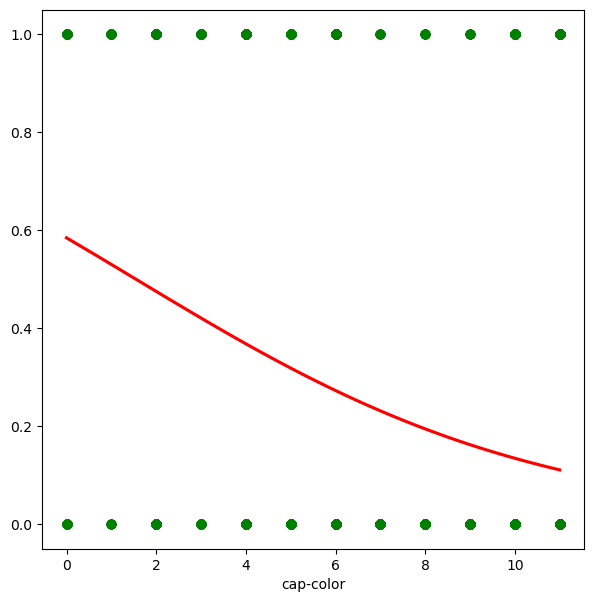

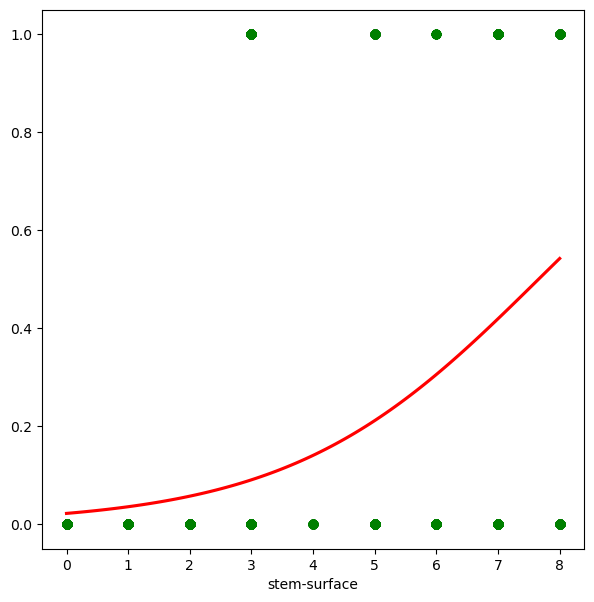

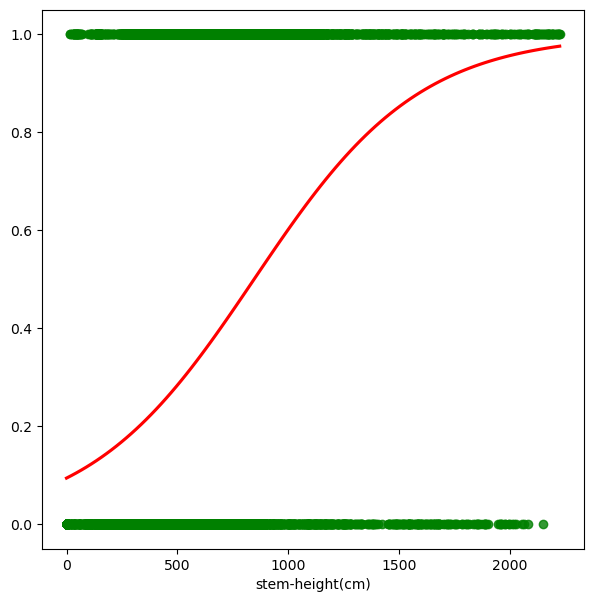

In [55]:
# Plot the logistic regression curve predicted edible test set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
for column in predictor_test:
    f = plt.figure(figsize=(7,7))
    sb.regplot(data = predictor_test, x = column, y = edible_test_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'})

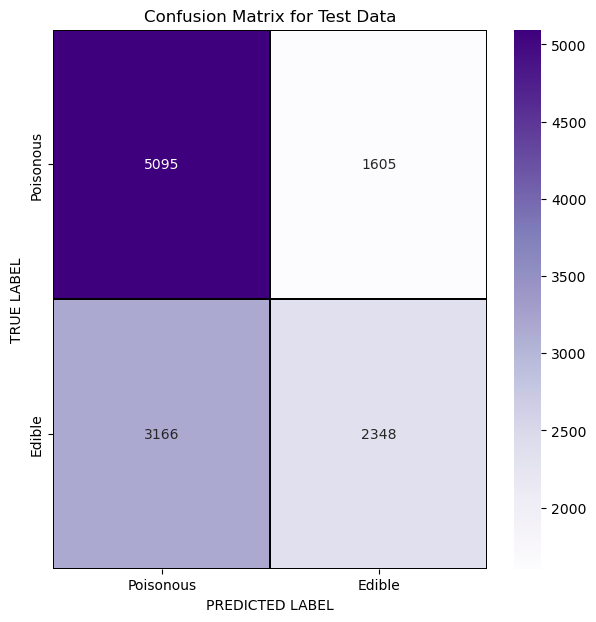

Accuracy : 0.6093826756181431
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      6700
           1       0.59      0.43      0.50      5514

    accuracy                           0.61     12214
   macro avg       0.61      0.59      0.59     12214
weighted avg       0.61      0.61      0.60     12214



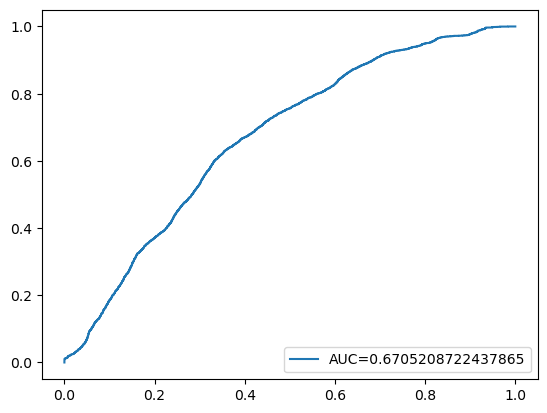

In [56]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

cm2test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(7,7))
sb.heatmap(cm2test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", accuracy_score(edible_test, edible_test_pred))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

# Define metrics
edible_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
fpr, tpr, _ = roc_curve(edible_test, edible_test_pred_proba)
auc = roc_auc_score(edible_test, edible_test_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Findings : 

Yabai Didnt Imrpove became worse actually ;-;